### RED NEURONAL ARTIFICIAL PARA CATEGORIZAR RECURSOS MINERALES

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
bd=pd.read_csv("comp15.csv")

In [131]:
bd.head()

X          Y       Z   Cu   Mo  Rock
0 374826.69 8716699.22 4902.14 0.03 0.01     2
1 374826.69 8716699.22 4887.14 0.02 0.00     3
2 374826.69 8716699.22 4872.14 0.01 0.01     3
3 374826.69 8716699.22 4857.14 0.03 0.00     3
4 374826.69 8716699.22 4842.14 0.01 0.00     3

In [132]:
pd.set_option('display.float_format', '{:.2f}'.format)
bd.describe()

X          Y       Z      Cu      Mo    Rock
count   5654.00    5654.00 5654.00 5654.00 5654.00 5654.00
mean  375606.25 8717015.68 4473.54    0.43    0.01    2.16
std      307.24     393.54  169.54    0.29    0.01    0.78
min   374821.06 8716003.08 4050.35    0.00    0.00    1.00
25%   375393.42 8716738.40 4340.07    0.23    0.00    2.00
50%   375602.29 8716995.80 4462.81    0.38    0.01    2.00
75%   375824.99 8717271.73 4607.49    0.58    0.02    3.00
max   376414.81 8718153.15 4902.14    2.95    0.09    5.00

In [5]:
# Obtener estadísticas descriptivas de la columna 'Rock'
rock_stats = bd['Rock'].describe()
# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas de la columna 'Rock':")
print(rock_stats)


Estadísticas descriptivas de la columna 'Rock':
count   5654.00
mean       2.16
std        0.78
min        1.00
25%        2.00
50%        2.00
75%        3.00
max        5.00
Name: Rock, dtype: float64


In [6]:
X=np.array(bd['X'])
Y=np.array(bd['Y'])
Z=np.array(bd['Z'])
CU=np.array(bd['Cu'])
MO=np.array(bd['Mo'])
ROCK=np.array(bd['Rock'])

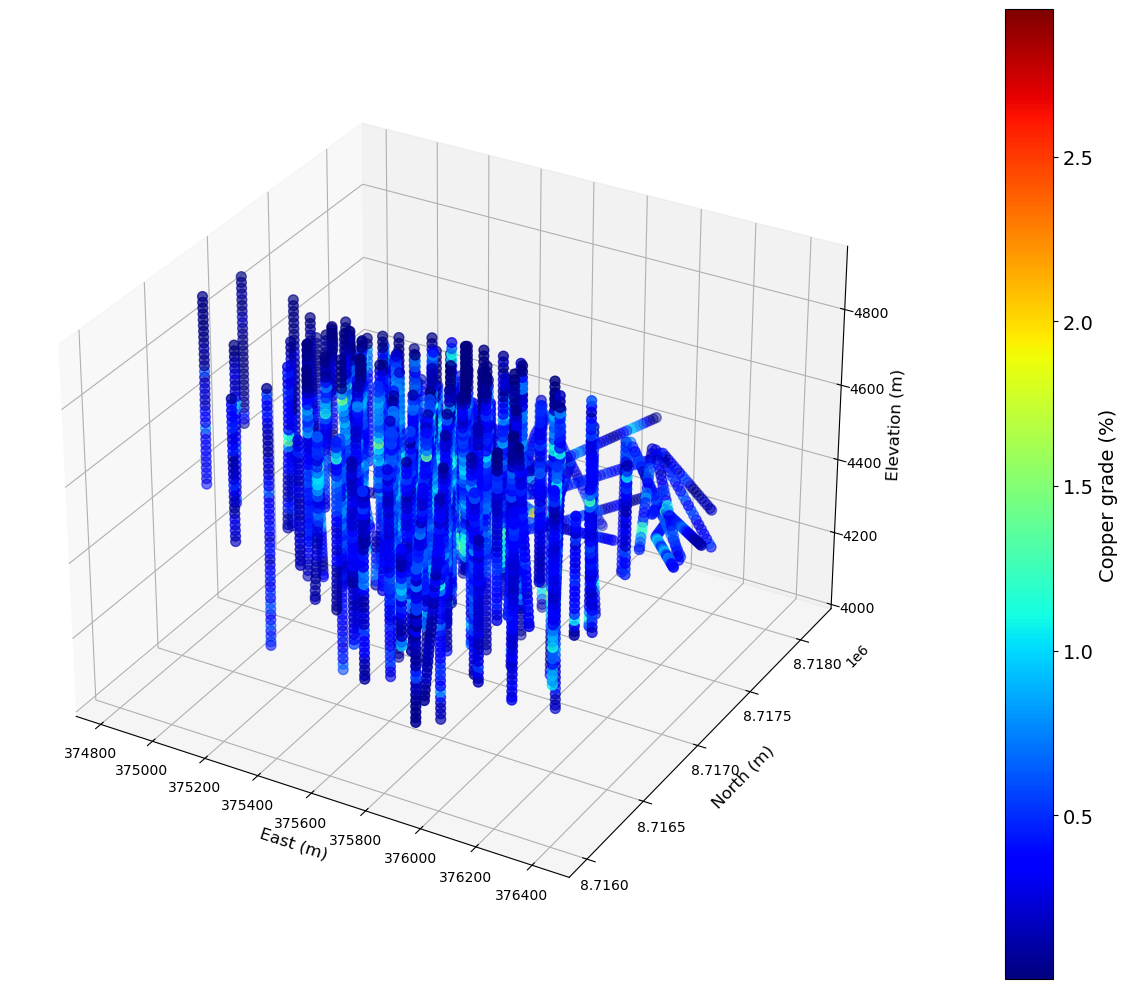

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

# Configuración de parámetros
marker_size = 50
cmap = cm.jet

# Crear gráfico 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot para ley de cobre
sc = ax.scatter(bd["X"], bd["Y"], bd["Z"], c=bd["Cu"], s=marker_size, cmap=cmap)

# Configuración de los ejes
ax.set_title("", fontsize=14)
ax.set_xlabel("East (m)", fontsize=12)
ax.set_ylabel("North (m)", fontsize=12)
ax.set_zlabel("Elevation (m)", fontsize=12)

# Agregar barra de colores
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Copper grade (%)", fontsize=14)  # Tamaño del nombre de la leyenda
cbar.ax.tick_params(labelsize=14)  # Tamaño de los valores de la leyenda

# Ajustes finales
plt.tight_layout()
plt.savefig('3dCobre.jpg', dpi=800)
plt.show()

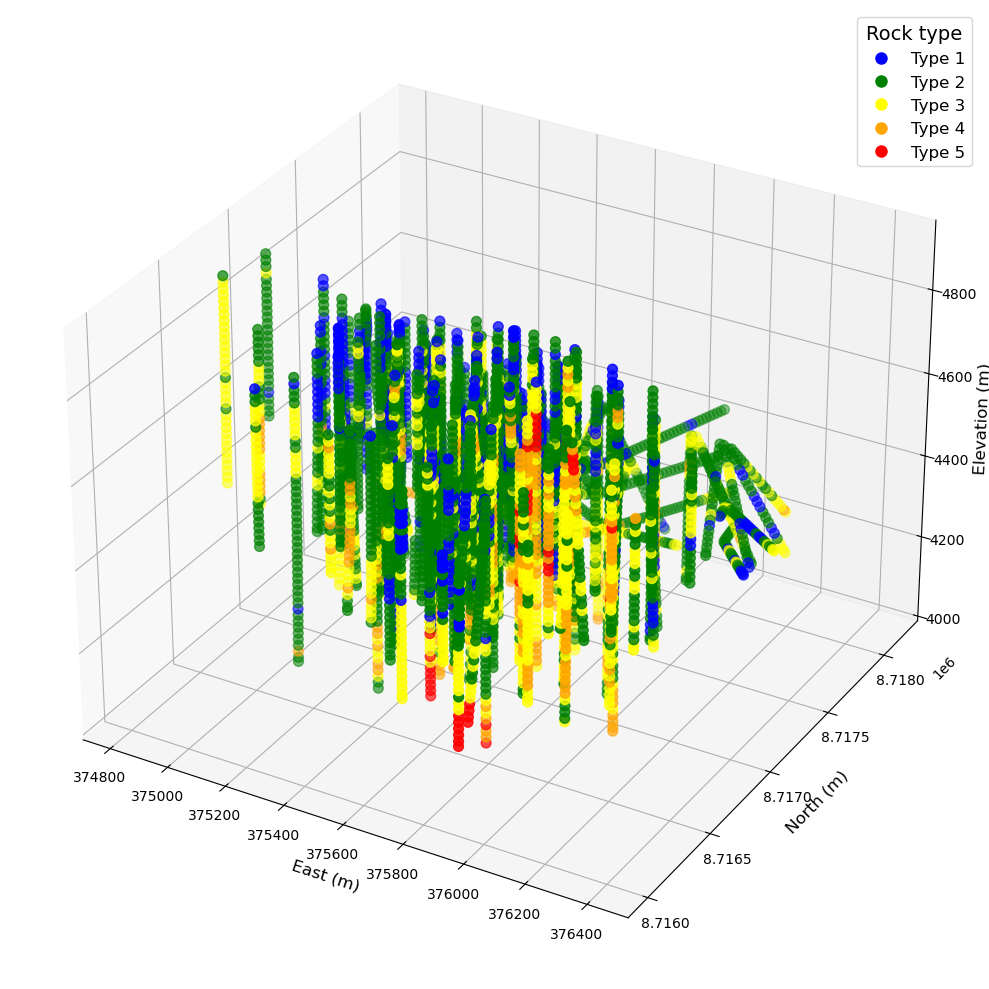

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Definir los tipos de roca y sus colores asociados
rock_types = [1, 2, 3, 4, 5]  # Asegúrate de que estos coincidan con los valores en bd["rock"]
colors = ["blue", "green", "yellow", "orange", "red"]  # Colores específicos para cada tipo de roca

# Crear un colormap categórico
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(boundaries=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ncolors=len(colors))

# Crear gráfico 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot utilizando los valores de la base de datos
sc = ax.scatter(bd["X"], bd["Y"], bd["Z"], c=bd["Rock"], cmap=cmap, norm=norm, s=50)

# Configuración de los ejes
ax.set_title("", fontsize=14)
ax.set_xlabel("East (m)", fontsize=12)
ax.set_ylabel("North (m)", fontsize=12)
ax.set_zlabel("Elevation (m)", fontsize=12)

# Crear una leyenda categórica en lugar de la barra de colores
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Type {rock}', 
                          markerfacecolor=col, markersize=10) 
                   for rock, col in zip(rock_types, colors)]
ax.legend(handles=legend_elements, title="Rock type", fontsize=12, title_fontsize=14)

# Ajustes finales
plt.tight_layout()
plt.savefig('3dRoca_categorico.jpg', dpi=800)
plt.show()

C:\Users\jhona\AppData\Local\Temp\ipykernel_10288\293214065.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])


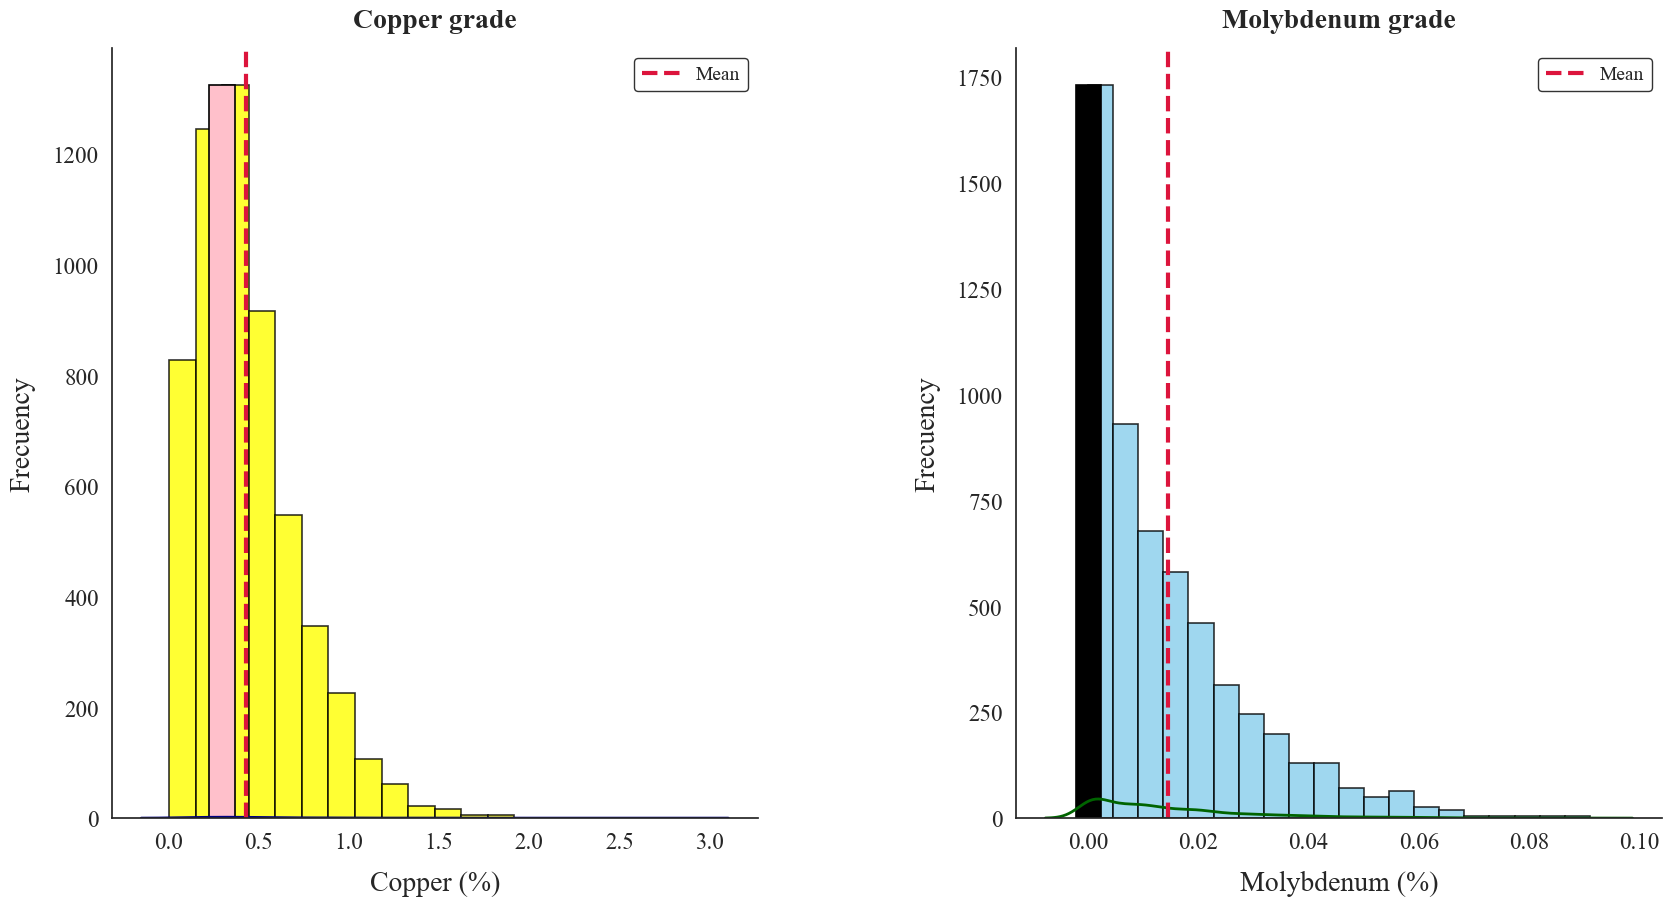

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración del tema y parámetros para figuras profesionales
sns.set_theme(style="white", font_scale=1.5)  # Tema minimalista y escala de fuente mejorada
plt.rcParams['font.family'] = 'Times New Roman'  # Fuente clásica para artículos científicos

# Crear figura con dos gráficos
fig, axs = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'wspace': 0.4, 'hspace': 0.3})

# Colores para los histogramas
color_cu = 'yellow'  # Color base para Cu
color_mo = 'skyblue'  # Color base para Mo
highlight_cu = 'pink'  # Color oscuro para resaltar
highlight_mo = 'black'  # Color oscuro para resaltar

# Datos de histogramas
cu_counts, cu_bins, _ = axs[0].hist(bd.Cu, bins=20, color=color_cu, alpha=0.8, edgecolor='black', linewidth=1.2)
mo_counts, mo_bins, _ = axs[1].hist(bd.Mo, bins=20, color=color_mo, alpha=0.8, edgecolor='black', linewidth=1.2)

# Resaltar bins con mayor frecuencia
axs[0].bar(cu_bins[:-1][cu_counts == cu_counts.max()], cu_counts.max(), width=np.diff(cu_bins)[0], color=highlight_cu, edgecolor='black', linewidth=1.2)
axs[1].bar(mo_bins[:-1][mo_counts == mo_counts.max()], mo_counts.max(), width=np.diff(mo_bins)[0], color=highlight_mo, edgecolor='black', linewidth=1.2)

# Añadir KDE y línea de la media
sns.kdeplot(bd.Cu, color="navy", lw=2, ax=axs[0])
axs[0].axvline(np.mean(bd.Cu), color='crimson', linestyle='--', lw=3, label='Mean')
axs[0].set_title('Copper grade', fontsize=20, fontweight='bold', pad=15)
axs[0].set_xlabel('Copper (%)', fontsize=20, labelpad=12)
axs[0].set_ylabel('Frecuency', fontsize=20, labelpad=12)
axs[0].legend(fontsize=14, loc='upper right', frameon=True, edgecolor='black')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

sns.kdeplot(bd.Mo, color="darkgreen", lw=2, ax=axs[1])
axs[1].axvline(np.mean(bd.Mo), color='crimson', linestyle='--', lw=3, label='Mean')
axs[1].set_title('Molybdenum grade', fontsize=20, fontweight='bold', pad=15)
axs[1].set_xlabel('Molybdenum (%)', fontsize=20, labelpad=12)
axs[1].set_ylabel('Frecuency', fontsize=20, labelpad=12)
axs[1].legend(fontsize=14, loc='upper right', frameon=True, edgecolor='black')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Ajustar diseño y guardar
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('histogramas_resaltados.jpg', dpi=800, bbox_inches='tight')

plt.show()

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import kmodes.util 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import seaborn as sns
import plotly.express as px

plt.style.use("_classic_test_patch")

df = pd.read_csv("Bdfinal.csv", sep=",")
df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples
0 NaN            NaN                         NaN          NaN           NaN
1 NaN            NaN                         NaN          NaN           NaN
2 NaN            NaN                         NaN          NaN           NaN
3 NaN            NaN                         NaN          NaN           NaN
4 NaN            NaN                         NaN          NaN           NaN

In [134]:
grid_x = np.linspace(374790,376430, num=82, endpoint=False) #Coord. de origen x, coord. de termino x, nª de celdas x.
grid_y = np.linspace(8715980,8718180, num=110, endpoint=False) #Coord. de origen y, coord. de termino y, nª de celdas y.
grid_z = np.linspace(4015,4935, num=46, endpoint=False) #Coord. de origen x, coord. de termino y, nª de celdas z.

zg, yg, xg = np.meshgrid(grid_z, grid_y, grid_x, indexing='ij')

z_g = zg.ravel()
x_g = xg.ravel()
y_g = yg.ravel()

d = {'X': x_g, 'Y': y_g, "Z": z_g}
df1 = pd.DataFrame(data=d) #Creación del dataframe 
       
df["X"] = df1["X"]
df["Y"] = df1["Y"]
df["Z"] = df1["Z"]

df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
0 NaN            NaN                         NaN          NaN           NaN   
1 NaN            NaN                         NaN          NaN           NaN   
2 NaN            NaN                         NaN          NaN           NaN   
3 NaN            NaN                         NaN          NaN           NaN   
4 NaN            NaN                         NaN          NaN           NaN   

          X          Y       Z  
0 374790.00 8715980.00 4015.00  
1 374810.00 8715980.00 4015.00  
2 374830.00 8715980.00 4015.00  
3 374850.00 8715980.00 4015.00  
4 374870.00 8715980.00 4015.00

In [135]:
df.loc[df["OK"] < 0, "OK"] = -99
df.replace(-99, np.nan, inplace=True)
df= df.dropna()
df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
37 0.31          -0.03                      365.71         0.11         11.00   
38 0.30          -0.03                      363.69         0.11         13.00   
39 0.27          -0.03                      364.97         0.11         15.00   
40 0.27          -0.03                      360.78         0.11         15.00   
41 0.19          -0.04                      343.19         0.12         12.00   

           X          Y       Z  
37 375530.00 8715980.00 4015.00  
38 375550.00 8715980.00 4015.00  
39 375570.00 8715980.00 4015.00  
40 375590.00 8715980.00 4015.00  
41 375610.00 8715980.00 4015.00

In [136]:
df.describe().T

count       mean    std        min        25%  \
OK                         318443.00       0.35   0.15       0.00       0.26   
OK_Lagrangian              318443.00      -0.01   0.01      -0.06      -0.01   
OK_average_sample_distance 318443.00     231.91  59.19     114.27     189.35   
OK_krig_var                318443.00       0.07   0.03       0.00       0.05   
OK_n_samples               318443.00     124.36  70.99      10.00      54.00   
X                          318443.00  375635.82 416.57  374790.00  375310.00   
Y                          318443.00 8717030.96 559.01 8715980.00 8716560.00   
Z                          318443.00    4453.24 249.27    4015.00    4255.00   

                                  50%        75%        max  
OK                               0.33       0.42       2.21  
OK_Lagrangian                   -0.00      -0.00       0.00  
OK_average_sample_distance     224.66     269.69     433.19  
OK_krig_var                      0.08       0.09       0.15  
OK_n_samples                   131.00     200.00     200.00  
X                           375650.00  375970.00  376410.00  
Y                          8717020.00 8717480.00 8718160.00  
Z                             4455.00    4655.00    4915.00

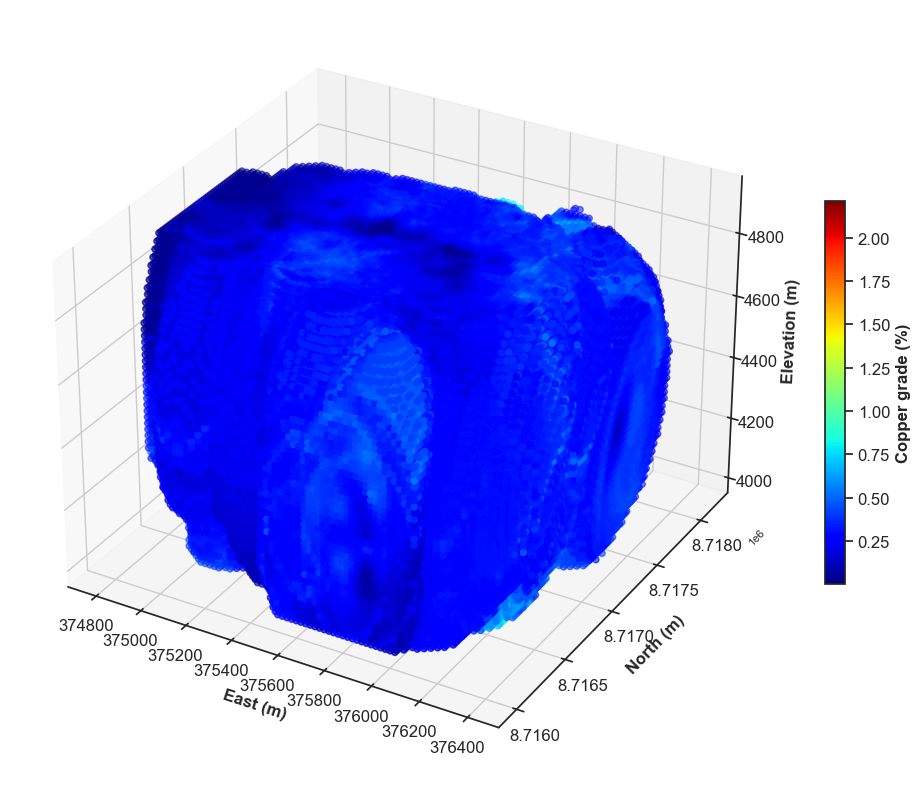

In [137]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Configuración de estilo y tamaño de fuente
rcParams['font.family'] = 'sans-serif'  # Cambiar a sans-serif
rcParams['font.size'] = 11             # Tamaño de fuente más pequeño

# Extraer las columnas X, Y, Z y OK para graficar
X = df['X']
Y = df['Y']
Z = df['Z']
OK = df['OK']

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear una dispersión 3D
sc = ax.scatter(X, Y, Z, c=OK, cmap='jet', marker='o')

# Añadir la barra de color
cbar = fig.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Copper grade (%)', fontsize=12)  # Etiqueta de la barra de color con tamaño ajustado
cbar.ax.tick_params(labelsize=12)       # Tamaño más pequeño para los números de la barra de color

# Etiquetas de los ejes
ax.set_xlabel('East (m)', fontsize=12)  # Etiqueta con fuente sans-serif y tamaño ajustado
ax.set_ylabel('North (m)', fontsize=12)
ax.set_zlabel('Elevation (m)', fontsize=12)
# Tamaño más pequeño para los números de los ejes
ax.tick_params(axis='x', labelsize=12)  # Reducir tamaño de las marcas en el eje X
ax.tick_params(axis='y', labelsize=12)  # Reducir tamaño de las marcas en el eje Y
ax.tick_params(axis='z', labelsize=12)  # Reducir tamaño de las marcas en el eje Z


# Mostrar gráfico con un diseño ajustado
plt.tight_layout()
plt.savefig('3d modelo ok.jpg', dpi=800)
# Mostrar la gráfica
plt.show()

In [30]:
valores_unicos_Z = df["Z"].unique()
print(valores_unicos_Z)

[4015. 4035. 4055. 4075. 4095. 4115. 4135. 4155. 4175. 4195. 4215. 4235.
 4255. 4275. 4295. 4315. 4335. 4355. 4375. 4395. 4415. 4435. 4455. 4475.
 4495. 4515. 4535. 4555. 4575. 4595. 4615. 4635. 4655. 4675. 4695. 4715.
 4735. 4755. 4775. 4795. 4815. 4835. 4855. 4875. 4895. 4915.]


In [31]:
valores_unicos_Y = df["Y"].unique()
print(valores_unicos_Y)

[8715980. 8716000. 8716020. 8716040. 8716060. 8716080. 8716100. 8716120.
 8716140. 8716160. 8716180. 8716200. 8716220. 8716240. 8716260. 8716280.
 8716300. 8716320. 8716340. 8716360. 8716380. 8716400. 8716420. 8716440.
 8716460. 8716480. 8716500. 8716520. 8716540. 8716560. 8716580. 8716600.
 8716620. 8716640. 8716660. 8716680. 8716700. 8716720. 8716740. 8716760.
 8716780. 8716800. 8716820. 8716840. 8716860. 8716880. 8716900. 8716920.
 8716940. 8716960. 8716980. 8717000. 8717020. 8717040. 8717060. 8717080.
 8717100. 8717120. 8717140. 8717160. 8717180. 8717200. 8717220. 8717240.
 8717260. 8717280. 8717300. 8717320. 8717340. 8717360. 8717380. 8717400.
 8717420. 8717440. 8717460. 8717480. 8717500. 8717520. 8717540. 8717560.
 8717580. 8717600. 8717620. 8717640. 8717660. 8717680. 8717700. 8717720.
 8717740. 8717760. 8717780. 8717800. 8717820. 8717840. 8717860. 8717880.
 8717900. 8717920. 8717940. 8717960. 8717980. 8718000. 8718020. 8718040.
 8718060. 8718080. 8718100. 8718120. 8718140. 87181

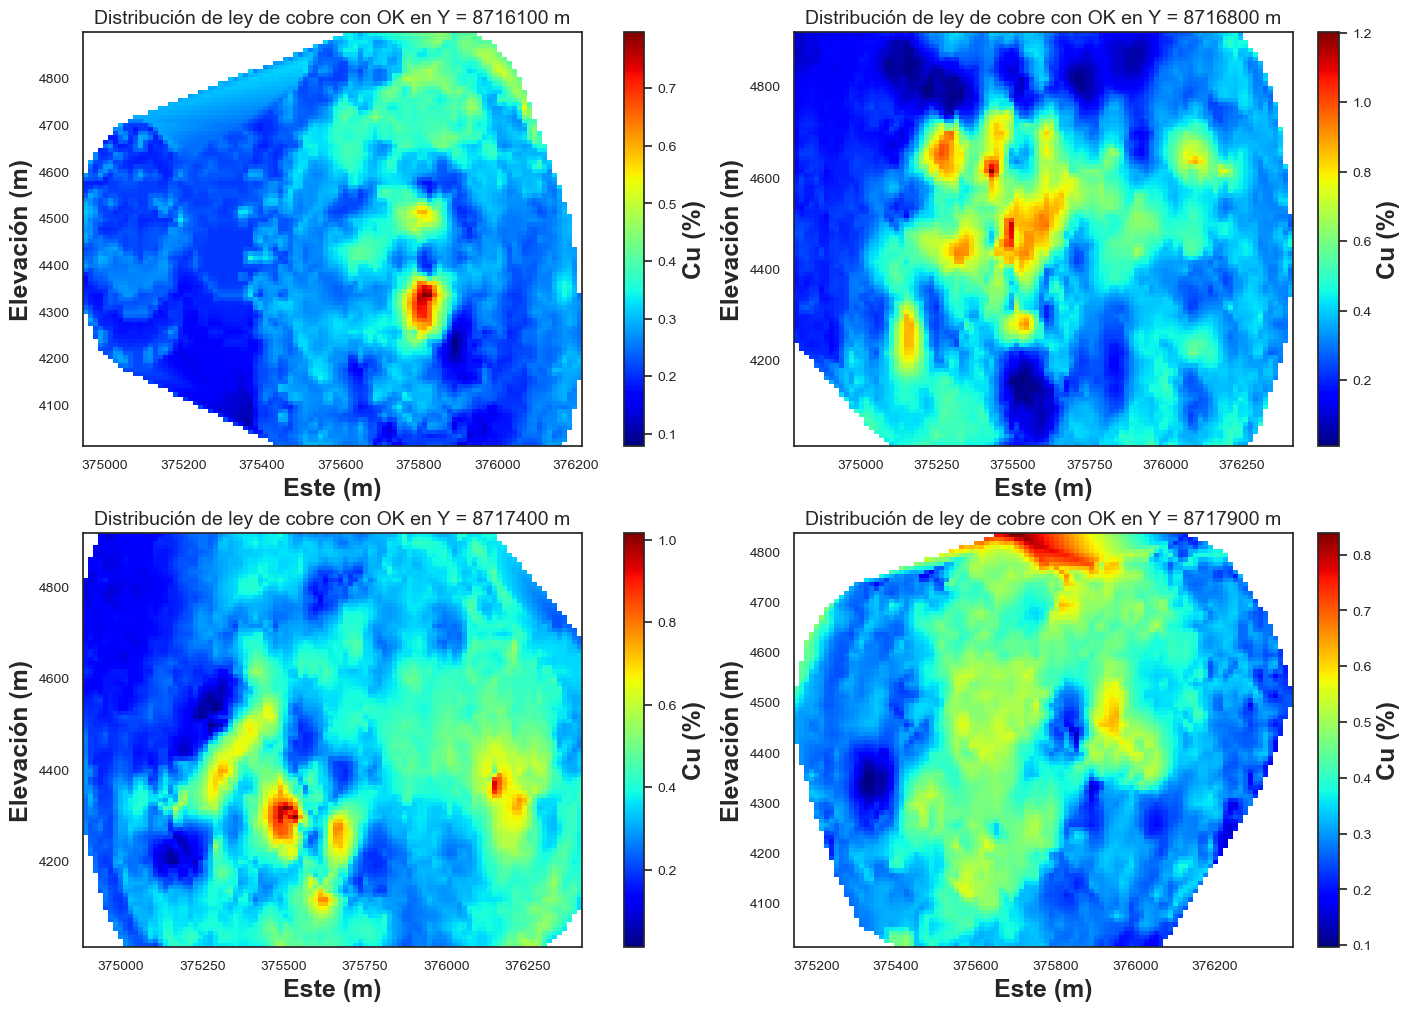

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.ticker as ticker

# Extraer las columnas X, Y, Z y OK para graficar
X = df['X'].values
Y = df['Y'].values
Z = df['Z'].values
OK = df['OK'].values

# Definir los cortes en Y
y_levels = [8716100, 8716800, 8717400, 8717900]  # Ejemplo de cuatro niveles de corte

# Crear la figura para los cuatro subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Iterar sobre los niveles de corte y graficar
for i, y_level in enumerate(y_levels):
    # Filtrar los datos para el nivel de corte
    mask = (Y >= y_level) & (Y < y_level + 50)  # Filtra por un rango alrededor de cada nivel
    X_slice = X[mask]
    Z_slice = Z[mask]
    OK_slice = OK[mask]
    
    # Crear malla para graficar
    xi = np.linspace(X_slice.min(), X_slice.max(), 100)
    zi = np.linspace(Z_slice.min(), Z_slice.max(), 100)
    xi, zi = np.meshgrid(xi, zi)
    yi = griddata((X_slice, Z_slice), OK_slice, (xi, zi), method='linear')
    
    # Seleccionar la posición del subplot
    ax = axs[i // 2, i % 2]
    c = ax.pcolormesh(xi, zi, yi, cmap='jet', shading='auto')
    
    # Añadir barra de color
    fig.colorbar(c, ax=ax, label='Cu (%)')
    
    # Limitar el número de ticks en el eje X a 7
    ax.xaxis.set_major_locator(ticker.MaxNLocator(7))
    
    # Etiquetas y título
    ax.set_title(f'Distribución de ley de cobre con OK en Y = {y_level} m')
    ax.set_xlabel('Este (m)')
    ax.set_ylabel('Elevación (m)')

# Guardar el gráfico
#plt.savefig('Image/OK_2D_slices_Y.jpg', dpi=600)

# Mostrar la gráfica
plt.show()

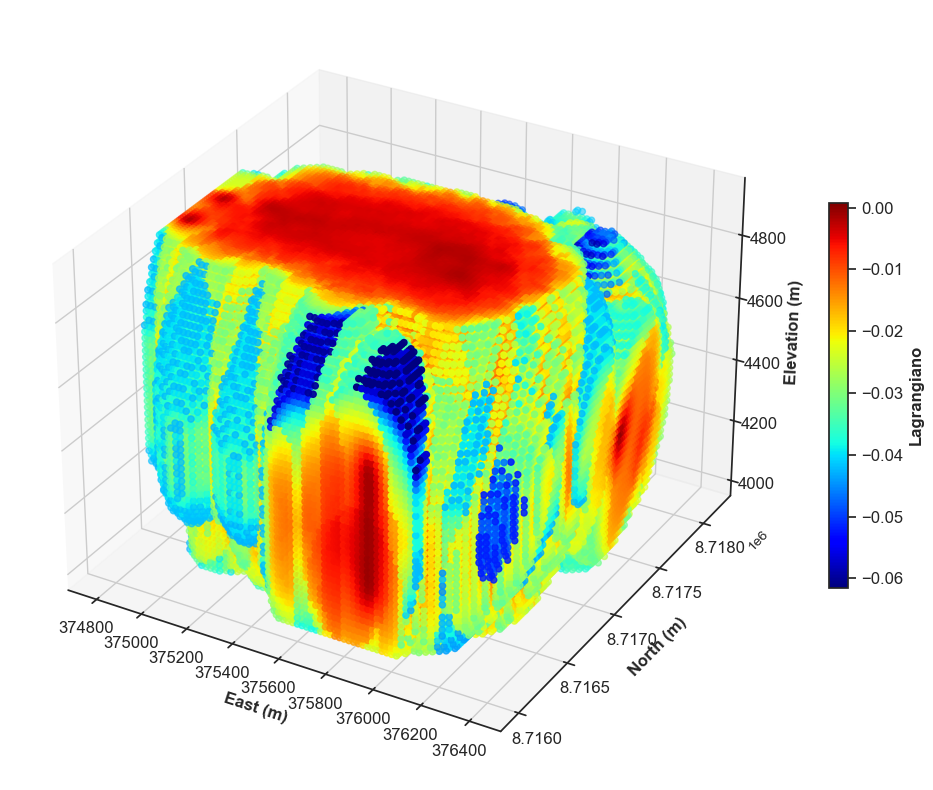

In [35]:
# Configuración de estilo y tamaño de fuente
rcParams['font.family'] = 'sans-serif'  # Cambiar a sans-serif
rcParams['font.size'] = 10             # Tamaño de fuente más pequeño
# Extraer las columnas X, Y, Z y OK para graficar
X = df['X']
Y = df['Y']
Z = df['Z']
LG = df['OK_Lagrangian']

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear una dispersión 3D
sc = ax.scatter(X, Y, Z, c=LG, cmap='jet', marker='o')

# Añadir la barra de color
cbar = fig.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Lagrangiano', fontsize=12)
cbar.ax.tick_params(labelsize=12)       # Tamaño más pequeño para los números de la barra de color
# Etiquetas
ax.set_xlabel('East (m)', fontsize=12)  # Etiqueta con fuente sans-serif y tamaño ajustado
ax.set_ylabel('North (m)', fontsize=12)
ax.set_zlabel('Elevation (m)', fontsize=12)
# Tamaño más pequeño para los números de los ejes
ax.tick_params(axis='x', labelsize=12)  # Reducir tamaño de las marcas en el eje X
ax.tick_params(axis='y', labelsize=12)  # Reducir tamaño de las marcas en el eje Y
ax.tick_params(axis='z', labelsize=12)  # Reducir tamaño de las marcas en el eje Z

# Mostrar gráfico con un diseño ajustado
plt.tight_layout()
plt.savefig('3d modelo lagrangiano.jpg', dpi=800)
# Mostrar la gráfica
plt.show()

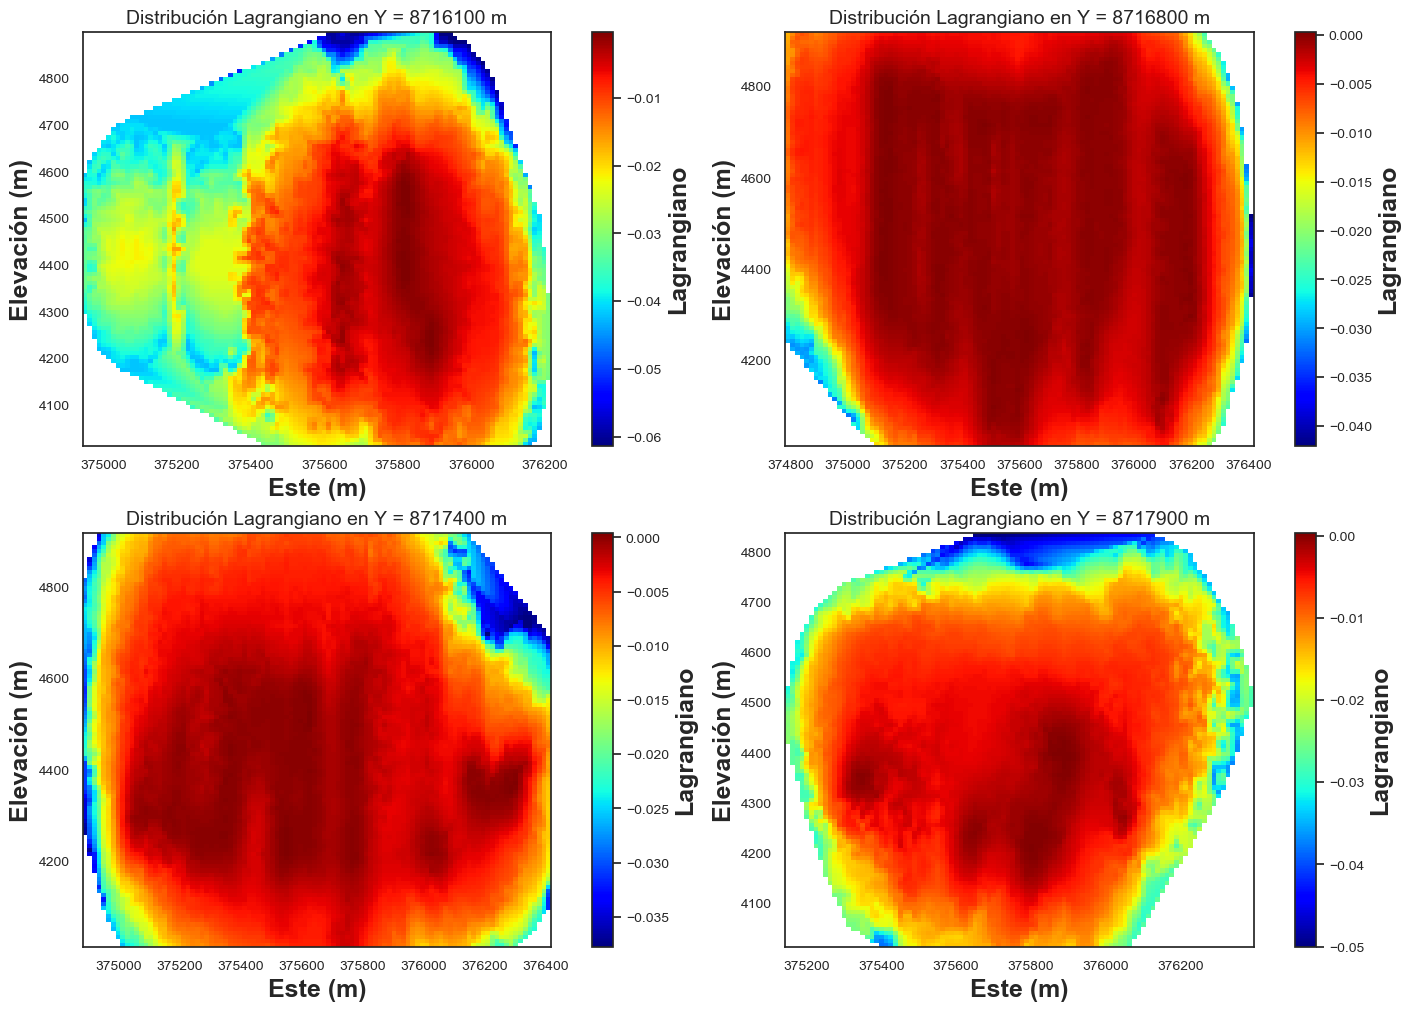

In [36]:
# Extraer las columnas X, Y, Z y OK para graficar
X = df['X'].values
Y = df['Y'].values
Z = df['Z'].values
LG = df['OK_Lagrangian'].values

# Definir los cortes en Y
y_levels = [8716100, 8716800, 8717400, 8717900]  # Ejemplo de cuatro niveles de corte

# Crear la figura para los cuatro subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Iterar sobre los niveles de corte y graficar
for i, y_level in enumerate(y_levels):
    # Filtrar los datos para el nivel de corte
    mask = (Y >= y_level) & (Y < y_level + 50)  # Filtra por un rango alrededor de cada nivel
    X_slice = X[mask]
    Z_slice = Z[mask]
    LG_slice = LG[mask]
    
    # Crear malla para graficar
    xi = np.linspace(X_slice.min(), X_slice.max(), 100)
    zi = np.linspace(Z_slice.min(), Z_slice.max(), 100)
    xi, zi = np.meshgrid(xi, zi)
    yi = griddata((X_slice, Z_slice), LG_slice, (xi, zi), method='linear')
    
    # Seleccionar la posición del subplot
    ax = axs[i // 2, i % 2]
    c = ax.pcolormesh(xi, zi, yi, cmap='jet', shading='auto')
    
    # Añadir barra de color
    fig.colorbar(c, ax=ax, label='Lagrangiano')
    
    # Etiquetas y título
    ax.set_title(f'Distribución Lagrangiano en Y = {y_level} m')
    ax.set_xlabel('Este (m)')
    ax.set_ylabel('Elevación (m)')

# Guardar el gráfico
#plt.savefig('Image/OK_2D_slices_Lagrangian.jpg', dpi=600)

# Mostrar la gráfica
plt.show()

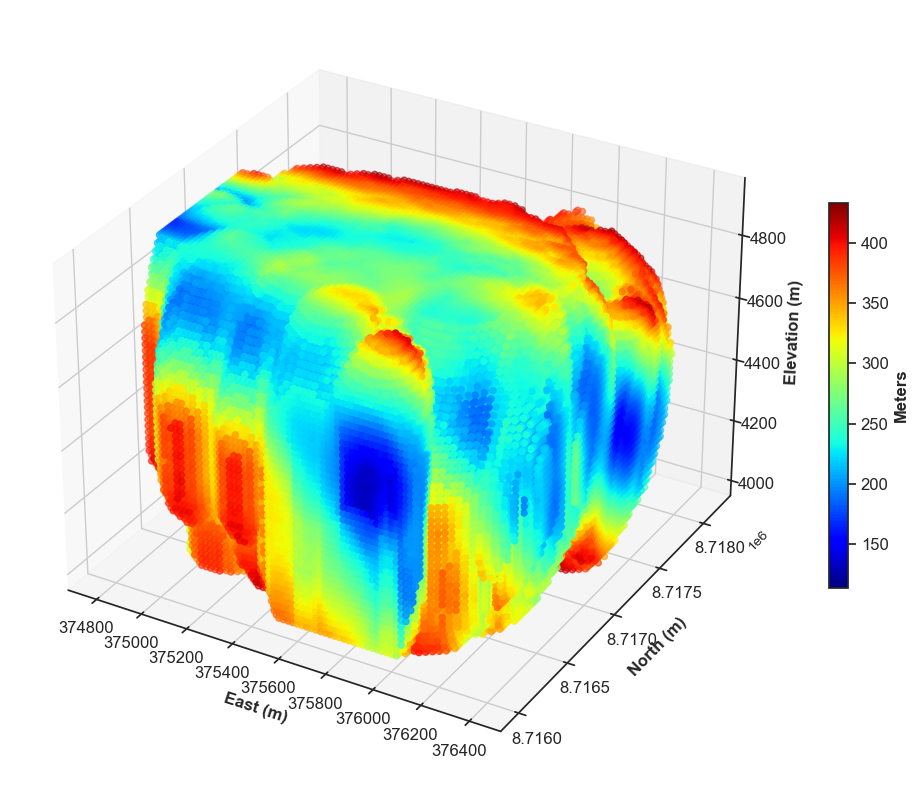

In [37]:
# Configuración de estilo y tamaño de fuente
rcParams['font.family'] = 'sans-serif'  # Cambiar a sans-serif
rcParams['font.size'] = 10             # Tamaño de fuente más pequeño
# Extraer las columnas X, Y, Z y OK para graficar
X = df['X']
Y = df['Y']
Z = df['Z']
AS = df['OK_average_sample_distance']

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear una dispersión 3D
sc = ax.scatter(X, Y, Z, c=AS, cmap='jet', marker='o')

# Añadir la barra de color
cbar = fig.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Meters', fontsize=12)
cbar.ax.tick_params(labelsize=12)       # Tamaño más pequeño para los números de la barra de color
# Etiquetas
ax.set_xlabel('East (m)', fontsize=12)  # Etiqueta con fuente sans-serif y tamaño ajustado
ax.set_ylabel('North (m)', fontsize=12)
ax.set_zlabel('Elevation (m)', fontsize=12)
# Tamaño más pequeño para los números de los ejes
ax.tick_params(axis='x', labelsize=12)  # Reducir tamaño de las marcas en el eje X
ax.tick_params(axis='y', labelsize=12)  # Reducir tamaño de las marcas en el eje Y
ax.tick_params(axis='z', labelsize=12)  # Reducir tamaño de las marcas en el eje Z

# Mostrar gráfico con un diseño ajustado
plt.tight_layout()
plt.savefig('3d modelo distances.jpg', dpi=800)
# Mostrar la gráfica
plt.show()

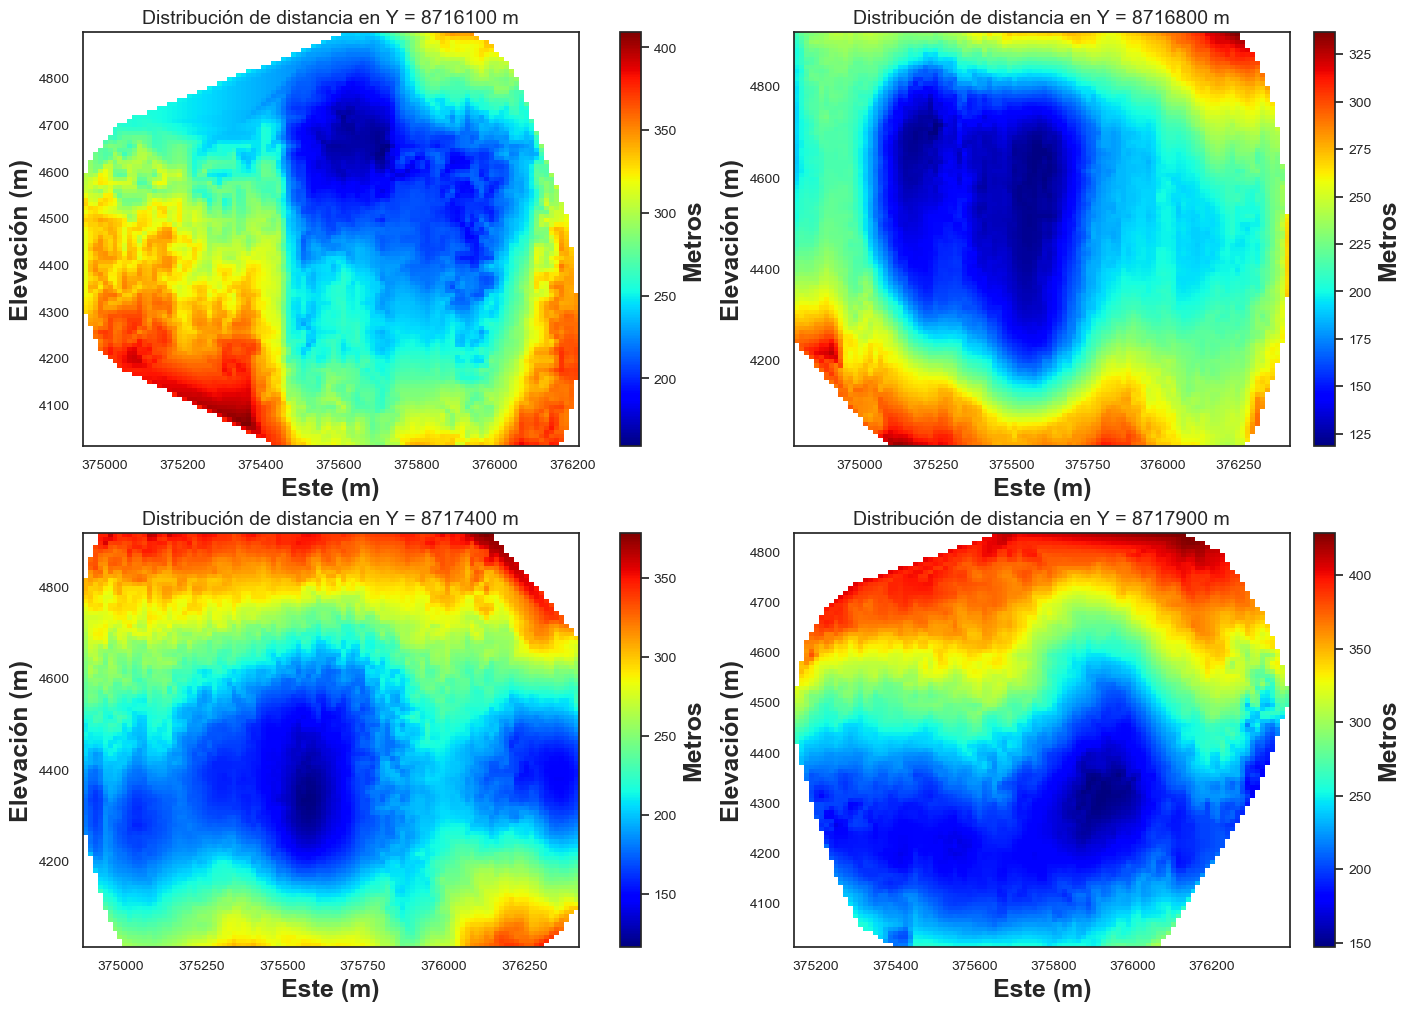

In [38]:
# Extraer las columnas X, Y, Z y OK para graficar
X = df['X'].values
Y = df['Y'].values
Z = df['Z'].values
AS = df['OK_average_sample_distance'].values

# Definir los cortes en Y
y_levels = [8716100, 8716800, 8717400, 8717900]  # Ejemplo de cuatro niveles de corte

# Crear la figura para los cuatro subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Iterar sobre los niveles de corte y graficar
for i, y_level in enumerate(y_levels):
    # Filtrar los datos para el nivel de corte
    mask = (Y >= y_level) & (Y < y_level + 50)  # Filtra por un rango alrededor de cada nivel
    X_slice = X[mask]
    Z_slice = Z[mask]
    AS_slice = AS[mask]
    
    # Crear malla para graficar
    xi = np.linspace(X_slice.min(), X_slice.max(), 100)
    zi = np.linspace(Z_slice.min(), Z_slice.max(), 100)
    xi, zi = np.meshgrid(xi, zi)
    yi = griddata((X_slice, Z_slice), AS_slice, (xi, zi), method='linear')
    
    # Seleccionar la posición del subplot
    ax = axs[i // 2, i % 2]
    c = ax.pcolormesh(xi, zi, yi, cmap='jet', shading='auto')
    
    # Añadir barra de color
    fig.colorbar(c, ax=ax, label='Metros')

     # Limitar el número de ticks en el eje X a 7
    ax.xaxis.set_major_locator(ticker.MaxNLocator(7))
    
    # Etiquetas y título
    ax.set_title(f'Distribución de distancia en Y = {y_level} m')
    ax.set_xlabel('Este (m)')
    ax.set_ylabel('Elevación (m)')

# Guardar el gráfico
#plt.savefig('Image/OK_2D_slices_distances.jpg', dpi=600)

# Mostrar la gráfica
plt.show()

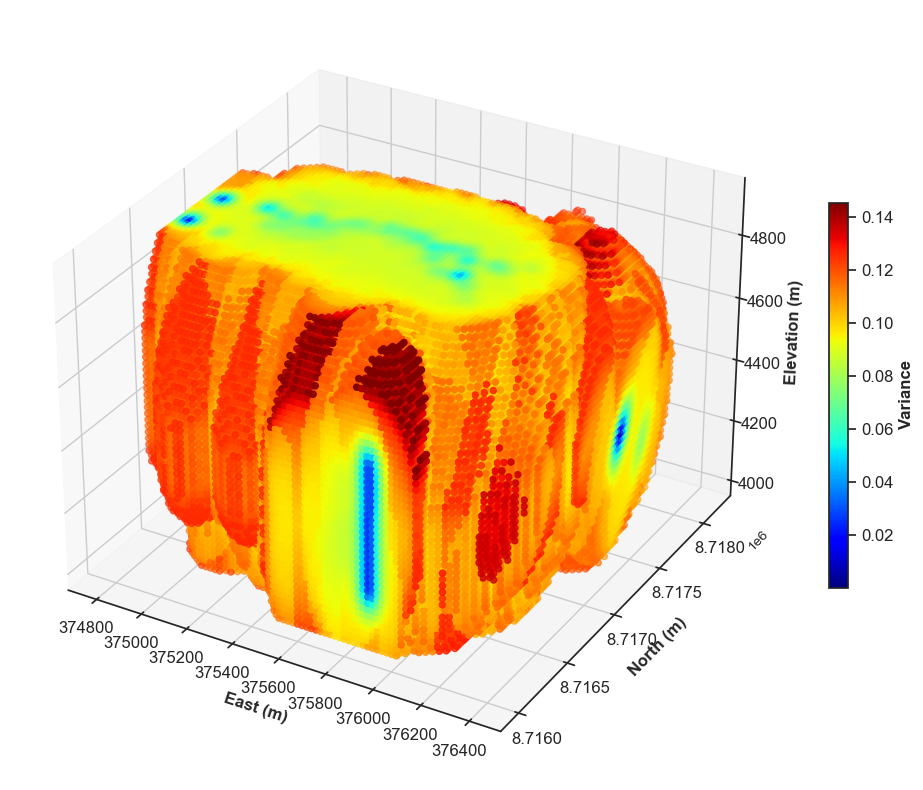

In [39]:
# Configuración de estilo y tamaño de fuente
rcParams['font.family'] = 'sans-serif'  # Cambiar a sans-serif
rcParams['font.size'] = 10             # Tamaño de fuente más pequeño
# Extraer las columnas X, Y, Z y OK para graficar
X = df['X']
Y = df['Y']
Z = df['Z']
VK = df['OK_krig_var']

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear una dispersión 3D
sc = ax.scatter(X, Y, Z, c=VK, cmap='jet', marker='o')

# Añadir la barra de color
cbar = fig.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Variance', fontsize=12)
cbar.ax.tick_params(labelsize=12)       # Tamaño más pequeño para los números de la barra de color
# Etiquetas
ax.set_xlabel('East (m)', fontsize=12)  # Etiqueta con fuente sans-serif y tamaño ajustado
ax.set_ylabel('North (m)', fontsize=12)
ax.set_zlabel('Elevation (m)', fontsize=12)
# Tamaño más pequeño para los números de los ejes
ax.tick_params(axis='x', labelsize=12)  # Reducir tamaño de las marcas en el eje X
ax.tick_params(axis='y', labelsize=12)  # Reducir tamaño de las marcas en el eje Y
ax.tick_params(axis='z', labelsize=12)  # Reducir tamaño de las marcas en el eje Z
# Mostrar gráfico con un diseño ajustado
plt.tight_layout()
plt.savefig('3d modelo variance.jpg', dpi=800)
# Mostrar la gráfica
plt.show()

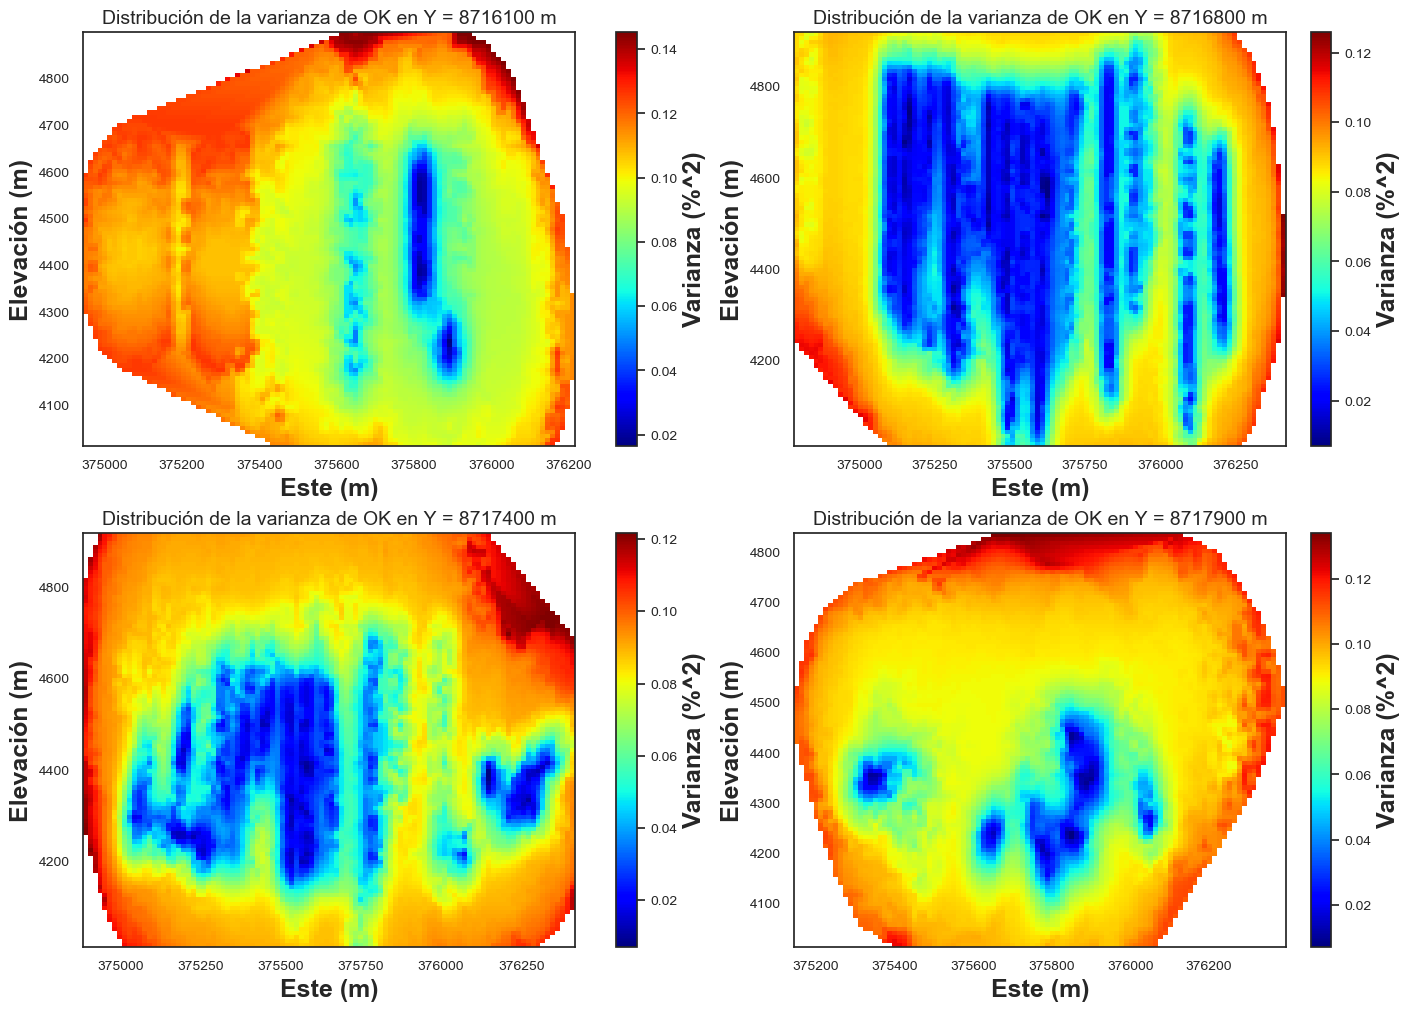

In [40]:
# Extraer las columnas X, Y, Z y OK para graficar
X = df['X'].values
Y = df['Y'].values
Z = df['Z'].values
VK = df['OK_krig_var'].values

# Definir los cortes en Y
y_levels = [8716100, 8716800, 8717400, 8717900]  # Ejemplo de cuatro niveles de corte

# Crear la figura para los cuatro subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Iterar sobre los niveles de corte y graficar
for i, y_level in enumerate(y_levels):
    # Filtrar los datos para el nivel de corte
    mask = (Y >= y_level) & (Y < y_level + 50)  # Filtra por un rango alrededor de cada nivel
    X_slice = X[mask]
    Z_slice = Z[mask]
    VK_slice = VK[mask]
    
    # Crear malla para graficar
    xi = np.linspace(X_slice.min(), X_slice.max(), 100)
    zi = np.linspace(Z_slice.min(), Z_slice.max(), 100)
    xi, zi = np.meshgrid(xi, zi)
    yi = griddata((X_slice, Z_slice), VK_slice, (xi, zi), method='linear')
    
    # Seleccionar la posición del subplot
    ax = axs[i // 2, i % 2]
    c = ax.pcolormesh(xi, zi, yi, cmap='jet', shading='auto')
    
    # Añadir barra de color
    fig.colorbar(c, ax=ax, label='Varianza (%^2)')

    # Limitar el número de ticks en el eje X a 7
    ax.xaxis.set_major_locator(ticker.MaxNLocator(7))
    
    # Etiquetas y título
    ax.set_title(f'Distribución de la varianza de OK en Y = {y_level} m')
    ax.set_xlabel('Este (m)')
    ax.set_ylabel('Elevación (m)')

# Guardar el gráfico
#plt.savefig('Image/OK_2D_slices_variances.jpg', dpi=600)

# Mostrar la gráfica
plt.show()

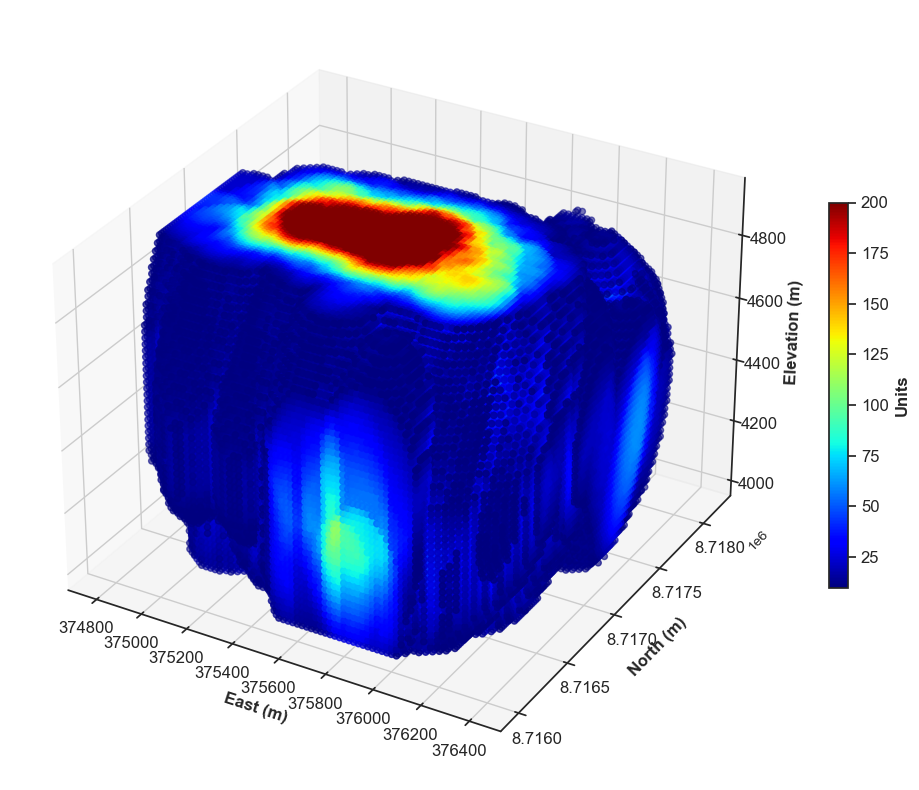

In [42]:
# Configuración de estilo y tamaño de fuente
rcParams['font.family'] = 'sans-serif'  # Cambiar a sans-serif
rcParams['font.size'] = 10             # Tamaño de fuente más pequeño
# Extraer las columnas X, Y, Z y OK para graficar
X = df['X']
Y = df['Y']
Z = df['Z']
NS = df['OK_n_samples']

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear una dispersión 3D
sc = ax.scatter(X, Y, Z, c=NS, cmap='jet', marker='o')

# Añadir la barra de color
cbar = fig.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Units', fontsize=12)
cbar.ax.tick_params(labelsize=12)       # Tamaño más pequeño para los números de la barra de color
# Etiquetas
ax.set_xlabel('East (m)', fontsize=12)  # Etiqueta con fuente sans-serif y tamaño ajustado
ax.set_ylabel('North (m)', fontsize=12)
ax.set_zlabel('Elevation (m)', fontsize=12)
# Tamaño más pequeño para los números de los ejes
ax.tick_params(axis='x', labelsize=12)  # Reducir tamaño de las marcas en el eje X
ax.tick_params(axis='y', labelsize=12)  # Reducir tamaño de las marcas en el eje Y
ax.tick_params(axis='z', labelsize=12)  # Reducir tamaño de las marcas en el eje Z

# Mostrar gráfico con un diseño ajustado
plt.tight_layout()
plt.savefig('3d modelo samples.jpg', dpi=800)
# Mostrar la gráfica
plt.show()

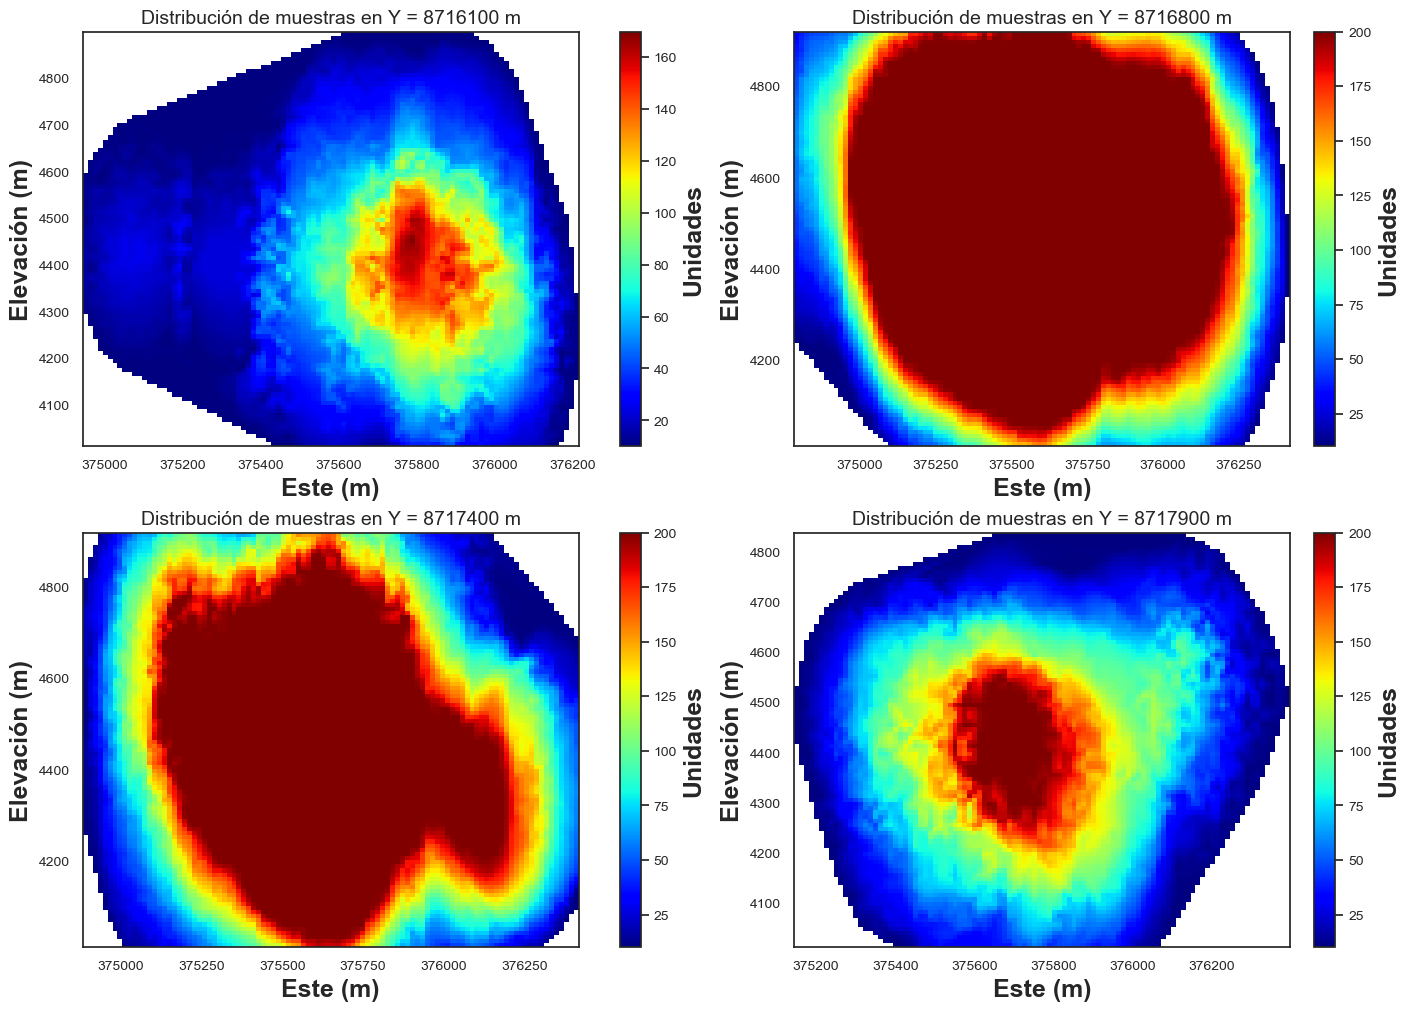

In [43]:
# Extraer las columnas X, Y, Z y OK para graficar
X = df['X'].values
Y = df['Y'].values
Z = df['Z'].values
NS = df['OK_n_samples'].values

# Definir los cortes en Y
y_levels = [8716100, 8716800, 8717400, 8717900]  # Ejemplo de cuatro niveles de corte

# Crear la figura para los cuatro subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Iterar sobre los niveles de corte y graficar
for i, y_level in enumerate(y_levels):
    # Filtrar los datos para el nivel de corte
    mask = (Y >= y_level) & (Y < y_level + 50)  # Filtra por un rango alrededor de cada nivel
    X_slice = X[mask]
    Z_slice = Z[mask]
    NS_slice = NS[mask]
    
    # Crear malla para graficar
    xi = np.linspace(X_slice.min(), X_slice.max(), 100)
    zi = np.linspace(Z_slice.min(), Z_slice.max(), 100)
    xi, zi = np.meshgrid(xi, zi)
    yi = griddata((X_slice, Z_slice), NS_slice, (xi, zi), method='linear')
    
    # Seleccionar la posición del subplot
    ax = axs[i // 2, i % 2]
    c = ax.pcolormesh(xi, zi, yi, cmap='jet', shading='auto')
    
    # Añadir barra de color
    fig.colorbar(c, ax=ax, label='Unidades')

    # Limitar el número de ticks en el eje X a 7
    ax.xaxis.set_major_locator(ticker.MaxNLocator(7))
    
    # Etiquetas y título
    ax.set_title(f'Distribución de muestras en Y = {y_level} m')
    ax.set_xlabel('Este (m)')
    ax.set_ylabel('Elevación (m)')

# Guardar el gráfico
#plt.savefig('Image/OK_2D_slices_samples.jpg', dpi=600)

# Mostrar la gráfica
plt.show()

In [138]:
# Crear la columna 'calidad_code' basada en 'OK_krig_var'
df['calidad_code'] = df['OK_krig_var'].apply(lambda x: 1 if x < 0.04 else 0)

# Calcular la columna 'cov' basada en 'OK_krig_var' y 'OK'
df["cov"] = np.sqrt(df["OK_krig_var"]) / df["OK"]

# Mostrar las primeras filas del DataFrame resultante
print(df.head())

     OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
37 0.31          -0.03                      365.71         0.11         11.00   
38 0.30          -0.03                      363.69         0.11         13.00   
39 0.27          -0.03                      364.97         0.11         15.00   
40 0.27          -0.03                      360.78         0.11         15.00   
41 0.19          -0.04                      343.19         0.12         12.00   

           X          Y       Z  calidad_code  cov  
37 375530.00 8715980.00 4015.00             0 1.10  
38 375550.00 8715980.00 4015.00             0 1.10  
39 375570.00 8715980.00 4015.00             0 1.22  
40 375590.00 8715980.00 4015.00             0 1.23  
41 375610.00 8715980.00 4015.00             0 1.87  


In [139]:
df.describe().T

count       mean    std        min        25%  \
OK                         318443.00       0.35   0.15       0.00       0.26   
OK_Lagrangian              318443.00      -0.01   0.01      -0.06      -0.01   
OK_average_sample_distance 318443.00     231.91  59.19     114.27     189.35   
OK_krig_var                318443.00       0.07   0.03       0.00       0.05   
OK_n_samples               318443.00     124.36  70.99      10.00      54.00   
X                          318443.00  375635.82 416.57  374790.00  375310.00   
Y                          318443.00 8717030.96 559.01 8715980.00 8716560.00   
Z                          318443.00    4453.24 249.27    4015.00    4255.00   
calidad_code               318443.00       0.16   0.37       0.00       0.00   
cov                        318443.00       1.07   5.70       0.05       0.62   

                                  50%        75%        max  
OK                               0.33       0.42       2.21  
OK_Lagrangian                   -0.00      -0.00       0.00  
OK_average_sample_distance     224.66     269.69     433.19  
OK_krig_var                      0.08       0.09       0.15  
OK_n_samples                   131.00     200.00     200.00  
X                           375650.00  375970.00  376410.00  
Y                          8717020.00 8717480.00 8718160.00  
Z                             4455.00    4655.00    4915.00  
calidad_code                     0.00       0.00       1.00  
cov                              0.83       1.10    1740.67

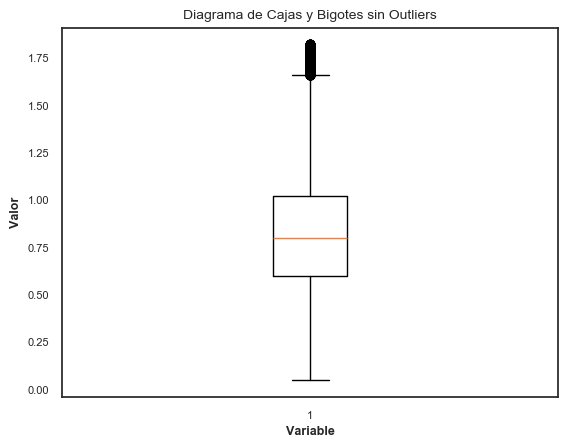

In [140]:
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame y "cov" es la columna que deseas visualizar
data = df["cov"]

# Calcular los cuantiles
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
iqr = q3 - q1

# Definir los límites para identificar outliers
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Filtrar los datos para excluir outliers
filtered_data = data[(data >= lower_limit) & (data <= upper_limit)]

# Crear un diagrama de cajas y bigotes sin outliers
plt.boxplot(filtered_data)

# Configuración de etiquetas y título
plt.xlabel("Variable")
plt.ylabel("Valor")
plt.title("Diagrama de Cajas y Bigotes sin Outliers")

# Mostrar el gráfico
plt.show()

In [141]:
valores_unicos_Z = df["Z"].unique()
print(valores_unicos_Z)

[4015. 4035. 4055. 4075. 4095. 4115. 4135. 4155. 4175. 4195. 4215. 4235.
 4255. 4275. 4295. 4315. 4335. 4355. 4375. 4395. 4415. 4435. 4455. 4475.
 4495. 4515. 4535. 4555. 4575. 4595. 4615. 4635. 4655. 4675. 4695. 4715.
 4735. 4755. 4775. 4795. 4815. 4835. 4855. 4875. 4895. 4915.]


In [142]:
valores_unicos_Y = df["Y"].unique()
print(valores_unicos_Y)

[8715980. 8716000. 8716020. 8716040. 8716060. 8716080. 8716100. 8716120.
 8716140. 8716160. 8716180. 8716200. 8716220. 8716240. 8716260. 8716280.
 8716300. 8716320. 8716340. 8716360. 8716380. 8716400. 8716420. 8716440.
 8716460. 8716480. 8716500. 8716520. 8716540. 8716560. 8716580. 8716600.
 8716620. 8716640. 8716660. 8716680. 8716700. 8716720. 8716740. 8716760.
 8716780. 8716800. 8716820. 8716840. 8716860. 8716880. 8716900. 8716920.
 8716940. 8716960. 8716980. 8717000. 8717020. 8717040. 8717060. 8717080.
 8717100. 8717120. 8717140. 8717160. 8717180. 8717200. 8717220. 8717240.
 8717260. 8717280. 8717300. 8717320. 8717340. 8717360. 8717380. 8717400.
 8717420. 8717440. 8717460. 8717480. 8717500. 8717520. 8717540. 8717560.
 8717580. 8717600. 8717620. 8717640. 8717660. 8717680. 8717700. 8717720.
 8717740. 8717760. 8717780. 8717800. 8717820. 8717840. 8717860. 8717880.
 8717900. 8717920. 8717940. 8717960. 8717980. 8718000. 8718020. 8718040.
 8718060. 8718080. 8718100. 8718120. 8718140. 87181

In [143]:
corte = 8716520

df_nueva = df[df['Y'] == corte] 
df_nueva.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  \
2224 0.40          -0.04                      204.15         0.12   
2225 0.43          -0.03                      202.49         0.12   
2226 0.33          -0.02                      211.21         0.11   
2227 0.33          -0.02                      219.14         0.10   
2228 0.29          -0.01                      245.56         0.09   

      OK_n_samples         X          Y       Z  calidad_code  cov  
2224         12.00 374990.00 8716520.00 4015.00             0 0.87  
2225         14.00 375010.00 8716520.00 4015.00             0 0.80  
2226         16.00 375030.00 8716520.00 4015.00             0 0.98  
2227         18.00 375050.00 8716520.00 4015.00             0 0.98  
2228         23.00 375070.00 8716520.00 4015.00             0 1.03

In [144]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

# Definir la función para actualizar la calidad en 3D con KDTree de manera más optimizada
def actualizar_calidad_3d_kdtree_numpy(df):
    df_actualizado = df.copy()
    h = 20  # Tamaño de los bloques
    coords = df[['X', 'Y', 'Z']].values
    kdtree = cKDTree(coords)  # Usar cKDTree que es más rápido

    # Buscar todos los vecinos en una sola llamada
    vecinos_indices = kdtree.query_ball_tree(kdtree, h * np.sqrt(3))

    # Convertir calidad_code a un array de numpy para operaciones rápidas
    calidad_codes = df['calidad_code'].values
    nuevas_categorias = calidad_codes.copy()

    # Recorrer usando numpy para realizar las actualizaciones
    for index, indices_circundantes in enumerate(vecinos_indices):
        indices_circundantes = np.array(indices_circundantes)  # Convertir a numpy array
        indices_circundantes = indices_circundantes[indices_circundantes != index]  # Excluir el índice actual
        
        if indices_circundantes.size > 0:
            # Calcular el porcentaje de otras categorías alrededor
            porcentaje_otras_categorias = np.mean(calidad_codes[indices_circundantes] != calidad_codes[index])
            if porcentaje_otras_categorias > 0.51:
                # Encontrar la nueva categoría usando numpy
                valores, conteos = np.unique(calidad_codes[indices_circundantes], return_counts=True)
                nueva_categoria = valores[np.argmax(conteos)]
                nuevas_categorias[index] = nueva_categoria

    # Actualizar las categorías en el DataFrame
    df_actualizado['calidad_code'] = nuevas_categorias
    return df_actualizado

# Actualizar el DataFrame varias veces
df_calidad = actualizar_calidad_3d_kdtree_numpy(df)
df_calidad2 = actualizar_calidad_3d_kdtree_numpy(df_calidad)
df_calidad3 = actualizar_calidad_3d_kdtree_numpy(df_calidad2)

# Asignar el valor final de calidad al DataFrame original
df["confianza"] = df_calidad3["calidad_code"]
df['confianza_geo'] = df['confianza'].map({0: 'baja', 1: 'alta'})

# Mostrar las primeras filas del DataFrame resultante
print(df.head())

     OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
37 0.31          -0.03                      365.71         0.11         11.00   
38 0.30          -0.03                      363.69         0.11         13.00   
39 0.27          -0.03                      364.97         0.11         15.00   
40 0.27          -0.03                      360.78         0.11         15.00   
41 0.19          -0.04                      343.19         0.12         12.00   

           X          Y       Z  calidad_code  cov  confianza confianza_geo  
37 375530.00 8715980.00 4015.00             0 1.10          0          baja  
38 375550.00 8715980.00 4015.00             0 1.10          0          baja  
39 375570.00 8715980.00 4015.00             0 1.22          0          baja  
40 375590.00 8715980.00 4015.00             0 1.23          0          baja  
41 375610.00 8715980.00 4015.00             0 1.87          0          baja  


In [145]:
df.describe().T

count       mean    std        min        25%  \
OK                         318443.00       0.35   0.15       0.00       0.26   
OK_Lagrangian              318443.00      -0.01   0.01      -0.06      -0.01   
OK_average_sample_distance 318443.00     231.91  59.19     114.27     189.35   
OK_krig_var                318443.00       0.07   0.03       0.00       0.05   
OK_n_samples               318443.00     124.36  70.99      10.00      54.00   
X                          318443.00  375635.82 416.57  374790.00  375310.00   
Y                          318443.00 8717030.96 559.01 8715980.00 8716560.00   
Z                          318443.00    4453.24 249.27    4015.00    4255.00   
calidad_code               318443.00       0.16   0.37       0.00       0.00   
cov                        318443.00       1.07   5.70       0.05       0.62   
confianza                  318443.00       0.15   0.36       0.00       0.00   

                                  50%        75%        max  
OK                               0.33       0.42       2.21  
OK_Lagrangian                   -0.00      -0.00       0.00  
OK_average_sample_distance     224.66     269.69     433.19  
OK_krig_var                      0.08       0.09       0.15  
OK_n_samples                   131.00     200.00     200.00  
X                           375650.00  375970.00  376410.00  
Y                          8717020.00 8717480.00 8718160.00  
Z                             4455.00    4655.00    4915.00  
calidad_code                     0.00       0.00       1.00  
cov                              0.83       1.10    1740.67  
confianza                        0.00       0.00       1.00

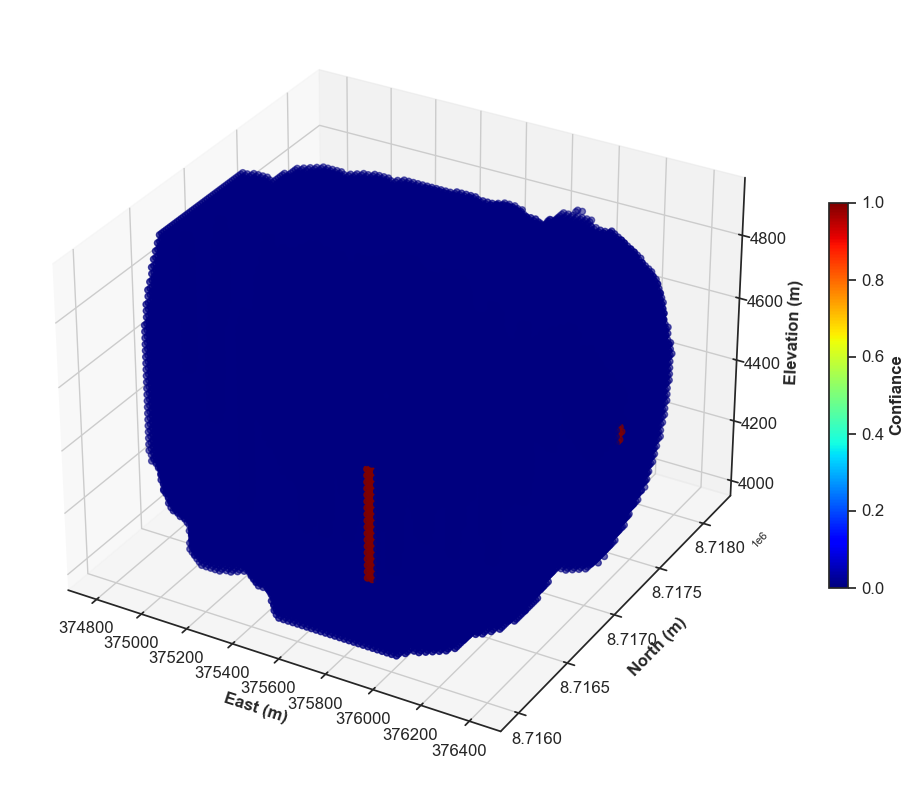

In [146]:
# Configuración de estilo y tamaño de fuente
rcParams['font.family'] = 'sans-serif'  # Cambiar a sans-serif
rcParams['font.size'] = 10             # Tamaño de fuente más pequeño
# Extraer las columnas X, Y, Z y OK para graficar
X = df['X']
Y = df['Y']
Z = df['Z']
C = df['confianza']

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear una dispersión 3D
sc = ax.scatter(X, Y, Z, c=C, cmap='jet', marker='o')

# Añadir la barra de color
cbar = fig.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Confiance', fontsize=12)
cbar.ax.tick_params(labelsize=12)       # Tamaño más pequeño para los números de la barra de color
# Etiquetas
ax.set_xlabel('East (m)', fontsize=12)  # Etiqueta con fuente sans-serif y tamaño ajustado
ax.set_ylabel('North (m)', fontsize=12)
ax.set_zlabel('Elevation (m)', fontsize=12)
# Tamaño más pequeño para los números de los ejes
ax.tick_params(axis='x', labelsize=12)  # Reducir tamaño de las marcas en el eje X
ax.tick_params(axis='y', labelsize=12)  # Reducir tamaño de las marcas en el eje Y
ax.tick_params(axis='z', labelsize=12)  # Reducir tamaño de las marcas en el eje Z

# Mostrar gráfico con un diseño ajustado
plt.tight_layout()
plt.savefig('3d modelo confidence.jpg', dpi=800)
# Mostrar la gráfica
plt.show()

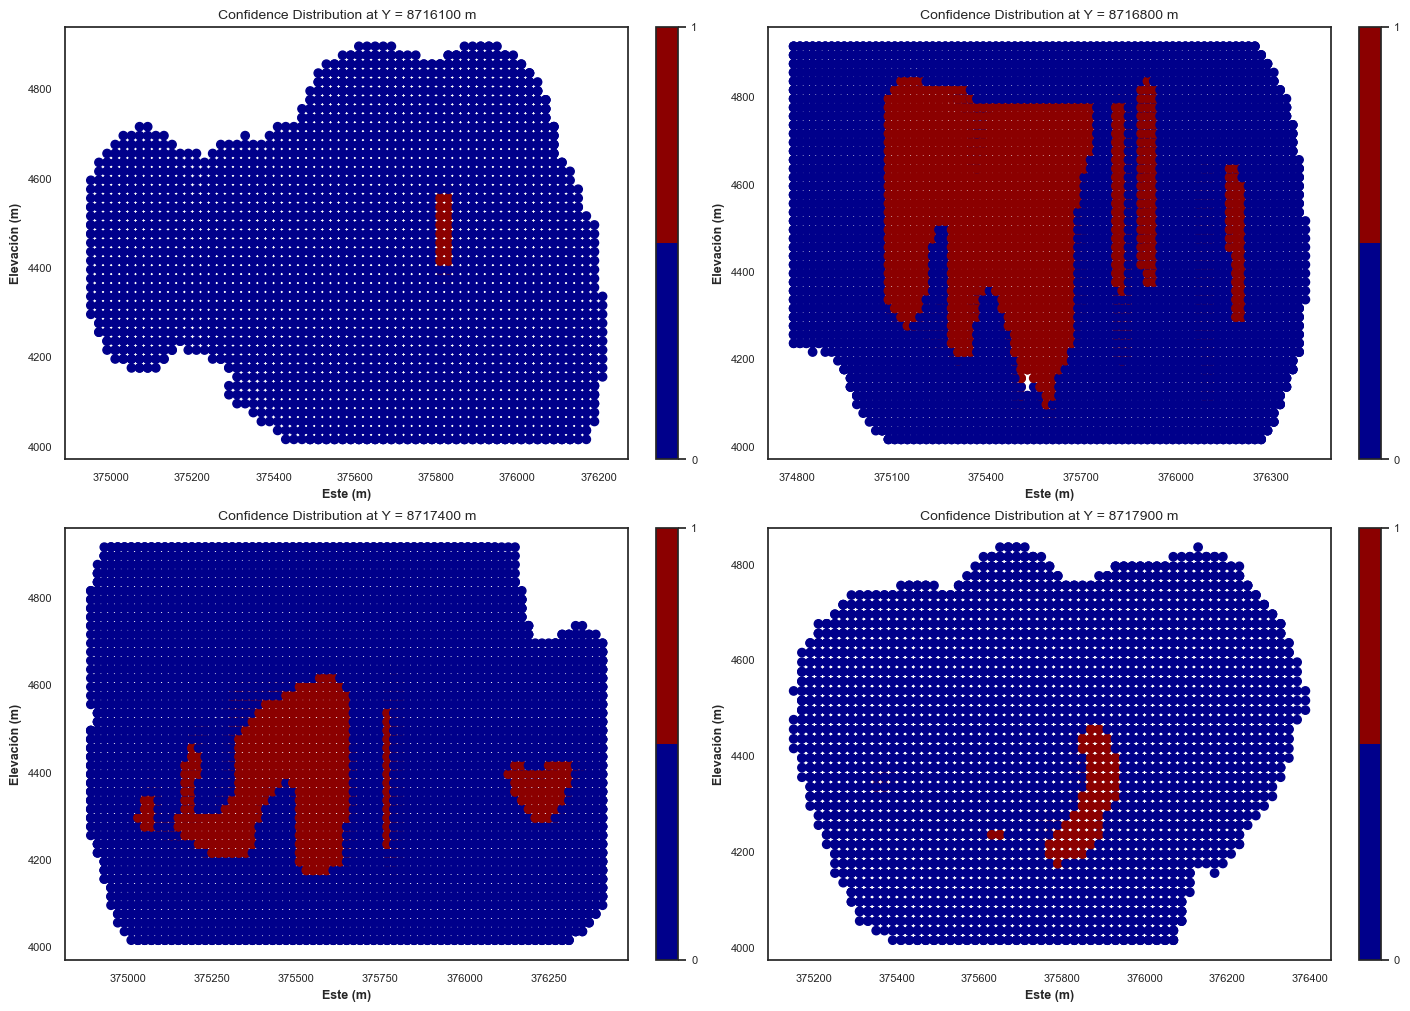

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  

# Extraer las columnas X, Y, Z y OK para graficar
X = df['X'].values
Y = df['Y'].values
Z = df['Z'].values
C = df['confianza'].values

# Definir los cortes en Y
y_levels = [8716100, 8716800, 8717400, 8717900]  # Ejemplo de cuatro niveles de corte

# Crear la figura para los cuatro subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Crear un mapa de colores personalizado para 0 (azul) y 1 (rojo)
cmap = ListedColormap(['#00008B', '#8B0000'])

# Iterar sobre los niveles de corte y graficar
for i, y_level in enumerate(y_levels):
    # Filtrar los datos para el nivel de corte
    mask = (Y >= y_level) & (Y < y_level + 50)  # Filtra por un rango alrededor de cada nivel
    X_slice = X[mask]
    Z_slice = Z[mask]
    C_slice = C[mask]
    
    # Convertir C_slice a valores binarios 0 y 1
    C_slice_bin = np.where(C_slice > 0.5, 1, 0)  # Ajusta el umbral según sea necesario
    
    # Seleccionar la posición del subplot
    ax = axs[i // 2, i % 2]
    
    # Usar scatter para mostrar solo los puntos de datos
    scatter = ax.scatter(X_slice, Z_slice, c=C_slice_bin, cmap=cmap, vmin=0, vmax=1)
    
    # Añadir barra de color
    cbar = fig.colorbar(scatter, ax=ax, ticks=[0, 1])  # Limitar los ticks a 0 y 1
    cbar.ax.set_yticklabels(['0', '1'])  # Etiquetas para la barra de color

    # Limitar el número de ticks en el eje X a 7
    ax.xaxis.set_major_locator(ticker.MaxNLocator(7))
    
    # Etiquetas y título
    ax.set_title(f'Confidence Distribution at Y = {y_level} m')
    ax.set_xlabel('Este (m)')
    ax.set_ylabel('Elevación (m)')

# Guardar el gráfico
#plt.savefig('Image/OK_2D_slices_confidence.jpg', dpi=600)

# Mostrar la gráfica
plt.show()

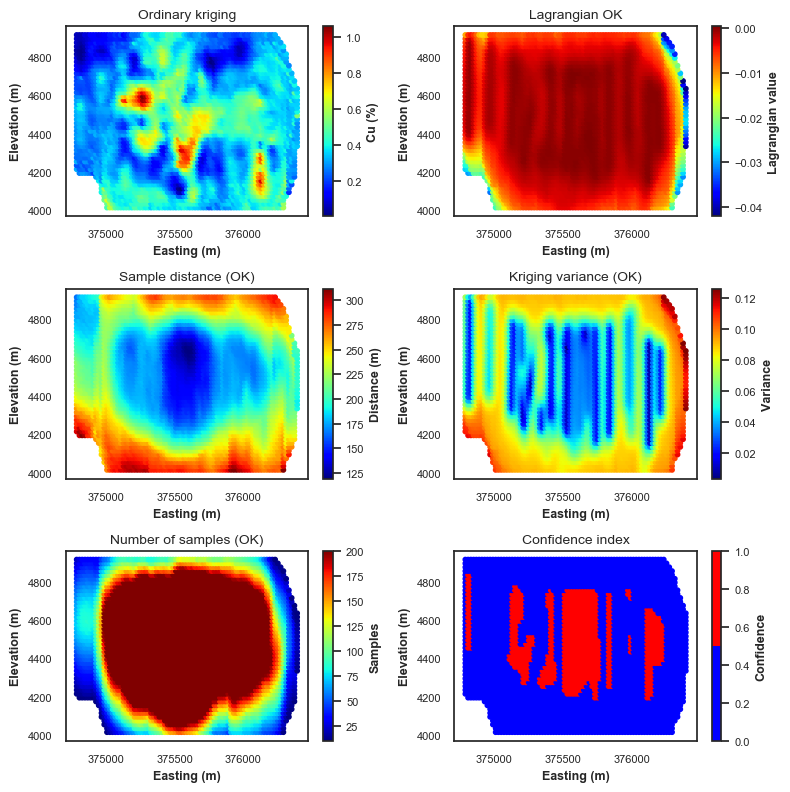

In [148]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

# Configuración de estilo y tamaño de fuente
rcParams['font.family'] = 'sans-serif'
rcParams['font.size'] = 9
rcParams['axes.titlesize'] = 10
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

# Filtro para el corte 8716800
corte = 8716680
mask = (df['Y'] == corte)

# Datos filtrados
X = df.loc[mask, 'X']
Z = df.loc[mask, 'Z']
OK = df.loc[mask, 'OK']
OK_Lagrangian = df.loc[mask, 'OK_Lagrangian']
OK_average_sample_distance = df.loc[mask, 'OK_average_sample_distance']
OK_krig_var = df.loc[mask, 'OK_krig_var']
OK_n_samples = df.loc[mask, 'OK_n_samples']
confianza = df.loc[mask, 'confianza']

# Crear la figura y los subgráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

# Gráfico 1: OK
sc1 = axs[0, 0].scatter(X, Z, c=OK, cmap='jet', marker='o', s=10)
axs[0, 0].set_title('Ordinary kriging')
axs[0, 0].set_xlabel('Easting (m)')
axs[0, 0].set_ylabel('Elevation (m)')
fig.colorbar(sc1, ax=axs[0, 0], label='Cu (%)')

# Gráfico 2: OK_Lagrangian
sc2 = axs[0, 1].scatter(X, Z, c=OK_Lagrangian, cmap='jet', marker='o', s=10)
axs[0, 1].set_title('Lagrangian OK')
axs[0, 1].set_xlabel('Easting (m)')
axs[0, 1].set_ylabel('Elevation (m)')
fig.colorbar(sc2, ax=axs[0, 1], label='Lagrangian value')

# Gráfico 3: OK_average_sample_distance
sc3 = axs[1, 0].scatter(X, Z, c=OK_average_sample_distance, cmap='jet', marker='o', s=10)
axs[1, 0].set_title('Sample distance (OK)')
axs[1, 0].set_xlabel('Easting (m)')
axs[1, 0].set_ylabel('Elevation (m)')
fig.colorbar(sc3, ax=axs[1, 0], label='Distance (m)')

# Gráfico 4: OK_krig_var
sc4 = axs[1, 1].scatter(X, Z, c=OK_krig_var, cmap='jet', marker='o', s=10)
axs[1, 1].set_title('Kriging variance (OK)')
axs[1, 1].set_xlabel('Easting (m)')
axs[1, 1].set_ylabel('Elevation (m)')
fig.colorbar(sc4, ax=axs[1, 1], label='Variance')

# Gráfico 5: OK_n_samples
sc5 = axs[2, 0].scatter(X, Z, c=OK_n_samples, cmap='jet', marker='o', s=10)
axs[2, 0].set_title('Number of samples (OK)')
axs[2, 0].set_xlabel('Easting (m)')
axs[2, 0].set_ylabel('Elevation (m)')
fig.colorbar(sc5, ax=axs[2, 0], label='Samples')

# Gráfico 6: Confianza
from matplotlib.colors import ListedColormap
cmap_confianza = ListedColormap(['blue', 'red'])
sc6 = axs[2, 1].scatter(X, Z, c=confianza, cmap=cmap_confianza, marker='o', s=10)
axs[2, 1].set_title('Confidence index')
axs[2, 1].set_xlabel('Easting (m)')
axs[2, 1].set_ylabel('Elevation (m)')
fig.colorbar(sc6, ax=axs[2, 1], label='Confidence')

# Ajustar diseño
plt.tight_layout()
plt.savefig('finalized_graphs.jpg', dpi=800, bbox_inches='tight')
plt.show()

In [149]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from kmodes.kprototypes import KPrototypes

# Seleccionar las variables deseadas
variables_deseadas = ["OK_average_sample_distance", "OK_krig_var", "OK_n_samples"]

# Crear un nuevo DataFrame con las variables deseadas
nuevo_df1 = df[variables_deseadas].copy()

# Aplicar PowerTransformer a las variables
pt = PowerTransformer()
X_transformed = pt.fit_transform(nuevo_df1)

# Crear un nuevo DataFrame con los datos transformados
nuevo_df = pd.DataFrame(X_transformed, columns=variables_deseadas)

# Añadir la columna 'calidad' al nuevo DataFrame y asegurarse de que es categórica
nuevo_df["calidad"] = df["confianza_geo"].values
nuevo_df["calidad"] = nuevo_df["calidad"].astype('category')  # Asegurar que es categórica

# Mostrar las primeras filas del nuevo DataFrame
print(nuevo_df.head())

   OK_average_sample_distance  OK_krig_var  OK_n_samples calidad
0                        1.96         1.79         -1.75    baja
1                        1.93         1.64         -1.71    baja
2                        1.95         1.52         -1.66    baja
3                        1.90         1.51         -1.66    baja
4                        1.69         2.26         -1.73    baja


In [150]:
nuevo_df.describe().T

count  mean  std   min   25%   50%  75%  max
OK_average_sample_distance 318443.00 -0.00 1.00 -2.53 -0.68 -0.02 0.71 2.67
OK_krig_var                318443.00  0.00 1.00 -2.12 -0.85  0.23 0.68 3.86
OK_n_samples               318443.00  0.00 1.00 -1.78 -0.95  0.17 1.03 1.03

In [151]:
import time
from kmodes.kprototypes import KPrototypes

# Iniciar la medición de tiempo
start_time = time.time()

# Ejecutar el algoritmo K-Prototypes
kproto = KPrototypes(n_clusters=3, init='Huang', n_jobs=4, random_state=17276365)
clusters_kproto = kproto.fit_predict(nuevo_df, categorical=[3])

# Finalizar la medición de tiempo
end_time = time.time()

# Calcular el tiempo total en segundos
execution_time = end_time - start_time
print(f"Tiempo de ejecución del algoritmo K-Prototypes: {execution_time:.4f} segundos")


Tiempo de ejecución del algoritmo K-Prototypes: 3680.5439 segundos


In [152]:
df["Categoria"] = clusters_kproto
df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
37 0.31          -0.03                      365.71         0.11         11.00   
38 0.30          -0.03                      363.69         0.11         13.00   
39 0.27          -0.03                      364.97         0.11         15.00   
40 0.27          -0.03                      360.78         0.11         15.00   
41 0.19          -0.04                      343.19         0.12         12.00   

           X          Y       Z  calidad_code  cov  confianza confianza_geo  \
37 375530.00 8715980.00 4015.00             0 1.10          0          baja   
38 375550.00 8715980.00 4015.00             0 1.10          0          baja   
39 375570.00 8715980.00 4015.00             0 1.22          0          baja   
40 375590.00 8715980.00 4015.00             0 1.23          0          baja   
41 375610.00 8715980.00 4015.00             0 1.87          0          baja   

    Categoria  
37          0  
38          0  
39          0  
40          0  
41          0

In [153]:
df.describe().T

count       mean    std        min        25%  \
OK                         318443.00       0.35   0.15       0.00       0.26   
OK_Lagrangian              318443.00      -0.01   0.01      -0.06      -0.01   
OK_average_sample_distance 318443.00     231.91  59.19     114.27     189.35   
OK_krig_var                318443.00       0.07   0.03       0.00       0.05   
OK_n_samples               318443.00     124.36  70.99      10.00      54.00   
X                          318443.00  375635.82 416.57  374790.00  375310.00   
Y                          318443.00 8717030.96 559.01 8715980.00 8716560.00   
Z                          318443.00    4453.24 249.27    4015.00    4255.00   
calidad_code               318443.00       0.16   0.37       0.00       0.00   
cov                        318443.00       1.07   5.70       0.05       0.62   
confianza                  318443.00       0.15   0.36       0.00       0.00   
Categoria                  318443.00       0.99   0.87       0.00       0.00   

                                  50%        75%        max  
OK                               0.33       0.42       2.21  
OK_Lagrangian                   -0.00      -0.00       0.00  
OK_average_sample_distance     224.66     269.69     433.19  
OK_krig_var                      0.08       0.09       0.15  
OK_n_samples                   131.00     200.00     200.00  
X                           375650.00  375970.00  376410.00  
Y                          8717020.00 8717480.00 8718160.00  
Z                             4455.00    4655.00    4915.00  
calidad_code                     0.00       0.00       1.00  
cov                              0.83       1.10    1740.67  
confianza                        0.00       0.00       1.00  
Categoria                        1.00       2.00       2.00

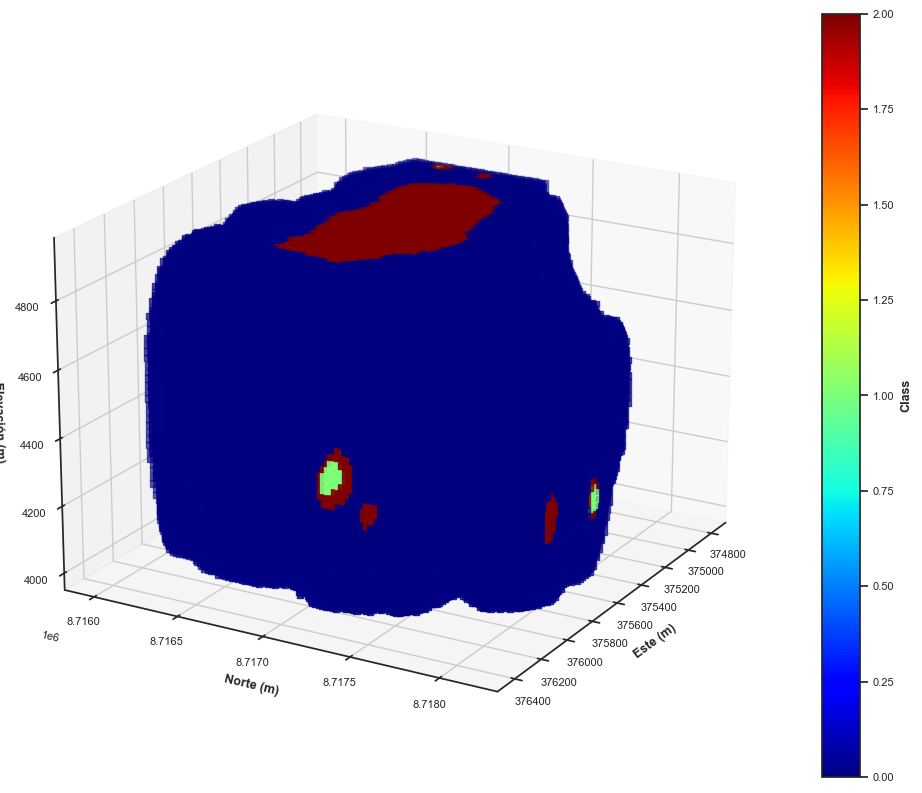

In [154]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tu DataFrame se llama df

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
scatter = ax.scatter(df['X'], df['Y'], df['Z'], c=df['Categoria'], cmap='jet', s=20, marker="s", vmin=0, vmax=2)

# Configuración del gráfico
ax.set_xlabel('Este (m)')
ax.set_ylabel('Norte (m)')
ax.set_zlabel('Elevación (m)')
#ax.set_title('Visualización 3D de Categoria_s_original')

# Agregar barra de color
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Class')
ax.view_init(elev=20, azim=30)
plt.tight_layout()
#plt.savefig("Image/bloques_3d_categoria.jpg", dpi=600)

plt.show()

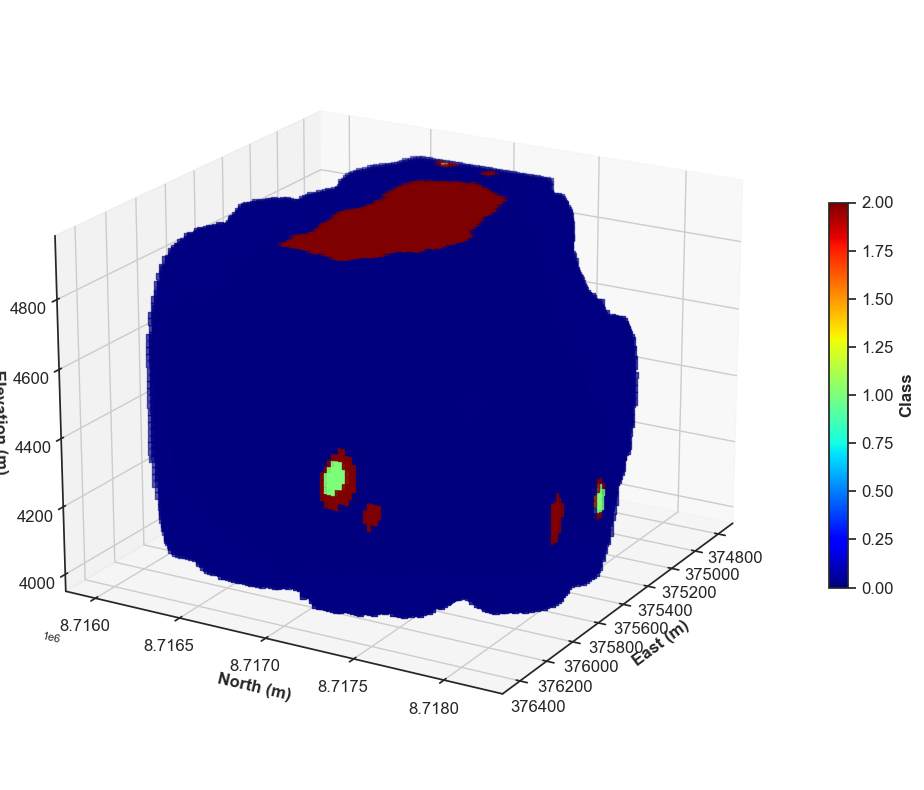

In [155]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

# Configuración de estilo y tamaño de fuente
rcParams['font.family'] = 'sans-serif'  # Cambiar a sans-serif
rcParams['font.size'] = 10             # Tamaño de fuente más pequeño

# Extraer las columnas X, Y, Z y Categoria para graficar
X = df['X']
Y = df['Y']
Z = df['Z']
C = df['Categoria']  # Cambiamos el nombre para mantener el formato solicitado

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear una dispersión 3D
sc = ax.scatter(X, Y, Z, c=C, cmap='jet', marker='s', s=20, vmin=0, vmax=2)

# Añadir la barra de color
cbar = fig.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Class', fontsize=12)  # Etiqueta de la barra de color
cbar.ax.tick_params(labelsize=12)       # Tamaño de los números de la barra de color

# Etiquetas de los ejes
ax.set_xlabel('East (m)', fontsize=12)  
ax.set_ylabel('North (m)', fontsize=12)
ax.set_zlabel('Elevation (m)', fontsize=12)

# Tamaño de los números de los ejes
ax.tick_params(axis='x', labelsize=12)  
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)

# Ajustar la vista
ax.view_init(elev=20, azim=30)

# Mostrar gráfico con un diseño ajustado
plt.tight_layout()
plt.savefig('3d_model_category.jpg', dpi=800)  # Guardar con alta calidad

# Mostrar la gráfica
plt.show()


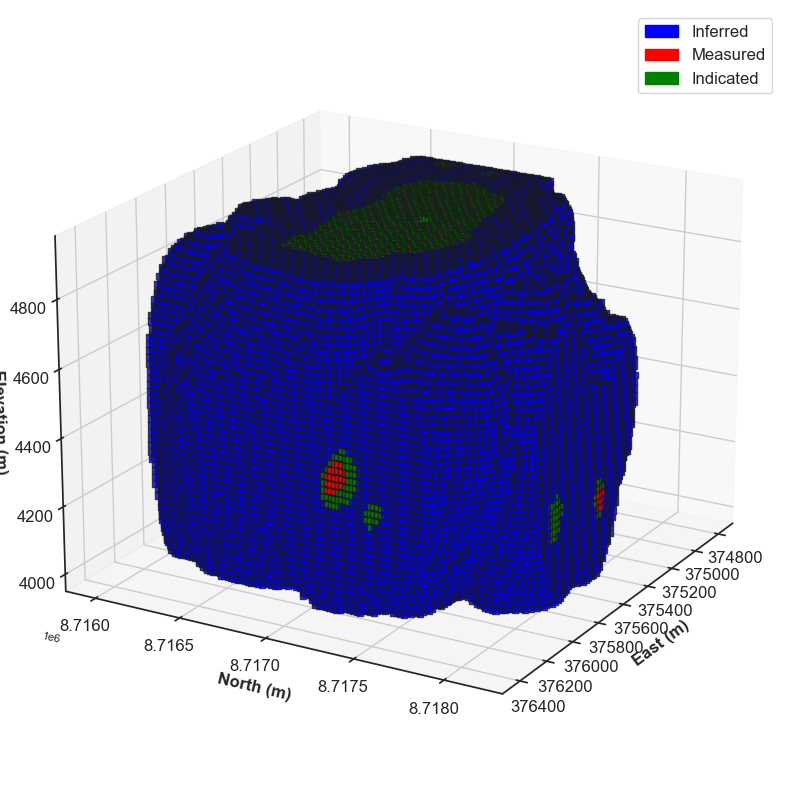

In [156]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
import numpy as np
import matplotlib.patches as mpatches

# Configuración de estilo y tamaño de fuente
rcParams['font.family'] = 'sans-serif'  # Fuente sans-serif
rcParams['font.size'] = 10              # Tamaño de fuente más pequeño

# Extraer las columnas X, Y, Z y Categoria para graficar
X = df['X']
Y = df['Y']
Z = df['Z']
C = df['Categoria']  # Mantener el formato solicitado

# Definir colores para cada categoría
category_colors = {0: 'blue', 1: 'red', 2: 'green'}
category_labels = {0: 'Inferred', 1: 'Measured', 2: 'Indicated'}

# Asignar colores a cada punto según su categoría
colors = [category_colors[c] for c in C]

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear una dispersión 3D con colores categóricos
sc = ax.scatter(X, Y, Z, c=colors, marker='s', s=20, edgecolors='k', alpha=0.8)

# Crear una leyenda manual
legend_patches = [mpatches.Patch(color=color, label=category_labels[cat]) for cat, color in category_colors.items()]
ax.legend(handles=legend_patches, loc='upper right', fontsize=12)

# Etiquetas de los ejes
ax.set_xlabel('East (m)', fontsize=12)  
ax.set_ylabel('North (m)', fontsize=12)
ax.set_zlabel('Elevation (m)', fontsize=12)

# Tamaño de los números de los ejes
ax.tick_params(axis='x', labelsize=12)  
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)

# Ajustar la vista
ax.view_init(elev=20, azim=30)

# Ajustar el diseño
plt.tight_layout()
#plt.savefig('3d_model_category.jpg', dpi=800)  # Guardar con alta calidad

# Mostrar la gráfica
plt.show()


In [157]:
# Exportar el DataFrame resultante a un archivo CSV
output_path = "Kfinal.csv"
df.to_csv(output_path, index=False)

In [158]:
df = pd.read_csv("Kfinal.csv", sep=",")

In [159]:
df.describe().T

count       mean    std        min        25%  \
OK                         318443.00       0.35   0.15       0.00       0.26   
OK_Lagrangian              318443.00      -0.01   0.01      -0.06      -0.01   
OK_average_sample_distance 318443.00     231.91  59.19     114.27     189.35   
OK_krig_var                318443.00       0.07   0.03       0.00       0.05   
OK_n_samples               318443.00     124.36  70.99      10.00      54.00   
X                          318443.00  375635.82 416.57  374790.00  375310.00   
Y                          318443.00 8717030.96 559.01 8715980.00 8716560.00   
Z                          318443.00    4453.24 249.27    4015.00    4255.00   
calidad_code               318443.00       0.16   0.37       0.00       0.00   
cov                        318443.00       1.07   5.70       0.05       0.62   
confianza                  318443.00       0.15   0.36       0.00       0.00   
Categoria                  318443.00       0.99   0.87       0.00       0.00   

                                  50%        75%        max  
OK                               0.33       0.42       2.21  
OK_Lagrangian                   -0.00      -0.00       0.00  
OK_average_sample_distance     224.66     269.69     433.19  
OK_krig_var                      0.08       0.09       0.15  
OK_n_samples                   131.00     200.00     200.00  
X                           375650.00  375970.00  376410.00  
Y                          8717020.00 8717480.00 8718160.00  
Z                             4455.00    4655.00    4915.00  
calidad_code                     0.00       0.00       1.00  
cov                              0.83       1.10    1740.67  
confianza                        0.00       0.00       1.00  
Categoria                        1.00       2.00       2.00

In [160]:
bd=pd.read_csv('sondajesA.csv')

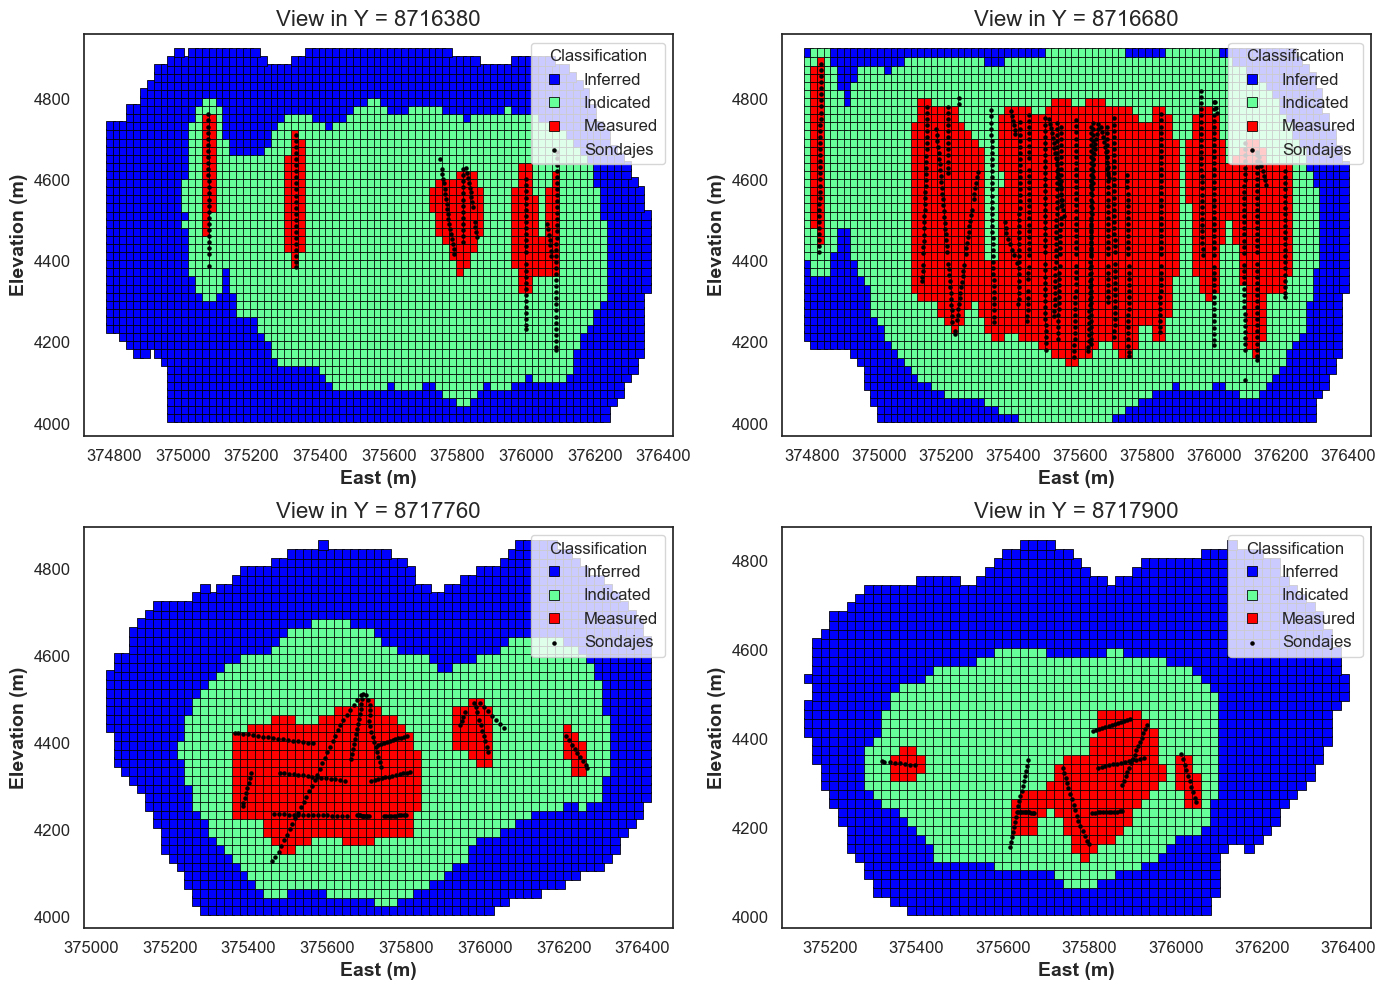

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un diccionario para mapear los números a las etiquetas de texto
categoria_labels = {0: "Inferred", 1: "Measured", 2: "Indicated"}

# Mapear la columna "Categoria" para usar las etiquetas de texto
df['Categoria_label'] = df['Categoria'].map(categoria_labels)

# Configuración de la figura con 2 columnas y 2 filas
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid

# Tamaño de los puntos para clasificación y sondajes
marker_size_clasificacion = 50
marker_size_sondajes = 5  # Puntos de sondajes más pequeños

# Paleta de colores personalizada
palette1 = ["blue", "#66FF99", "red"]

# Definir los cortes de Y que quieres mostrar
cortes_y = [8716380, 8716680, 8717760, 8717900]

# Títulos para cada gráfico
titulos = [f'View in Y = {corte}' for corte in cortes_y]

# Tamaños personalizados
label_fontsize = 14  # Tamaño de etiquetas de ejes
title_fontsize = 16  # Tamaño de títulos
legend_fontsize = 12  # Tamaño de la leyenda

# Generar gráficos en cada subgráfico de la cuadrícula
for i, ax in enumerate(axs.flat):  # Recorre cada eje
    df_corte_y = df[df['Y'] == cortes_y[i]]  # Filtrar los datos para el corte en Y
    
    # Verificar si hay datos para cada corte
    if df_corte_y.empty:
        ax.set_title(f'Sin datos para Y = {cortes_y[i]}', fontsize=title_fontsize)
        continue

    # Graficar la clasificación
    sns.scatterplot(
        x=df_corte_y["X"], 
        y=df_corte_y["Z"], 
        hue=df_corte_y["Categoria_label"], 
        palette=palette1, 
        s=marker_size_clasificacion, 
        marker="s", 
        edgecolor="black", 
        ax=ax
    )

    # Filtrar los sondajes para el mismo corte en Y
    bd_corte_y = bd[bd['Y'] == cortes_y[i]]
    
    # Añadir los sondajes como puntos negros
    if not bd_corte_y.empty:
        ax.scatter(
            bd_corte_y["X"], 
            bd_corte_y["Z"], 
            color="black", 
            s=marker_size_sondajes, 
            label="Sondajes", 
            alpha=1.0  # Sin transparencia para máxima visibilidad
        )
    
    # Ajustar la leyenda
    handles, labels = ax.get_legend_handles_labels()
    if "Sondajes" not in labels:
        handles.append(plt.Line2D([0], [0], color="black", markersize=5, marker="o", linestyle="None", label="Sondajes"))
        labels.append("Sondajes")
    ax.legend(handles=handles, loc='upper right', title="Classification", fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    # Títulos y etiquetas
    ax.set_title(titulos[i], fontsize=title_fontsize)
    ax.set_xlabel("East (m)", fontsize=label_fontsize)
    ax.set_ylabel("Elevation (m)", fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=label_fontsize - 2)
    ax.tick_params(axis='y', labelsize=label_fontsize - 2)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Guardar la figura
#plt.savefig('Clasificación_con_sondajes.jpg', dpi=800)

# Mostrar la figura
plt.show()


In [162]:
print(df["Categoria"].value_counts())


Categoria
0    122308
2    118098
1     78037
Name: count, dtype: int64


Silhouette Score: 0.3496
Davies-Bouldin Index: 0.9560
Calinski-Harabasz Score: 162313.6361


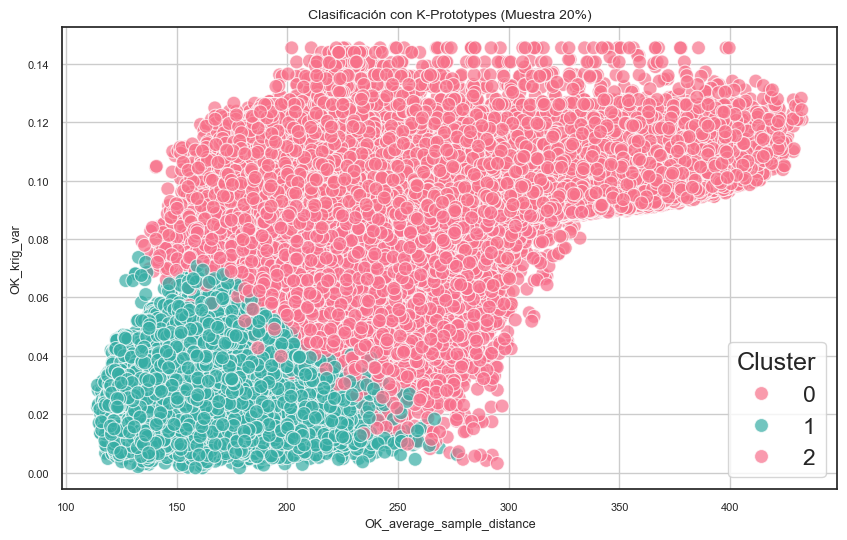

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split

# Tomar una muestra del 20% de los datos asegurando representación de todos los clusters
df_sample, _ = train_test_split(df, test_size=0.5, stratify=df["Categoria"], random_state=42)

# Verificar que la muestra tenga al menos dos clusters
if len(df_sample["Categoria"].unique()) > 1:
    # Seleccionar solo las variables numéricas
    X_numerico_sample = df_sample[["OK_average_sample_distance", "OK_krig_var", "OK_n_samples"]].values
    labels_sample = df_sample["Categoria"].values

    # Calcular métricas de clasificación
    silhouette = silhouette_score(X_numerico_sample, labels_sample)
    davies_bouldin = davies_bouldin_score(X_numerico_sample, labels_sample)
    calinski_harabasz = calinski_harabasz_score(X_numerico_sample, labels_sample)

    # Mostrar métricas
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
else:
    print("No se pueden calcular métricas porque solo hay un cluster en la muestra.")

# Graficar la clasificación con K-Prototypes en la muestra
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_sample["OK_average_sample_distance"], 
                y=df_sample["OK_krig_var"], 
                hue=df_sample["Categoria"], 
                palette="husl", 
                alpha=0.7, 
                s=100)

# Etiquetas y título
plt.xlabel("OK_average_sample_distance")
plt.ylabel("OK_krig_var")
plt.title("Clasificación con K-Prototypes (Muestra 20%)")
plt.legend(title="Cluster")
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [163]:
df2 = df.copy()

In [164]:
df = df.copy()

In [77]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Supongamos que tu dataframe se llama df
# Asegúrate de tener todas las variables necesarias en tu dataframe
# Ajusta las columnas según las que tengas en tu dataframe

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X = df[['X', 'Y', 'Z']]
y = df['Categoria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 neuronas de salida para las tres categorías

# Compilar el modelo con RMSprop en lugar de Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

# Configurar detención temprana
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con detención temprana
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Predecir las categorías en el conjunto de prueba
predictions = model.predict(X_test)
predicted_categories = np.argmax(predictions, axis=1)



Epoch 1/50


7962/7962 [==============================] - 11s 1ms/step - loss: 0.3807 - accuracy: 0.8393 - val_loss: 0.3289 - val_accuracy: 0.8622
Epoch 2/50
7962/7962 [==============================] - 12s 1ms/step - loss: 0.3035 - accuracy: 0.8727 - val_loss: 0.2921 - val_accuracy: 0.8781
Epoch 3/50
7962/7962 [==============================] - 12s 1ms/step - loss: 0.2864 - accuracy: 0.8821 - val_loss: 0.2779 - val_accuracy: 0.8857
Epoch 4/50
7962/7962 [==============================] - 12s 2ms/step - loss: 0.2735 - accuracy: 0.8884 - val_loss: 0.2745 - val_accuracy: 0.8875
Epoch 5/50
7962/7962 [==============================] - 12s 2ms/step - loss: 0.2642 - accuracy: 0.8926 - val_loss: 0.2573 - val_accuracy: 0.8984
Epoch 6/50
7962/7962 [==============================] - 12s 1ms/step - loss: 0.2564 - accuracy: 0.8956 - val_loss: 0.2480 - val_accuracy: 0.9006
Epoch 7/50
7962/7962 [==============================] - 11s 1ms/step - loss: 0.2505 - accuracy: 0.8981 - val_loss: 0.2485 - val

In [78]:
# Supongamos que ya tienes el modelo entrenado (anteriormente definido como 'model')

# Seleccionar las variables X, Y del DataFrame original
X_original = df[['X', 'Y', 'Z']]

# Normalizar los datos (usando el mismo scaler que antes)
X_original = scaler.transform(X_original)

# Realizar la predicción en el conjunto original
predictions_original = model.predict(X_original)
predicted_categories_original = np.argmax(predictions_original, axis=1)

# Crear una nueva columna 'Categoria_s_original' en el DataFrame original con las predicciones
df['Categoria_suavizada'] = predicted_categories_original

9952/9952 [==============================] - 9s 852us/step


In [79]:
df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
0 0.31          -0.03                      365.71         0.11         11.00   
1 0.30          -0.03                      363.69         0.11         13.00   
2 0.27          -0.03                      364.97         0.11         15.00   
3 0.27          -0.03                      360.78         0.11         15.00   
4 0.19          -0.04                      343.19         0.12         12.00   

          X          Y       Z  calidad_code  cov  confianza confianza_geo  \
0 375530.00 8715980.00 4015.00             0 1.10          0          baja   
1 375550.00 8715980.00 4015.00             0 1.10          0          baja   
2 375570.00 8715980.00 4015.00             0 1.22          0          baja   
3 375590.00 8715980.00 4015.00             0 1.23          0          baja   
4 375610.00 8715980.00 4015.00             0 1.87          0          baja   

   Categoria Categoria_label  Categoria_suavizada  
0          0        Inferred                    0  
1          0        Inferred                    0  
2          0        Inferred                    0  
3          0        Inferred                    0  
4          0        Inferred                    0

In [80]:
df.describe().T

count       mean    std        min        25%  \
OK                         318443.00       0.35   0.15       0.00       0.26   
OK_Lagrangian              318443.00      -0.01   0.01      -0.06      -0.01   
OK_average_sample_distance 318443.00     231.91  59.19     114.27     189.35   
OK_krig_var                318443.00       0.07   0.03       0.00       0.05   
OK_n_samples               318443.00     124.36  70.99      10.00      54.00   
X                          318443.00  375635.82 416.57  374790.00  375310.00   
Y                          318443.00 8717030.96 559.01 8715980.00 8716560.00   
Z                          318443.00    4453.24 249.27    4015.00    4255.00   
calidad_code               318443.00       0.16   0.37       0.00       0.00   
cov                        318443.00       1.07   5.70       0.05       0.62   
confianza                  318443.00       0.15   0.36       0.00       0.00   
Categoria                  318443.00       0.99   0.87       0.00       0.00   
Categoria_suavizada        318443.00       1.01   0.88       0.00       0.00   

                                  50%        75%        max  
OK                               0.33       0.42       2.21  
OK_Lagrangian                   -0.00      -0.00       0.00  
OK_average_sample_distance     224.66     269.69     433.19  
OK_krig_var                      0.08       0.09       0.15  
OK_n_samples                   131.00     200.00     200.00  
X                           375650.00  375970.00  376410.00  
Y                          8717020.00 8717480.00 8718160.00  
Z                             4455.00    4655.00    4915.00  
calidad_code                     0.00       0.00       1.00  
cov                              0.83       1.10    1740.67  
confianza                        0.00       0.00       1.00  
Categoria                        1.00       2.00       2.00  
Categoria_suavizada              1.00       2.00       2.00

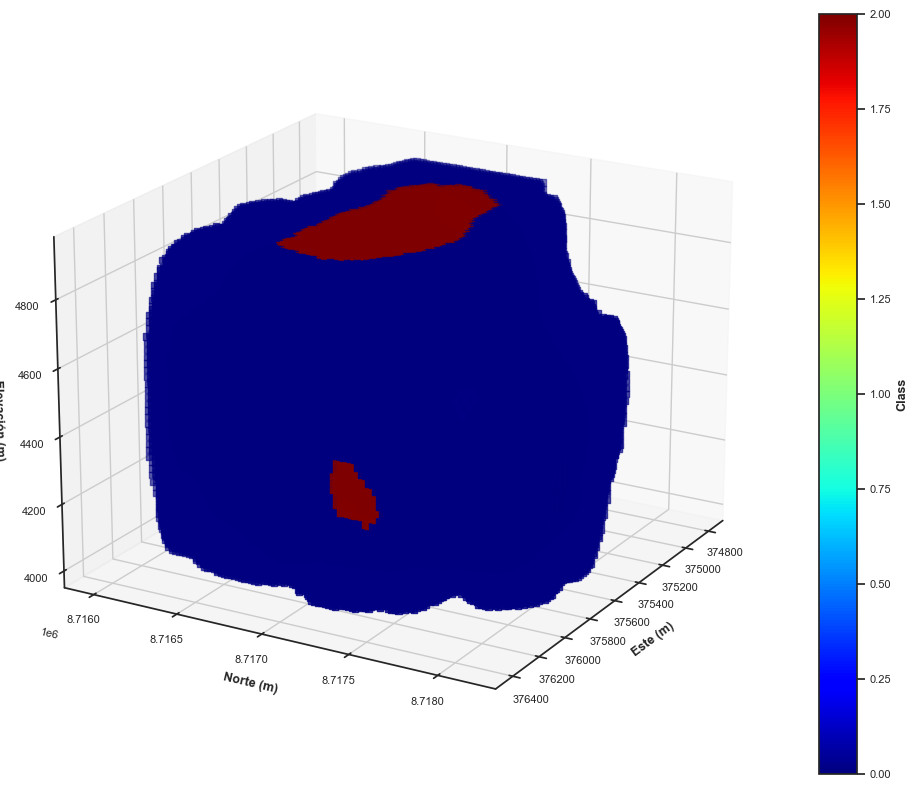

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tu DataFrame se llama df

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
scatter = ax.scatter(df['X'], df['Y'], df['Z'], c=df['Categoria_suavizada'], cmap='jet', s=20, marker="s", vmin=0, vmax=2)

# Configuración del gráfico
ax.set_xlabel('Este (m)')
ax.set_ylabel('Norte (m)')
ax.set_zlabel('Elevación (m)')
#ax.set_title('Visualización 3D de Categoria_s_original')

# Agregar barra de color
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Class')
ax.view_init(elev=20, azim=30)
plt.tight_layout()
#plt.savefig("Image/bloques_3d_categoriaS_AMM.jpg", dpi=600)

plt.show()

In [82]:
bd=pd.read_csv('sondajesA.csv')

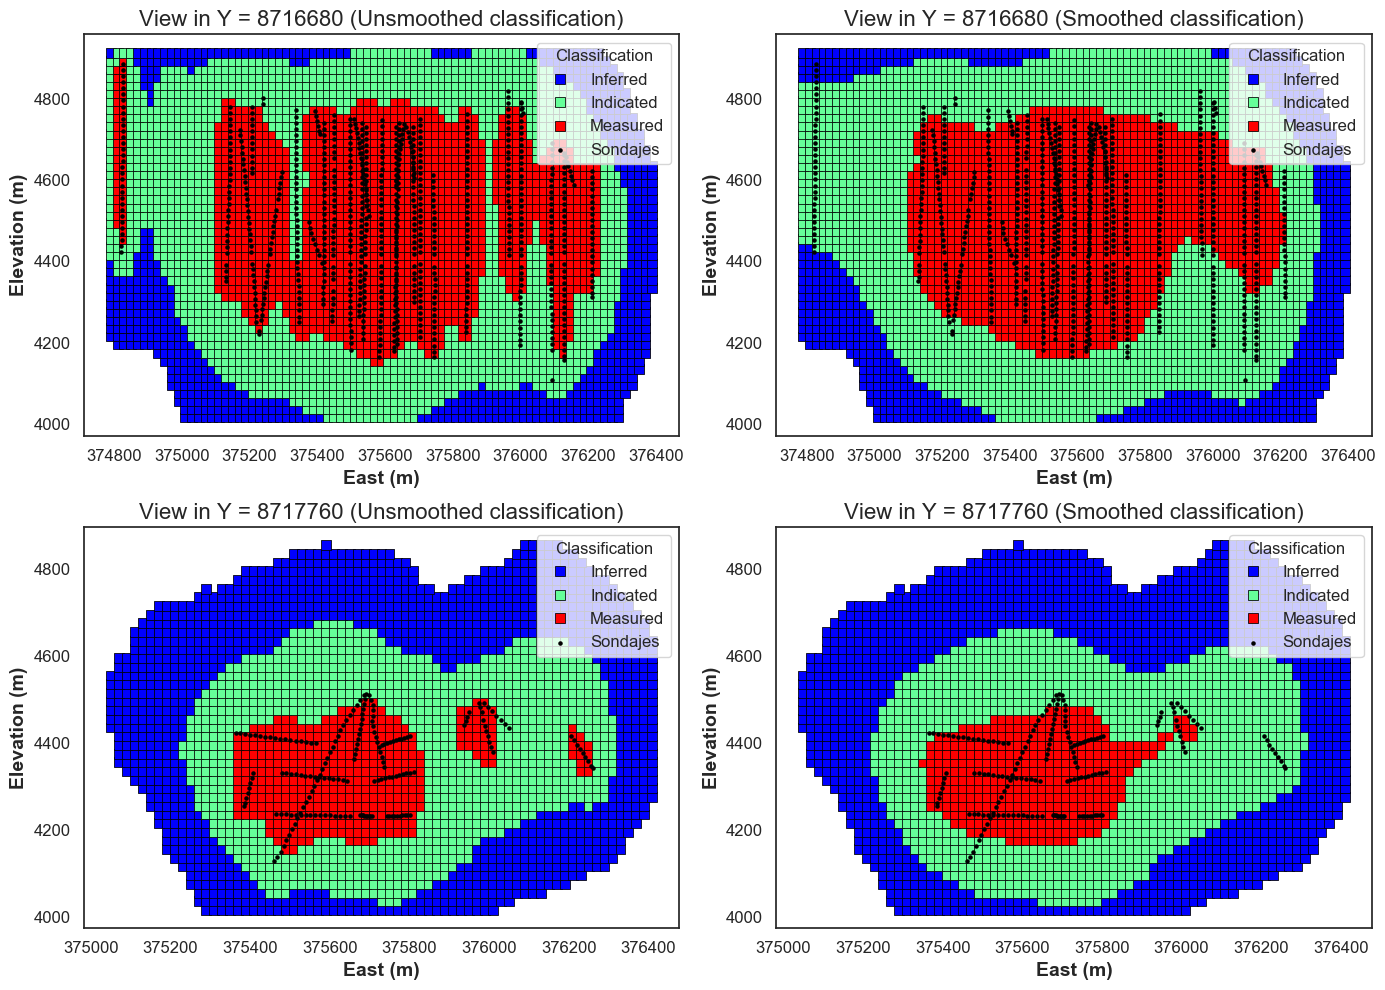

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un diccionario para mapear los números a las etiquetas de texto
categoria_labels = {0: "Inferred", 1: "Measured", 2: "Indicated"}

# Mapear las categorías originales y suavizadas
df['Categoria_label'] = df['Categoria'].map(categoria_labels)
df['Categoria_suavizada_label'] = df['Categoria_suavizada'].map(categoria_labels)

# Configuración de la figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid

# Tamaño de los puntos para clasificación y sondajes
marker_size_clasificacion = 50
marker_size_sondajes = 5  # Puntos de sondajes más pequeños

# Paleta de colores personalizada
palette1 = ["blue", "#66FF99", "red"]

# Cortes de Y que quieres mostrar
cortes_y = [8716680, 8717760]

# Títulos para cada gráfico
titulos = [
    f"View in Y = {cortes_y[0]} (Unsmoothed classification)",
    f"View in Y = {cortes_y[0]} (Smoothed classification)",
    f"View in Y = {cortes_y[1]} (Unsmoothed classification)",
    f"View in Y = {cortes_y[1]} (Smoothed classification)"
]

# Tamaños personalizados
label_fontsize = 14  # Tamaño de etiquetas de ejes
title_fontsize = 16  # Tamaño de títulos
legend_fontsize = 12  # Tamaño de la leyenda

# Generar gráficos
for i, (ax, titulo) in enumerate(zip(axs.flat, titulos)):
    corte_y = cortes_y[i // 2]  # Elegir el corte para la fila correspondiente
    suavizado = i % 2 == 1  # True si es el gráfico suavizado, False si no
    
    # Filtrar datos del corte actual
    df_corte_y = df[df['Y'] == corte_y]
    
    # Seleccionar la categoría para graficar
    categoria_col = 'Categoria_suavizada_label' if suavizado else 'Categoria_label'
    
    # Verificar si hay datos para el corte
    if df_corte_y.empty:
        ax.set_title(f'Sin datos para Y = {corte_y}', fontsize=title_fontsize)
        continue

    # Graficar la clasificación (suavizada o no)
    sns.scatterplot(
        x=df_corte_y["X"], 
        y=df_corte_y["Z"], 
        hue=df_corte_y[categoria_col], 
        palette=palette1, 
        s=marker_size_clasificacion, 
        marker="s", 
        edgecolor="black", 
        ax=ax
    )

    # Filtrar los sondajes para el mismo corte en Y
    bd_corte_y = bd[bd['Y'] == corte_y]  # `bd` es el DataFrame de sondajes
    
    # Añadir los sondajes como puntos negros
    if not bd_corte_y.empty:
        ax.scatter(
            bd_corte_y["X"], 
            bd_corte_y["Z"], 
            color="black", 
            s=marker_size_sondajes, 
            label="Sondajes", 
            alpha=1.0  # Sin transparencia para máxima visibilidad
        )
    
    # Ajustar la leyenda
    handles, labels = ax.get_legend_handles_labels()
    if "Sondajes" not in labels:
        handles.append(plt.Line2D([0], [0], color="black", markersize=5, marker="o", linestyle="None", label="Drillholes"))
        labels.append("Sondajes")
    ax.legend(handles=handles, loc='upper right', title="Classification", fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    # Configurar título y etiquetas
    ax.set_title(titulo, fontsize=title_fontsize)
    ax.set_xlabel("East (m)", fontsize=label_fontsize)
    ax.set_ylabel("Elevation (m)", fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=label_fontsize - 2)
    ax.tick_params(axis='y', labelsize=label_fontsize - 2)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Guardar la figura
plt.savefig('Comparacion_suavizado_ANN RMSPROP.jpg', dpi=800)

# Mostrar la figura
plt.show()

In [84]:
from sklearn.metrics import accuracy_score

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

1991/1991 [==============================] - 2s 913us/step
Precisión en el conjunto de prueba: 0.92


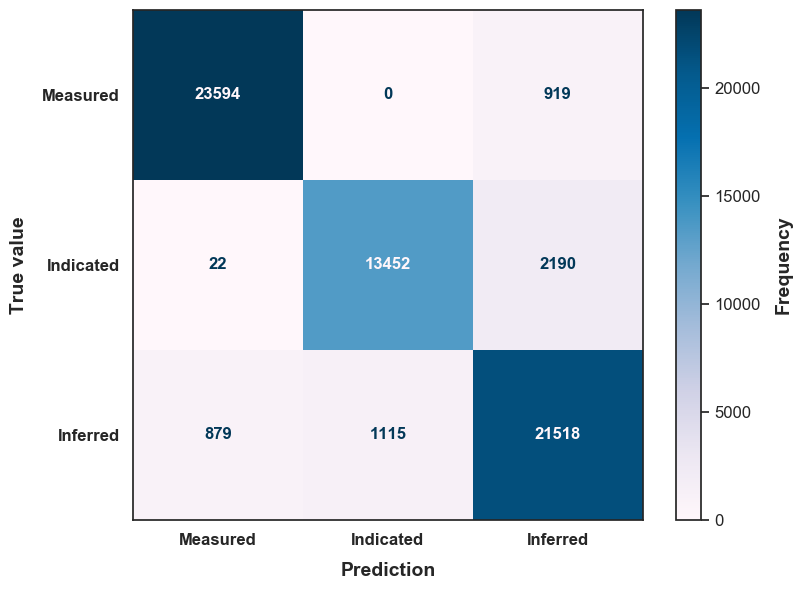

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)  # Usar y_pred_test como predicciones

# Crear una figura con dimensiones personalizadas
plt.figure(figsize=(8, 6))

# Mostrar la matriz de confusión con un diseño más profesional
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Measured", "Indicated", "Inferred"])
disp.plot(cmap="PuBu", colorbar=True, ax=plt.gca())  # Usar un mapa de color profesional (viridis)

# Mejorar título y etiquetas
plt.title("", fontsize=16, fontweight="bold", pad=20)
plt.xlabel('Prediction', fontsize=14, labelpad=10)
plt.ylabel('True value', fontsize=14, labelpad=10)

# Ajustar los números dentro de la matriz
for text in disp.text_.ravel():
    text.set_fontsize(12)  # Tamaño del texto
    text.set_fontweight("bold")  # Negrita para mejor visibilidad

# Personalizar las escalas de los ejes
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Mejorar el diseño del colorbar
if hasattr(disp.im_, "colorbar"):  # Comprobar si el colorbar existe
    cbar = disp.im_.colorbar
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label("Frequency", fontsize=14, labelpad=10)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Guardar la figura en alta calidad (opcional)
plt.savefig("confusion_matrix_RMSprop.jpg", dpi=800, bbox_inches="tight")

# Mostrar la matriz de confusión
plt.show()

In [87]:
from sklearn.metrics import classification_report

# Generar reporte de clasificación
report = classification_report(y_test, y_pred_classes, target_names=["Medidos", "Indicados", "Inferidos"])
print("Reporte de Clasificación:\n", report)


Reporte de Clasificación:
               precision    recall  f1-score   support

     Medidos       0.96      0.96      0.96     24513
   Indicados       0.92      0.86      0.89     15664
   Inferidos       0.87      0.92      0.89     23512

    accuracy                           0.92     63689
   macro avg       0.92      0.91      0.92     63689
weighted avg       0.92      0.92      0.92     63689



In [88]:
df.describe()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  \
count 318443.00      318443.00                   318443.00    318443.00   
mean       0.35          -0.01                      231.91         0.07   
std        0.15           0.01                       59.19         0.03   
min        0.00          -0.06                      114.27         0.00   
25%        0.26          -0.01                      189.35         0.05   
50%        0.33          -0.00                      224.66         0.08   
75%        0.42          -0.00                      269.69         0.09   
max        2.21           0.00                      433.19         0.15   

       OK_n_samples         X          Y         Z  calidad_code       cov  \
count     318443.00 318443.00  318443.00 318443.00     318443.00 318443.00   
mean         124.36 375635.82 8717030.96   4453.24          0.16      1.07   
std           70.99    416.57     559.01    249.27          0.37      5.70   
min           10.00 374790.00 8715980.00   4015.00          0.00      0.05   
25%           54.00 375310.00 8716560.00   4255.00          0.00      0.62   
50%          131.00 375650.00 8717020.00   4455.00          0.00      0.83   
75%          200.00 375970.00 8717480.00   4655.00          0.00      1.10   
max          200.00 376410.00 8718160.00   4915.00          1.00   1740.67   

       confianza  Categoria  Categoria_suavizada  
count  318443.00  318443.00            318443.00  
mean        0.15       0.99                 1.01  
std         0.36       0.87                 0.88  
min         0.00       0.00                 0.00  
25%         0.00       0.00                 0.00  
50%         0.00       1.00                 1.00  
75%         0.00       2.00                 2.00  
max         1.00       2.00                 2.00

In [89]:
df[df["Categoria_suavizada"]==1].describe().T

count       mean    std        min        25%  \
OK                         72643.00       0.44   0.21       0.00       0.30   
OK_Lagrangian              72643.00      -0.00   0.00      -0.01      -0.00   
OK_average_sample_distance 72643.00     162.30  20.99     114.27     146.17   
OK_krig_var                72643.00       0.04   0.02       0.00       0.03   
OK_n_samples               72643.00     197.65  12.05      34.00     200.00   
X                          72643.00  375597.66 278.35  375010.00  375390.00   
Y                          72643.00 8717056.28 358.48 8716360.00 8716780.00   
Z                          72643.00    4473.60 163.64    4135.00    4335.00   
calidad_code               72643.00       0.60   0.49       0.00       0.00   
cov                        72643.00       0.81   9.27       0.05       0.32   
confianza                  72643.00       0.60   0.49       0.00       0.00   
Categoria                  72643.00       1.08   0.27       1.00       1.00   
Categoria_suavizada        72643.00       1.00   0.00       1.00       1.00   

                                  50%        75%        max  
OK                               0.42       0.55       2.21  
OK_Lagrangian                   -0.00      -0.00       0.00  
OK_average_sample_distance     163.81     178.68     221.81  
OK_krig_var                      0.04       0.05       0.09  
OK_n_samples                   200.00     200.00     200.00  
X                           375590.00  375790.00  376370.00  
Y                          8717040.00 8717300.00 8718100.00  
Z                             4455.00    4595.00    4875.00  
calidad_code                     1.00       1.00       1.00  
cov                              0.46       0.66    1740.67  
confianza                        1.00       1.00       1.00  
Categoria                        1.00       1.00       2.00  
Categoria_suavizada              1.00       1.00       1.00

In [90]:
df[df["Categoria_suavizada"]==2].describe().T

count       mean    std        min        25%  \
OK                         123858.00       0.33   0.13       0.00       0.26   
OK_Lagrangian              123858.00      -0.00   0.00      -0.01      -0.00   
OK_average_sample_distance 123858.00     230.01  31.70     123.98     206.06   
OK_krig_var                123858.00       0.07   0.02       0.00       0.06   
OK_n_samples               123858.00     157.80  43.62      25.00     123.00   
X                          123858.00  375658.49 391.39  374790.00  375350.00   
Y                          123858.00 8717011.43 512.78 8715980.00 8716580.00   
Z                          123858.00    4438.50 249.68    4015.00    4215.00   
calidad_code               123858.00       0.07   0.26       0.00       0.00   
cov                        123858.00       1.08   5.69       0.07       0.66   
confianza                  123858.00       0.04   0.20       0.00       0.00   
Categoria                  123858.00       1.84   0.46       0.00       2.00   
Categoria_suavizada        123858.00       2.00   0.00       2.00       2.00   

                                  50%        75%        max  
OK                               0.33       0.41       1.32  
OK_Lagrangian                   -0.00      -0.00       0.00  
OK_average_sample_distance     225.67     251.70     348.59  
OK_krig_var                      0.08       0.09       0.10  
OK_n_samples                   168.00     200.00     200.00  
X                           375710.00  375990.00  376410.00  
Y                          8716980.00 8717440.00 8718140.00  
Z                             4435.00    4635.00    4915.00  
calidad_code                     0.00       0.00       1.00  
cov                              0.81       1.04    1152.05  
confianza                        0.00       0.00       1.00  
Categoria                        2.00       2.00       2.00  
Categoria_suavizada              2.00       2.00       2.00

In [91]:
df[df["Categoria_suavizada"]==0].describe().T

count       mean    std        min        25%  \
OK                         121942.00       0.31   0.10       0.01       0.25   
OK_Lagrangian              121942.00      -0.01   0.01      -0.06      -0.02   
OK_average_sample_distance 121942.00     275.29  55.61     125.54     231.06   
OK_krig_var                121942.00       0.10   0.01       0.00       0.09   
OK_n_samples               121942.00      46.73  27.95      10.00      23.00   
X                          121942.00  375635.51 500.02  374790.00  375170.00   
Y                          121942.00 8717035.70 686.77 8715980.00 8716360.00   
Z                          121942.00    4456.09 287.24    4015.00    4175.00   
calidad_code               121942.00       0.00   0.04       0.00       0.00   
cov                        121942.00       1.20   0.83       0.14       0.82   
confianza                  121942.00       0.00   0.02       0.00       0.00   
Categoria                  121942.00       0.07   0.36       0.00       0.00   
Categoria_suavizada        121942.00       0.00   0.00       0.00       0.00   

                                  50%        75%        max  
OK                               0.31       0.37       0.84  
OK_Lagrangian                   -0.01      -0.01      -0.00  
OK_average_sample_distance     273.66     314.00     433.19  
OK_krig_var                      0.10       0.10       0.15  
OK_n_samples                    41.00      65.00     163.00  
X                           375630.00  376110.00  376410.00  
Y                          8717080.00 8717660.00 8718160.00  
Z                             4475.00    4715.00    4915.00  
calidad_code                     0.00       0.00       1.00  
cov                              1.00       1.28      25.58  
confianza                        0.00       0.00       1.00  
Categoria                        0.00       0.00       2.00  
Categoria_suavizada              0.00       0.00       0.00

## Calcular tonelaje para cada bloque: 20x20x20= 800 m3
#8000 m3 * 2.3 =18400 t por cada bloque
### en medidos (1): 72643.0 bloques *18400 t = 1,336,631,200; ley=0.44
### en indicados (2): 123858.0 bloques * 18400 t= 2,278,987,200; ley=0.33
### en inferidos (0): 121942.0 bloques* 18400 t=2,243,732,800; ley=0.31

In [92]:
metal_medido = 1336631200 * (0.43/100) * 0.9
metal_indicado = 2278987200 * (0.33/100) * 0.9
metal_inferido = 2243732800* (0.31/100) * 0.9

In [93]:
metal_medido

5172762.744

In [94]:
metal_indicado

6768591.984

In [95]:
metal_inferido

6260014.512

In [96]:
df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
0 0.31          -0.03                      365.71         0.11         11.00   
1 0.30          -0.03                      363.69         0.11         13.00   
2 0.27          -0.03                      364.97         0.11         15.00   
3 0.27          -0.03                      360.78         0.11         15.00   
4 0.19          -0.04                      343.19         0.12         12.00   

          X          Y       Z  calidad_code  cov  confianza confianza_geo  \
0 375530.00 8715980.00 4015.00             0 1.10          0          baja   
1 375550.00 8715980.00 4015.00             0 1.10          0          baja   
2 375570.00 8715980.00 4015.00             0 1.22          0          baja   
3 375590.00 8715980.00 4015.00             0 1.23          0          baja   
4 375610.00 8715980.00 4015.00             0 1.87          0          baja   

   Categoria Categoria_label  Categoria_suavizada Categoria_suavizada_label  
0          0        Inferred                    0                  Inferred  
1          0        Inferred                    0                  Inferred  
2          0        Inferred                    0                  Inferred  
3          0        Inferred                    0                  Inferred  
4          0        Inferred                    0                  Inferred

In [97]:
print(df['Categoria'].unique())

[0 2 1]


In [98]:
print(df.columns)


Index(['OK', 'OK_Lagrangian', 'OK_average_sample_distance', 'OK_krig_var',
       'OK_n_samples', 'X', 'Y', 'Z', 'calidad_code', 'cov', 'confianza',
       'confianza_geo', 'Categoria', 'Categoria_label', 'Categoria_suavizada',
       'Categoria_suavizada_label'],
      dtype='object')


In [99]:
print(df[['OK_krig_var', 'OK_average_sample_distance', 'OK_n_samples', 'OK']].dtypes)


OK_krig_var                   float64
OK_average_sample_distance    float64
OK_n_samples                  float64
OK                            float64
dtype: object


C:\Users\jhona\AppData\Local\Temp\ipykernel_10288\3847971067.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jhona\AppData\Local\Temp\ipykernel_10288\3847971067.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jhona\AppData\Local\Temp\ipykernel_10288\3847971067.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jhona\AppData\Local\Temp\ipykernel_10288\3847971067.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

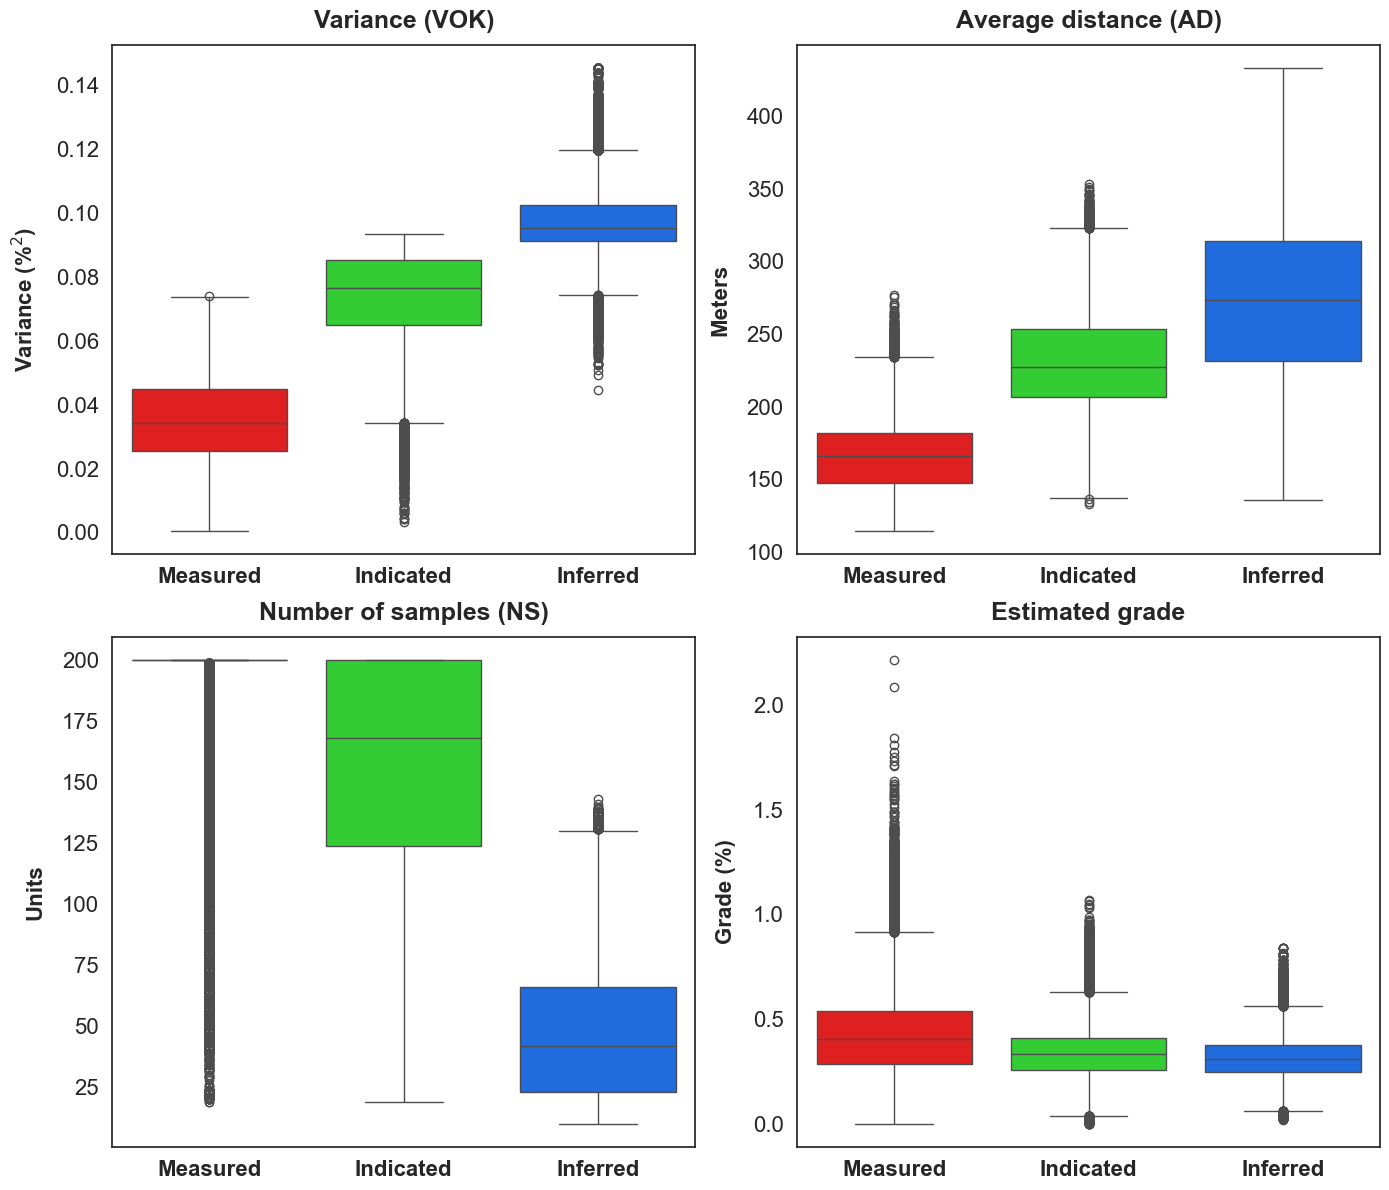

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapear las categorías numéricas a nombres
categoria_map = {0: 'Inferido', 1: 'Medido', 2: 'Indicado'}
df['Categoria'] = df['Categoria'].map(categoria_map)

# Definir el orden y las etiquetas personalizadas
orden_categorias = ['Medido', 'Indicado', 'Inferido']  # Orden deseado
etiquetas_personalizadas = ['Measured', 'Indicated', 'Inferred']  # Etiquetas en inglés

# Crear un diccionario de colores para Seaborn
colores = {'Medido': '#FF0000', 'Indicado': '#1AE61A', 'Inferido': '#0066FF'}

# Seleccionar las columnas de interés
columnas_interes = ['OK_krig_var', 'OK_average_sample_distance', 'OK_n_samples', 'OK']
nombres_etiquetas = ['Variance (VOK)', 'Average distance (AD)', 'Number of samples (NS)', 'Estimated grade']
nombres_eje_y = ['Variance (%$^2$)', 'Meters', 'Units', 'Grade (%)']

# Crear una figura de 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Generar gráficos con Seaborn
for i, columna in enumerate(columnas_interes):
    ax = axs[i // 2, i % 2]
    sns.boxplot(
        data=df, x='Categoria', y=columna, ax=ax,
        order=orden_categorias, palette=colores
    )
    
    # Configurar etiquetas y títulos
    ax.set_xticks(range(len(orden_categorias)))
    ax.set_xticklabels(etiquetas_personalizadas, fontsize=16, fontweight='bold')  # Aumentar tamaño de valores en X
    ax.set_title(nombres_etiquetas[i], fontsize=18, fontweight='bold', pad=12)
    ax.set_xlabel("", fontsize=16, labelpad=12)
    ax.set_ylabel(nombres_eje_y[i], fontsize=16, labelpad=12)

    # Aumentar tamaño de valores en el eje Y
    ax.tick_params(axis='y', labelsize=16)

# Ajustar el diseño
plt.tight_layout()
plt.savefig('RMSPROPBOXPLOT.jpg', dpi=800)
# Mostrar el gráfico
plt.show()



C:\Users\jhona\AppData\Local\Temp\ipykernel_10288\3261908156.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['confianza'] = df_seleccionado['confianza'].replace({0: 'Low', 1: 'High'})
C:\Users\jhona\AppData\Local\Temp\ipykernel_10288\3261908156.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Categoria'] = pd.Categorical(df_seleccionado['Categoria'], categories=orden_categorias, ordered=True)
C:\Users\jhona\AppData\Local\Temp\ipykernel_10288\3261908156.py:18: Future

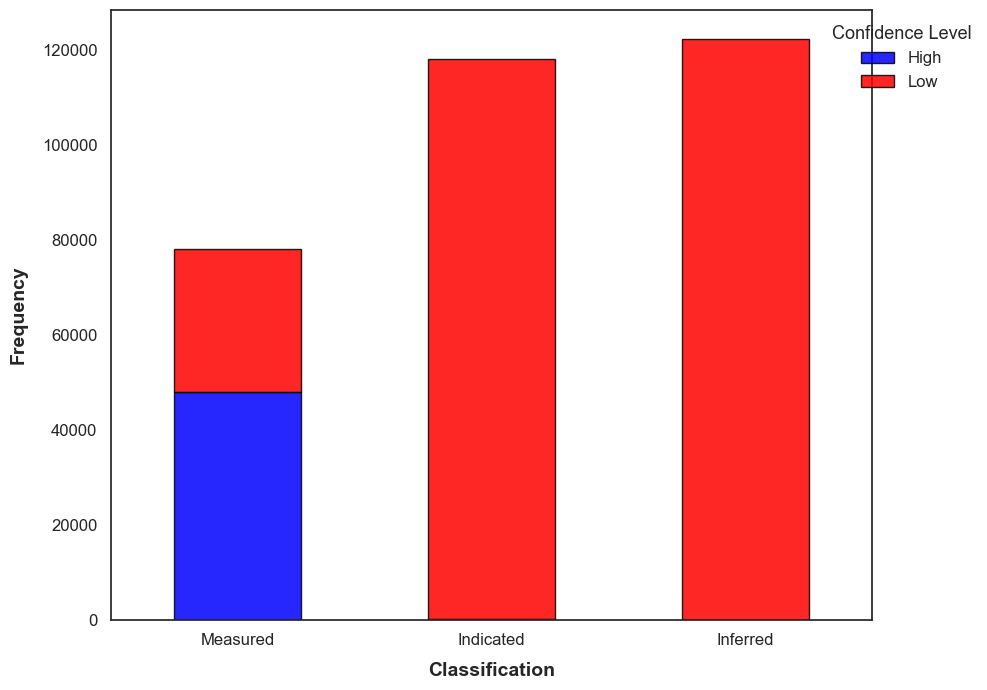

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar las columnas de interés
columnas_interes = ['confianza', 'Categoria']
df_seleccionado = df[columnas_interes]

# Cambiar las etiquetas de confianza (manteniendo consistencia en inglés)
df_seleccionado['confianza'] = df_seleccionado['confianza'].replace({0: 'Low', 1: 'High'})

# Cambiar el orden de las categorías y traducirlas en el gráfico
orden_categorias = ['Medido', 'Indicado', 'Inferido']
traduccion_categorias = {'Medido': 'Measured', 'Indicado': 'Indicated', 'Inferido': 'Inferred'}
df_seleccionado['Categoria'] = pd.Categorical(df_seleccionado['Categoria'], categories=orden_categorias, ordered=True)

# Contar las ocurrencias de cada confianza para cada categoría
conteo_calidad_por_categoria = df_seleccionado.groupby(['Categoria', 'confianza']).size().unstack()

# Configurar colores y estilo más profesional
colores = ['blue', 'red']  # Azul y Naranja para visualización profesional
ax = conteo_calidad_por_categoria.plot(
    kind='bar', stacked=True, figsize=(10, 7), color=colores, edgecolor='black', alpha=0.85
)

# Mejorar el diseño del gráfico
plt.title('', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Classification', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)

# Ajustar etiquetas del eje X al inglés
ax.set_xticklabels([traduccion_categorias[label] for label in orden_categorias], fontsize=12, rotation=0)

# Personalizar el eje Y
plt.yticks(fontsize=12)

# Colocar la leyenda fuera del gráfico con mejor visibilidad
plt.legend(
    title='Confidence Level', loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=12, title_fontsize=13, frameon=False
)

# Ajustar el diseño para mejor presentación
plt.tight_layout()

# Guardar el gráfico con alta calidad (opcional)
plt.savefig('confianzabarras_professionalANNRMSPROP.jpg', dpi=800, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


In [103]:
df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
0 0.31          -0.03                      365.71         0.11         11.00   
1 0.30          -0.03                      363.69         0.11         13.00   
2 0.27          -0.03                      364.97         0.11         15.00   
3 0.27          -0.03                      360.78         0.11         15.00   
4 0.19          -0.04                      343.19         0.12         12.00   

          X          Y       Z  calidad_code  cov  confianza confianza_geo  \
0 375530.00 8715980.00 4015.00             0 1.10          0          baja   
1 375550.00 8715980.00 4015.00             0 1.10          0          baja   
2 375570.00 8715980.00 4015.00             0 1.22          0          baja   
3 375590.00 8715980.00 4015.00             0 1.23          0          baja   
4 375610.00 8715980.00 4015.00             0 1.87          0          baja   

  Categoria Categoria_label  Categoria_suavizada Categoria_suavizada_label  
0  Inferido        Inferred                    0                  Inferred  
1  Inferido        Inferred                    0                  Inferred  
2  Inferido        Inferred                    0                  Inferred  
3  Inferido        Inferred                    0                  Inferred  
4  Inferido        Inferred                    0                  Inferred

In [104]:
df_0 = df[df['Categoria_suavizada']==1]
df_0.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  \
41787 0.28          -0.00                      197.98         0.06   
41788 0.27          -0.00                      201.44         0.05   
41789 0.20          -0.00                      207.17         0.06   
41860 0.50          -0.00                      199.17         0.06   
41861 0.44          -0.00                      198.83         0.06   

       OK_n_samples         X          Y       Z  calidad_code  cov  \
41787        200.00 375650.00 8717380.00 4135.00             0 0.87   
41788        200.00 375670.00 8717380.00 4135.00             0 0.88   
41789        200.00 375690.00 8717380.00 4135.00             0 1.21   
41860        200.00 375630.00 8717400.00 4135.00             0 0.51   
41861        200.00 375650.00 8717400.00 4135.00             0 0.58   

       confianza confianza_geo Categoria Categoria_label  Categoria_suavizada  \
41787          0          baja  Indicado       Indicated                    1   
41788          0          baja  Indicado       Indicated                    1   
41789          0          baja  Indicado       Indicated                    1   
41860          0          baja  Indicado       Indicated                    1   
41861          0          baja  Indicado       Indicated                    1   

      Categoria_suavizada_label  
41787                  Measured  
41788                  Measured  
41789                  Measured  
41860                  Measured  
41861                  Measured

In [105]:
df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
0 0.31          -0.03                      365.71         0.11         11.00   
1 0.30          -0.03                      363.69         0.11         13.00   
2 0.27          -0.03                      364.97         0.11         15.00   
3 0.27          -0.03                      360.78         0.11         15.00   
4 0.19          -0.04                      343.19         0.12         12.00   

          X          Y       Z  calidad_code  cov  confianza confianza_geo  \
0 375530.00 8715980.00 4015.00             0 1.10          0          baja   
1 375550.00 8715980.00 4015.00             0 1.10          0          baja   
2 375570.00 8715980.00 4015.00             0 1.22          0          baja   
3 375590.00 8715980.00 4015.00             0 1.23          0          baja   
4 375610.00 8715980.00 4015.00             0 1.87          0          baja   

  Categoria Categoria_label  Categoria_suavizada Categoria_suavizada_label  
0  Inferido        Inferred                    0                  Inferred  
1  Inferido        Inferred                    0                  Inferred  
2  Inferido        Inferred                    0                  Inferred  
3  Inferido        Inferred                    0                  Inferred  
4  Inferido        Inferred                    0                  Inferred

In [106]:
# Contar la cantidad de filas por cada valor único en 'Categoria_s_original'
conteo_por_categoria = df.groupby('Categoria_suavizada').size()

# Mostrar el resultado
print(conteo_por_categoria)

Categoria_suavizada
0    121942
1     72643
2    123858
dtype: int64


In [107]:
# Calcular el promedio de la variable 'ko' por cada valor único en 'Categoria_s_original'
promedio_por_categoria = df.groupby('Categoria_suavizada')['OK'].mean()

# Mostrar el resultado
print(promedio_por_categoria)

Categoria_suavizada
0   0.31
1   0.44
2   0.33
Name: OK, dtype: float64


In [108]:
df["OK"].describe().T

count   318443.00
mean         0.35
std          0.15
min          0.00
25%          0.26
50%          0.33
75%          0.42
max          2.21
Name: OK, dtype: float64

In [109]:
df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
0 0.31          -0.03                      365.71         0.11         11.00   
1 0.30          -0.03                      363.69         0.11         13.00   
2 0.27          -0.03                      364.97         0.11         15.00   
3 0.27          -0.03                      360.78         0.11         15.00   
4 0.19          -0.04                      343.19         0.12         12.00   

          X          Y       Z  calidad_code  cov  confianza confianza_geo  \
0 375530.00 8715980.00 4015.00             0 1.10          0          baja   
1 375550.00 8715980.00 4015.00             0 1.10          0          baja   
2 375570.00 8715980.00 4015.00             0 1.22          0          baja   
3 375590.00 8715980.00 4015.00             0 1.23          0          baja   
4 375610.00 8715980.00 4015.00             0 1.87          0          baja   

  Categoria Categoria_label  Categoria_suavizada Categoria_suavizada_label  
0  Inferido        Inferred                    0                  Inferred  
1  Inferido        Inferred                    0                  Inferred  
2  Inferido        Inferred                    0                  Inferred  
3  Inferido        Inferred                    0                  Inferred  
4  Inferido        Inferred                    0                  Inferred

In [110]:
df["cov"].median()

0.8326985305007265

In [111]:
df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
0 0.31          -0.03                      365.71         0.11         11.00   
1 0.30          -0.03                      363.69         0.11         13.00   
2 0.27          -0.03                      364.97         0.11         15.00   
3 0.27          -0.03                      360.78         0.11         15.00   
4 0.19          -0.04                      343.19         0.12         12.00   

          X          Y       Z  calidad_code  cov  confianza confianza_geo  \
0 375530.00 8715980.00 4015.00             0 1.10          0          baja   
1 375550.00 8715980.00 4015.00             0 1.10          0          baja   
2 375570.00 8715980.00 4015.00             0 1.22          0          baja   
3 375590.00 8715980.00 4015.00             0 1.23          0          baja   
4 375610.00 8715980.00 4015.00             0 1.87          0          baja   

  Categoria Categoria_label  Categoria_suavizada Categoria_suavizada_label  
0  Inferido        Inferred                    0                  Inferred  
1  Inferido        Inferred                    0                  Inferred  
2  Inferido        Inferred                    0                  Inferred  
3  Inferido        Inferred                    0                  Inferred  
4  Inferido        Inferred                    0                  Inferred

In [112]:
# Crear una nueva columna 'Categoria_n' basada en la columna 'Categoria'
df['Categoria_n'] = df['Categoria'].replace({'Inferido': 0, 'Medido': 1, 'Indicado': 2})

# Mostrar las primeras filas para verificar el resultado
df[['Categoria', 'Categoria_n']].head()


C:\Users\jhona\AppData\Local\Temp\ipykernel_10288\2358529819.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Categoria_n'] = df['Categoria'].replace({'Inferido': 0, 'Medido': 1, 'Indicado': 2})


Categoria  Categoria_n
0  Inferido            0
1  Inferido            0
2  Inferido            0
3  Inferido            0
4  Inferido            0

In [113]:
df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
0 0.31          -0.03                      365.71         0.11         11.00   
1 0.30          -0.03                      363.69         0.11         13.00   
2 0.27          -0.03                      364.97         0.11         15.00   
3 0.27          -0.03                      360.78         0.11         15.00   
4 0.19          -0.04                      343.19         0.12         12.00   

          X          Y       Z  calidad_code  cov  confianza confianza_geo  \
0 375530.00 8715980.00 4015.00             0 1.10          0          baja   
1 375550.00 8715980.00 4015.00             0 1.10          0          baja   
2 375570.00 8715980.00 4015.00             0 1.22          0          baja   
3 375590.00 8715980.00 4015.00             0 1.23          0          baja   
4 375610.00 8715980.00 4015.00             0 1.87          0          baja   

  Categoria Categoria_label  Categoria_suavizada Categoria_suavizada_label  \
0  Inferido        Inferred                    0                  Inferred   
1  Inferido        Inferred                    0                  Inferred   
2  Inferido        Inferred                    0                  Inferred   
3  Inferido        Inferred                    0                  Inferred   
4  Inferido        Inferred                    0                  Inferred   

   Categoria_n  
0            0  
1            0  
2            0  
3            0  
4            0

In [114]:
# Crear tres nuevos DataFrames según los valores de Categoria_s_original
df_medido = df[df['Categoria_n'] == 1].copy()
df_inferido = df[df['Categoria_n'] == 0].copy()
df_indicado = df[df['Categoria_n'] == 2].copy()

In [115]:
df_medido2 = df[df['Categoria_suavizada'] == 1].copy()
df_inferido2 = df[df['Categoria_suavizada'] == 0].copy()
df_indicado2 = df[df['Categoria_suavizada'] == 2].copy()

In [116]:
import pandas as pd

# Supongamos que ya tienes el DataFrame "df_medido"

# Crear un nuevo DataFrame con intervalos y calcular tonelaje y promedio de "ko" para cada intervalo
intervalos11 = pd.DataFrame({'Cutoff Cu (%)': [i / 10 for i in range(1, 11)],
                           'Tonelaje': 0,
                           'Cu (%)': 0.0})

# Iterar sobre los intervalos y calcular tonelaje y promedio de "ko"
for index, row in intervalos11.iterrows():
    cutoff_valor = row['Cutoff Cu (%)']
    
    # Filtrar el DataFrame original para obtener solo las filas con "ko" mayor al valor de corte
    subset_df = df_medido[df_medido['OK'] > cutoff_valor]
    
    # Calcular la frecuencia y el promedio de "ko" para el intervalo actual
    tonnage = len(subset_df)
    average_ko = subset_df['OK'].mean()

    # Actualizar el DataFrame de intervalos con los resultados
    intervalos11.loc[index, 'Tonelaje'] = tonnage
    intervalos11.loc[index, 'Cu (%)'] = average_ko

# Convertir tonelaje a las unidades deseadas
intervalos11['Tonelaje'] = (intervalos11['Tonelaje'] * 20 * 20 * 20 * 2.3) / 1000

# Muestra el nuevo DataFrame con la frecuencia y el valor promedio de cada intervalo
print(intervalos11)

   Cutoff Cu (%)   Tonelaje  Cu (%)
0           0.10 1370395.20    0.45
1           0.20 1254401.60    0.47
2           0.30 1040372.80    0.52
3           0.40  738024.00    0.59
4           0.50  446586.40    0.67
5           0.60  256698.40    0.77
6           0.70  148028.00    0.86
7           0.80   84180.00    0.95
8           0.90   46478.40    1.04
9           1.00   24232.80    1.12


In [117]:
import pandas as pd

# Supongamos que ya tienes el DataFrame "df_medido"

# Crear un nuevo DataFrame con intervalos y calcular tonelaje y promedio de "ko" para cada intervalo
intervalos00 = pd.DataFrame({'Cutoff Cu (%)': [i / 10 for i in range(1, 11)],
                           'Tonelaje': 0,
                           'Cu (%)': 0.0})

# Iterar sobre los intervalos y calcular tonelaje y promedio de "ko"
for index, row in intervalos00.iterrows():
    cutoff_valor = row['Cutoff Cu (%)']
    
    # Filtrar el DataFrame original para obtener solo las filas con "ko" mayor al valor de corte
    subset_df = df_inferido[df_inferido['OK'] > cutoff_valor]
    
    # Calcular la frecuencia y el promedio de "ko" para el intervalo actual
    tonnage = len(subset_df)
    average_ko = subset_df['OK'].mean()

    # Actualizar el DataFrame de intervalos con los resultados
    intervalos00.loc[index, 'Tonelaje'] = tonnage
    intervalos00.loc[index, 'Cu (%)'] = average_ko

# Convertir tonelaje a las unidades deseadas
intervalos00['Tonelaje'] = (intervalos00['Tonelaje'] * 20 * 20 * 20 * 2.3) / 1000

# Muestra el nuevo DataFrame con la frecuencia y el valor promedio de cada intervalo
print(intervalos00)

   Cutoff Cu (%)   Tonelaje  Cu (%)
0           0.10 2196960.00    0.32
1           0.20 1957631.20    0.34
2           0.30 1228439.20    0.38
3           0.40  392472.00    0.46
4           0.50   69239.20    0.55
5           0.60   10764.00    0.65
6           0.70    1288.00    0.76
7           0.80     312.80    0.82
8           0.90       0.00     NaN
9           1.00       0.00     NaN


In [118]:
import pandas as pd

# Supongamos que ya tienes el DataFrame "df_medido"

# Crear un nuevo DataFrame con intervalos y calcular tonelaje y promedio de "ko" para cada intervalo
intervalos22 = pd.DataFrame({'Cutoff Cu (%)': [i / 10 for i in range(1, 11)],
                           'Tonelaje': 0,
                           'Cu (%)': 0.0})

# Iterar sobre los intervalos y calcular tonelaje y promedio de "ko"
for index, row in intervalos22.iterrows():
    cutoff_valor = row['Cutoff Cu (%)']
    
    # Filtrar el DataFrame original para obtener solo las filas con "ko" mayor al valor de corte
    subset_df = df_indicado[df_indicado['OK'] > cutoff_valor]
    
    # Calcular la frecuencia y el promedio de "ko" para el intervalo actual
    tonnage = len(subset_df)
    average_ko = subset_df['OK'].mean()

    # Actualizar el DataFrame de intervalos con los resultados
    intervalos22.loc[index, 'Tonelaje'] = tonnage
    intervalos22.loc[index, 'Cu (%)'] = average_ko

# Convertir tonelaje a las unidades deseadas
intervalos22['Tonelaje'] = (intervalos22['Tonelaje'] * 20 * 20 * 20 * 2.3) / 1000

# Muestra el nuevo DataFrame con la frecuencia y el valor promedio de cada intervalo
print(intervalos22)

   Cutoff Cu (%)   Tonelaje  Cu (%)
0           0.10 2103837.60    0.34
1           0.20 1872292.00    0.37
2           0.30 1359539.20    0.41
3           0.40  587640.80    0.48
4           0.50  163704.80    0.58
5           0.60   49698.40    0.69
6           0.70   17112.00    0.78
7           0.80    4765.60    0.86
8           0.90     901.60    0.95
9           1.00     110.40    1.05


In [119]:
intervalos00.describe().T

count      mean       std  min    25%      50%        75%  \
Cutoff Cu (%)  10.00      0.55      0.30 0.10   0.33     0.55       0.78   
Tonelaje       10.00 585710.64 875366.11 0.00 556.60 40001.60 1019447.40   
Cu (%)          8.00      0.53      0.19 0.32   0.37     0.51       0.67   

                     max  
Cutoff Cu (%)       1.00  
Tonelaje      2196960.00  
Cu (%)              0.82

In [120]:
df_medido2 = df[df['Categoria_suavizada'] == 1].copy()
df_inferido2 = df[df['Categoria_suavizada'] == 0].copy()
df_indicado2 = df[df['Categoria_suavizada'] == 2].copy()

In [121]:
# Crear un nuevo DataFrame con intervalos y calcular tonelaje y promedio de "ko" para cada intervalo
intervalos0 = pd.DataFrame({'Cutoff Cu (%)': [i / 10 for i in range(1, 11)],
                           'Tonelaje': 0,
                           'Cu (%)': 0.0})

# Iterar sobre los intervalos y calcular tonelaje y promedio de "ko"
for index, row in intervalos0.iterrows():
    cutoff_valor = row['Cutoff Cu (%)']
    
    # Filtrar el DataFrame original para obtener solo las filas con "ko" mayor al valor de corte
    subset_df = df_inferido2[df_inferido2['OK'] > cutoff_valor]
    
    # Calcular la frecuencia y el promedio de "ko" para el intervalo actual
    tonnage = len(subset_df)
    average_ko = subset_df['OK'].mean()

    # Actualizar el DataFrame de intervalos con los resultados
    intervalos0.loc[index, 'Tonelaje'] = tonnage
    intervalos0.loc[index, 'Cu (%)'] = average_ko

# Convertir tonelaje a las unidades deseadas
intervalos0['Tonelaje'] = (intervalos0['Tonelaje'] * 20 * 20 * 20 * 2.3) / 1000

# Muestra el nuevo DataFrame con la frecuencia y el valor promedio de cada intervalo
print(intervalos0)

   Cutoff Cu (%)   Tonelaje  Cu (%)
0           0.10 2185386.40    0.32
1           0.20 1943463.20    0.33
2           0.30 1213388.00    0.38
3           0.40  384486.40    0.46
4           0.50   67583.20    0.55
5           0.60   10543.20    0.65
6           0.70    1306.40    0.76
7           0.80     312.80    0.82
8           0.90       0.00     NaN
9           1.00       0.00     NaN


In [122]:
# Crear un nuevo DataFrame con intervalos y calcular tonelaje y promedio de "ko" para cada intervalo
intervalos1 = pd.DataFrame({'Cutoff Cu (%)': [i / 10 for i in range(1, 11)],
                           'Tonelaje': 0,
                           'Cu (%)': 0.0})

# Iterar sobre los intervalos y calcular tonelaje y promedio de "ko"
for index, row in intervalos1.iterrows():
    cutoff_valor = row['Cutoff Cu (%)']
    
    # Filtrar el DataFrame original para obtener solo las filas con "ko" mayor al valor de corte
    subset_df = df_medido2[df_medido2['OK'] > cutoff_valor]
    
    # Calcular la frecuencia y el promedio de "ko" para el intervalo actual
    tonnage = len(subset_df)
    average_ko = subset_df['OK'].mean()

    # Actualizar el DataFrame de intervalos con los resultados
    intervalos1.loc[index, 'Tonelaje'] = tonnage
    intervalos1.loc[index, 'Cu (%)'] = average_ko

# Convertir tonelaje a las unidades deseadas
intervalos1['Tonelaje'] = (intervalos1['Tonelaje'] * 20 * 20 * 20 * 2.3) / 1000

# Muestra el nuevo DataFrame con la frecuencia y el valor promedio de cada intervalo
print(intervalos1)

   Cutoff Cu (%)   Tonelaje  Cu (%)
0           0.10 1284099.20    0.45
1           0.20 1189155.20    0.48
2           0.30 1006572.00    0.52
3           0.40  720415.20    0.58
4           0.50  433706.40    0.67
5           0.60  249577.60    0.77
6           0.70  143924.80    0.86
7           0.80   81604.00    0.95
8           0.90   44932.80    1.04
9           1.00   23423.20    1.13


In [123]:
# Crear un nuevo DataFrame con intervalos y calcular tonelaje y promedio de "ko" para cada intervalo
intervalos2 = pd.DataFrame({'Cutoff Cu (%)': [i / 10 for i in range(1, 11)],
                           'Tonelaje': 0,
                           'Cu (%)': 0.0})

# Iterar sobre los intervalos y calcular tonelaje y promedio de "ko"
for index, row in intervalos2.iterrows():
    cutoff_valor = row['Cutoff Cu (%)']
    
    # Filtrar el DataFrame original para obtener solo las filas con "ko" mayor al valor de corte
    subset_df = df_indicado2[df_indicado2['OK'] > cutoff_valor]
    
    # Calcular la frecuencia y el promedio de "ko" para el intervalo actual
    tonnage = len(subset_df)
    average_ko = subset_df['OK'].mean()

    # Actualizar el DataFrame de intervalos con los resultados
    intervalos2.loc[index, 'Tonelaje'] = tonnage
    intervalos2.loc[index, 'Cu (%)'] = average_ko

# Convertir tonelaje a las unidades deseadas
intervalos2['Tonelaje'] = (intervalos2['Tonelaje'] * 20 * 20 * 20 * 2.3)/1000

# Muestra el nuevo DataFrame con la frecuencia y el valor promedio de cada intervalo
print(intervalos2)

   Cutoff Cu (%)   Tonelaje  Cu (%)
0           0.10 2201707.20    0.34
1           0.20 1951706.40    0.37
2           0.30 1408391.20    0.41
3           0.40  613235.20    0.48
4           0.50  178240.80    0.59
5           0.60   57040.00    0.70
6           0.70   21196.80    0.79
7           0.80    7341.60    0.89
8           0.90    2447.20    0.99
9           1.00     920.00    1.08


In [124]:
intervalos0.describe().T

count      mean       std  min    25%      50%        75%  \
Cutoff Cu (%)  10.00      0.55      0.30 0.10   0.33     0.55       0.78   
Tonelaje       10.00 580646.96 869627.93 0.00 561.20 39063.20 1006162.60   
Cu (%)          8.00      0.53      0.19 0.32   0.37     0.51       0.67   

                     max  
Cutoff Cu (%)       1.00  
Tonelaje      2185386.40  
Cu (%)              0.82

In [125]:
intervalos1.describe().T

count      mean       std      min      25%       50%  \
Cutoff Cu (%)  10.00      0.55      0.30     0.10     0.33      0.55   
Tonelaje       10.00 517741.04 493846.54 23423.20 97184.20 341642.00   
Cu (%)         10.00      0.75      0.24     0.45     0.53      0.72   

                    75%        max  
Cutoff Cu (%)      0.78       1.00  
Tonelaje      935032.80 1284099.20  
Cu (%)             0.93       1.13

In [126]:
intervalos2.describe().T

count      mean       std    min      25%       50%        75%  \
Cutoff Cu (%)  10.00      0.55      0.30   0.10     0.33      0.55       0.78   
Tonelaje       10.00 644222.64 875696.61 920.00 10805.40 117640.40 1209602.20   
Cu (%)         10.00      0.67      0.27   0.34     0.43      0.64       0.87   

                     max  
Cutoff Cu (%)       1.00  
Tonelaje      2201707.20  
Cu (%)              1.08

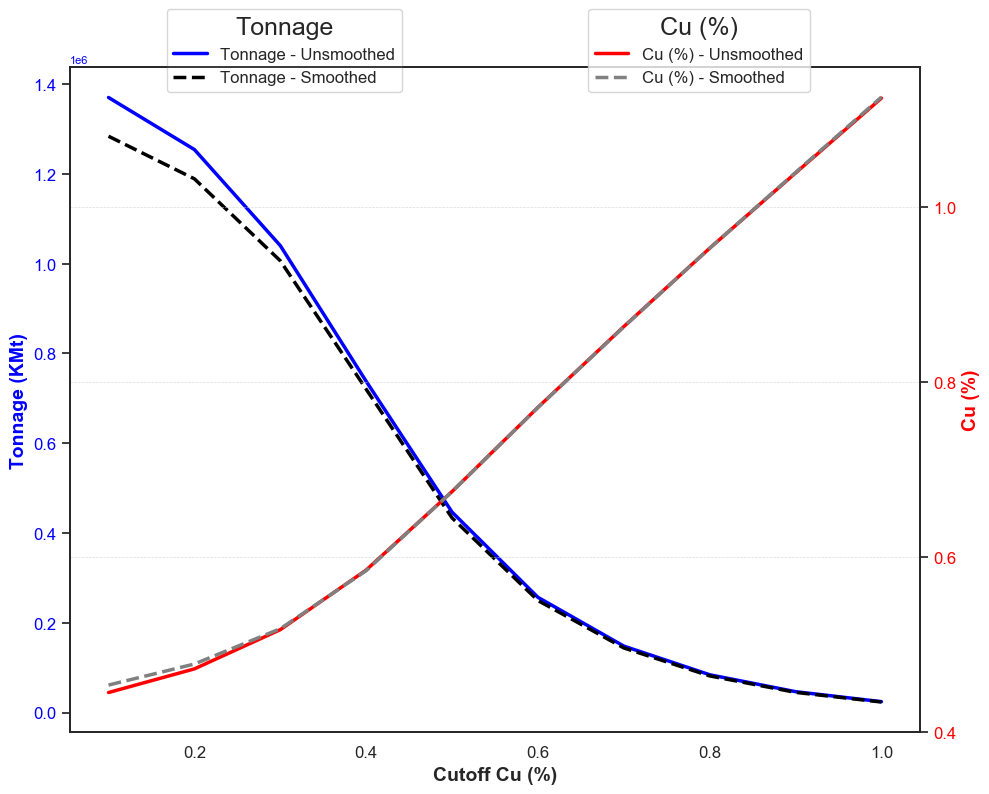

In [127]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 8))
#plt.title("Cutoff Analysis for Tonnage and Cu (%)", fontsize=16, fontweight='bold')

# Graficar la variable "Tonnage" en el eje izquierdo
color_tonnage = 'blue'  # Color profesional para el Tonnage
tonnage_label = 'Tonnage (KMt)'  # Etiqueta profesional
tonnage_line_label_raw = 'Tonnage - Unsmoothed'
tonnage_line_label_smooth = 'Tonnage - Smoothed'

ax1.set_xlabel('Cutoff Cu (%)', fontsize=14)
ax1.set_ylabel(tonnage_label, color=color_tonnage, fontsize=14)
ax1.plot(intervalos11['Cutoff Cu (%)'], intervalos11['Tonelaje'], color=color_tonnage, linestyle='-', linewidth=2.5, label=tonnage_line_label_raw)
ax1.plot(intervalos1['Cutoff Cu (%)'], intervalos1['Tonelaje'], color="black", linestyle='--', linewidth=2.5, label=tonnage_line_label_smooth)
ax1.tick_params(axis='y', labelcolor=color_tonnage, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Configurar el eje vertical izquierdo (Tonnage)
inicio_tonnage = 0.0
fin_tonnage = 1400000
intervalo_tonnage = 200000
eje_y_tonnage = [i for i in range(int(inicio_tonnage), int(fin_tonnage + intervalo_tonnage), int(intervalo_tonnage))]
ax1.set_yticks(eje_y_tonnage)

# Crear un segundo eje vertical para la variable "Cu (%)"
ax2 = ax1.twinx()
color_cu = 'red'  # Color profesional para el Cu (%)
cu_label = 'Cu (%)'
cu_line_label_raw = 'Cu (%) - Unsmoothed'
cu_line_label_smooth = 'Cu (%) - Smoothed'

ax2.set_ylabel(cu_label, color=color_cu, fontsize=14)
ax2.plot(intervalos11['Cutoff Cu (%)'], intervalos11['Cu (%)'], color=color_cu, linestyle='-', linewidth=2.5, label=cu_line_label_raw)
ax2.plot(intervalos1['Cutoff Cu (%)'], intervalos1['Cu (%)'], color="gray", linestyle='--', linewidth=2.5, label=cu_line_label_smooth)
ax2.tick_params(axis='y', labelcolor=color_cu, labelsize=12)

inicio_cu = 0.4
fin_cu = 1.0
intervalo_cu = 0.2
eje_y_cu = [round(i, 2) for i in range(int(inicio_cu * 10), int((fin_cu + intervalo_cu) * 10), int(intervalo_cu * 10))]
eje_y_cu = [y / 10 for y in eje_y_cu]
ax2.set_yticks(eje_y_cu)

# Agregar leyendas
leg_tonnage = ax1.legend(loc='upper right', bbox_to_anchor=(0.4, 1.10), fontsize=12, title="Tonnage")
leg_cu = ax2.legend(loc='upper left', bbox_to_anchor=(0.6, 1.10), fontsize=12, title="Cu (%)")

# Ajustar el diseño
plt.tight_layout()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Guardar la figura para uso en publicaciones
plt.savefig("cutoff_analysis_plotmedidoMEDIDO_ANNRMSPROP.jpg", dpi=800, bbox_inches='tight')
# Mostrar el gráfico
plt.show()

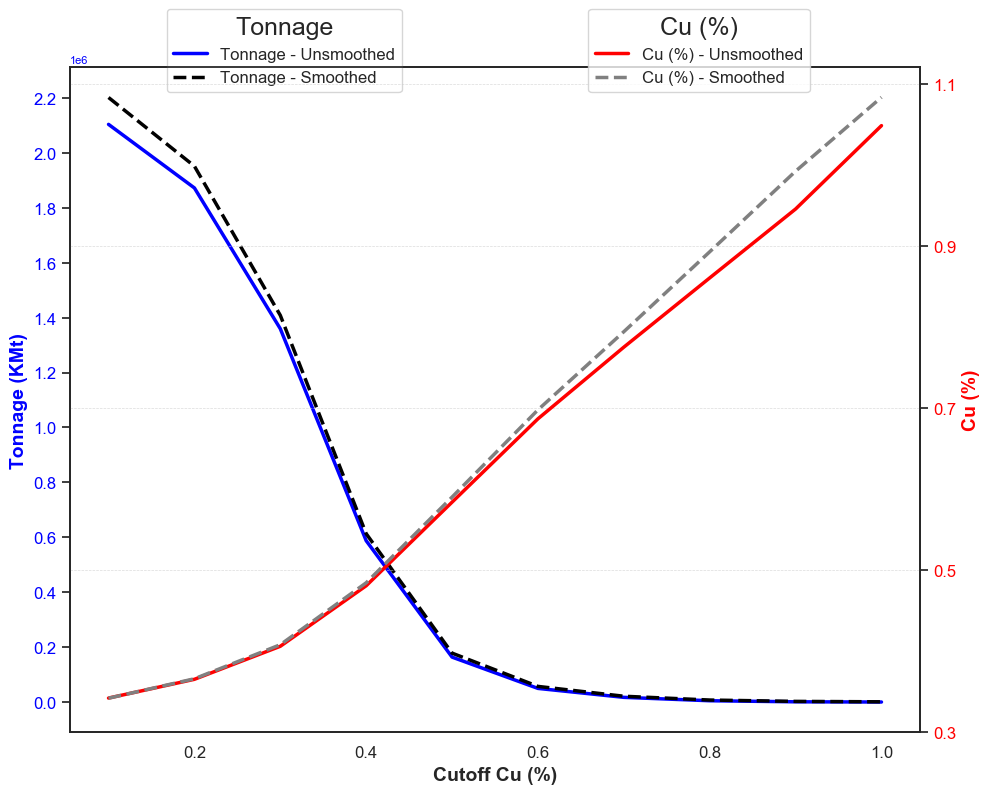

In [128]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 8))
#plt.title("Cutoff Analysis for Tonnage and Cu (%)", fontsize=16, fontweight='bold')

# Graficar la variable "Tonnage" en el eje izquierdo
color_tonnage = 'blue'  # Color profesional para el Tonnage
tonnage_label = 'Tonnage (KMt)'  # Etiqueta profesional
tonnage_line_label_raw = 'Tonnage - Unsmoothed'
tonnage_line_label_smooth = 'Tonnage - Smoothed'

ax1.set_xlabel('Cutoff Cu (%)', fontsize=14)
ax1.set_ylabel(tonnage_label, color=color_tonnage, fontsize=14)
ax1.plot(intervalos22['Cutoff Cu (%)'], intervalos22['Tonelaje'], color=color_tonnage, linestyle='-', linewidth=2.5, label=tonnage_line_label_raw)
ax1.plot(intervalos2['Cutoff Cu (%)'], intervalos2['Tonelaje'], color="black", linestyle='--', linewidth=2.5, label=tonnage_line_label_smooth)
ax1.tick_params(axis='y', labelcolor=color_tonnage, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Configurar el eje vertical izquierdo (Tonnage)
inicio_tonnage = 0.0
fin_tonnage = 2200000
intervalo_tonnage = 200000
eje_y_tonnage = [i for i in range(int(inicio_tonnage), int(fin_tonnage + intervalo_tonnage), int(intervalo_tonnage))]
ax1.set_yticks(eje_y_tonnage)

# Crear un segundo eje vertical para la variable "Cu (%)"
ax2 = ax1.twinx()
color_cu = 'red'  # Color profesional para el Cu (%)
cu_label = 'Cu (%)'
cu_line_label_raw = 'Cu (%) - Unsmoothed'
cu_line_label_smooth = 'Cu (%) - Smoothed'

ax2.set_ylabel(cu_label, color=color_cu, fontsize=14)
ax2.plot(intervalos22['Cutoff Cu (%)'], intervalos22['Cu (%)'], color=color_cu, linestyle='-', linewidth=2.5, label=cu_line_label_raw)
ax2.plot(intervalos2['Cutoff Cu (%)'], intervalos2['Cu (%)'], color="gray", linestyle='--', linewidth=2.5, label=cu_line_label_smooth)
ax2.tick_params(axis='y', labelcolor=color_cu, labelsize=12)
inicio_cu = 0.3
fin_cu = 1.0
intervalo_cu = 0.2
eje_y_cu = [round(i, 2) for i in range(int(inicio_cu * 10), int((fin_cu + intervalo_cu) * 10), int(intervalo_cu * 10))]
eje_y_cu = [y / 10 for y in eje_y_cu]
ax2.set_yticks(eje_y_cu)

# Agregar leyendas
leg_tonnage = ax1.legend(loc='upper right', bbox_to_anchor=(0.4, 1.10), fontsize=12, title="Tonnage")
leg_cu = ax2.legend(loc='upper left', bbox_to_anchor=(0.6, 1.10), fontsize=12, title="Cu (%)")

# Ajustar el diseño
plt.tight_layout()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Guardar la figura para uso en publicaciones
plt.savefig("cutoff_analysis_plotindicadoRMSPROP.jpg", dpi=800, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


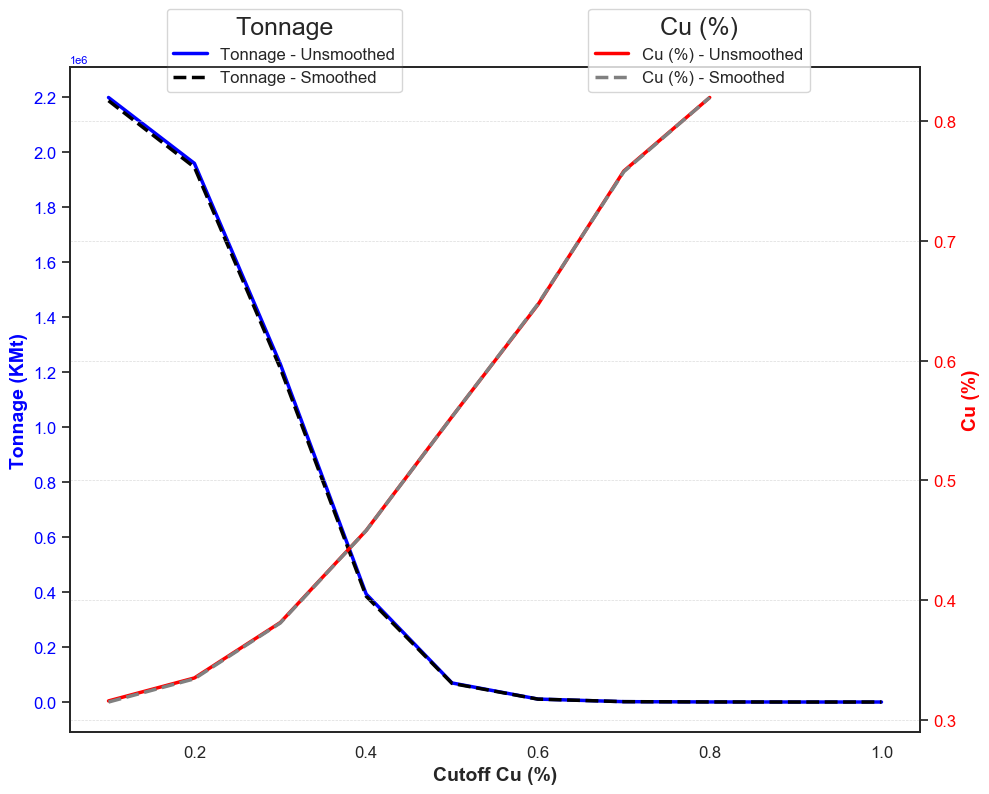

In [129]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 8))
#plt.title("Cutoff Analysis for Tonnage and Cu (%)", fontsize=16, fontweight='bold')

# Graficar la variable "Tonnage" en el eje izquierdo
color_tonnage = 'blue'  # Color profesional para el Tonnage
tonnage_label = 'Tonnage (KMt)'  # Etiqueta profesional
tonnage_line_label_raw = 'Tonnage - Unsmoothed'
tonnage_line_label_smooth = 'Tonnage - Smoothed'

ax1.set_xlabel('Cutoff Cu (%)', fontsize=14)
ax1.set_ylabel(tonnage_label, color=color_tonnage, fontsize=14)
ax1.plot(intervalos00['Cutoff Cu (%)'], intervalos00['Tonelaje'], color=color_tonnage, linestyle='-', linewidth=2.5, label=tonnage_line_label_raw)
ax1.plot(intervalos0['Cutoff Cu (%)'], intervalos0['Tonelaje'], color="black", linestyle='--', linewidth=2.5, label=tonnage_line_label_smooth)
ax1.tick_params(axis='y', labelcolor=color_tonnage, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Configurar el eje vertical izquierdo (Tonnage)
inicio_tonnage = 0.0
fin_tonnage = 2200000
intervalo_tonnage = 200000
eje_y_tonnage = [i for i in range(int(inicio_tonnage), int(fin_tonnage + intervalo_tonnage), int(intervalo_tonnage))]
ax1.set_yticks(eje_y_tonnage)

# Crear un segundo eje vertical para la variable "Cu (%)"
ax2 = ax1.twinx()
color_cu = 'red'  # Color profesional para el Cu (%)
cu_label = 'Cu (%)'
cu_line_label_raw = 'Cu (%) - Unsmoothed'
cu_line_label_smooth = 'Cu (%) - Smoothed'

ax2.set_ylabel(cu_label, color=color_cu, fontsize=14)
ax2.plot(intervalos00['Cutoff Cu (%)'], intervalos00['Cu (%)'], color=color_cu, linestyle='-', linewidth=2.5, label=cu_line_label_raw)
ax2.plot(intervalos0['Cutoff Cu (%)'], intervalos0['Cu (%)'], color="gray", linestyle='--', linewidth=2.5, label=cu_line_label_smooth)
ax2.tick_params(axis='y', labelcolor=color_cu, labelsize=12)

inicio_cu = 0.3
fin_cu = 0.8
intervalo_cu = 0.1
eje_y_cu = [round(i, 2) for i in range(int(inicio_cu * 10), int((fin_cu + intervalo_cu) * 10), int(intervalo_cu * 10))]
eje_y_cu = [y / 10 for y in eje_y_cu]
ax2.set_yticks(eje_y_cu)
# Agregar leyendas
leg_tonnage = ax1.legend(loc='upper right', bbox_to_anchor=(0.4, 1.10), fontsize=12, title="Tonnage")
leg_cu = ax2.legend(loc='upper left', bbox_to_anchor=(0.6, 1.10), fontsize=12, title="Cu (%)")

# Ajustar el diseño
plt.tight_layout()
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
# Guardar la figura para uso en publicaciones
plt.savefig("cutoff_analysis_inferred_plot00inferidoANNRMSPROP.jpg", dpi=800, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

### SGD

In [165]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Supongamos que tu dataframe se llama df
# Asegúrate de tener todas las variables necesarias en tu dataframe
# Ajusta las columnas según las que tengas en tu dataframe

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X = df[['X', 'Y', 'Z']]
y = df['Categoria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 neuronas de salida para las tres categorías

# Compilar el modelo con SGD en lugar de RMSprop
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              metrics=['accuracy'])

# Configurar detención temprana
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con detención temprana
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Predecir las categorías en el conjunto de prueba
predictions = model.predict(X_test)
predicted_categories = np.argmax(predictions, axis=1)

Epoch 1/50
7962/7962 [==============================] - 12s 1ms/step - loss: 0.3809 - accuracy: 0.8373 - val_loss: 0.3743 - val_accuracy: 0.8351
Epoch 2/50
7962/7962 [==============================] - 11s 1ms/step - loss: 0.2956 - accuracy: 0.8751 - val_loss: 0.2915 - val_accuracy: 0.8775
Epoch 3/50
7962/7962 [==============================] - 11s 1ms/step - loss: 0.2727 - accuracy: 0.8865 - val_loss: 0.2638 - val_accuracy: 0.8912
Epoch 4/50
7962/7962 [==============================] - 11s 1ms/step - loss: 0.2583 - accuracy: 0.8922 - val_loss: 0.2491 - val_accuracy: 0.8954
Epoch 5/50
7962/7962 [==============================] - 10s 1ms/step - loss: 0.2495 - accuracy: 0.8960 - val_loss: 0.2347 - val_accuracy: 0.9022
Epoch 6/50
7962/7962 [==============================] - 10s 1ms/step - loss: 0.2408 - accuracy: 0.8992 - val_loss: 0.2307 - val_accuracy: 0.9025
Epoch 7/50
7962/7962 [==============================] - 11s 1ms/step - loss: 0.2377 - accuracy: 0.9013 - val_loss: 0.2457 - val_ac

In [166]:
# Supongamos que ya tienes el modelo entrenado (anteriormente definido como 'model')

# Seleccionar las variables X, Y del DataFrame original
X_original = df[['X', 'Y', 'Z']]

# Normalizar los datos (usando el mismo scaler que antes)
X_original = scaler.transform(X_original)

# Realizar la predicción en el conjunto original
predictions_original = model.predict(X_original)
predicted_categories_original = np.argmax(predictions_original, axis=1)

# Crear una nueva columna 'Categoria_s_original' en el DataFrame original con las predicciones
df['Categoria_suavizada'] = predicted_categories_original

9952/9952 [==============================] - 25s 2ms/step


In [167]:
df.head()

OK  OK_Lagrangian  OK_average_sample_distance  OK_krig_var  OK_n_samples  \
0 0.31          -0.03                      365.71         0.11         11.00   
1 0.30          -0.03                      363.69         0.11         13.00   
2 0.27          -0.03                      364.97         0.11         15.00   
3 0.27          -0.03                      360.78         0.11         15.00   
4 0.19          -0.04                      343.19         0.12         12.00   

          X          Y       Z  calidad_code  cov  confianza confianza_geo  \
0 375530.00 8715980.00 4015.00             0 1.10          0          baja   
1 375550.00 8715980.00 4015.00             0 1.10          0          baja   
2 375570.00 8715980.00 4015.00             0 1.22          0          baja   
3 375590.00 8715980.00 4015.00             0 1.23          0          baja   
4 375610.00 8715980.00 4015.00             0 1.87          0          baja   

   Categoria Categoria_label  Categoria_suavizada  
0          0        Inferred                    0  
1          0        Inferred                    0  
2          0        Inferred                    0  
3          0        Inferred                    0  
4          0        Inferred                    0

In [168]:
df.describe().T

count       mean    std        min        25%  \
OK                         318443.00       0.35   0.15       0.00       0.26   
OK_Lagrangian              318443.00      -0.01   0.01      -0.06      -0.01   
OK_average_sample_distance 318443.00     231.91  59.19     114.27     189.35   
OK_krig_var                318443.00       0.07   0.03       0.00       0.05   
OK_n_samples               318443.00     124.36  70.99      10.00      54.00   
X                          318443.00  375635.82 416.57  374790.00  375310.00   
Y                          318443.00 8717030.96 559.01 8715980.00 8716560.00   
Z                          318443.00    4453.24 249.27    4015.00    4255.00   
calidad_code               318443.00       0.16   0.37       0.00       0.00   
cov                        318443.00       1.07   5.70       0.05       0.62   
confianza                  318443.00       0.15   0.36       0.00       0.00   
Categoria                  318443.00       0.99   0.87       0.00       0.00   
Categoria_suavizada        318443.00       0.99   0.87       0.00       0.00   

                                  50%        75%        max  
OK                               0.33       0.42       2.21  
OK_Lagrangian                   -0.00      -0.00       0.00  
OK_average_sample_distance     224.66     269.69     433.19  
OK_krig_var                      0.08       0.09       0.15  
OK_n_samples                   131.00     200.00     200.00  
X                           375650.00  375970.00  376410.00  
Y                          8717020.00 8717480.00 8718160.00  
Z                             4455.00    4655.00    4915.00  
calidad_code                     0.00       0.00       1.00  
cov                              0.83       1.10    1740.67  
confianza                        0.00       0.00       1.00  
Categoria                        1.00       2.00       2.00  
Categoria_suavizada              1.00       2.00       2.00

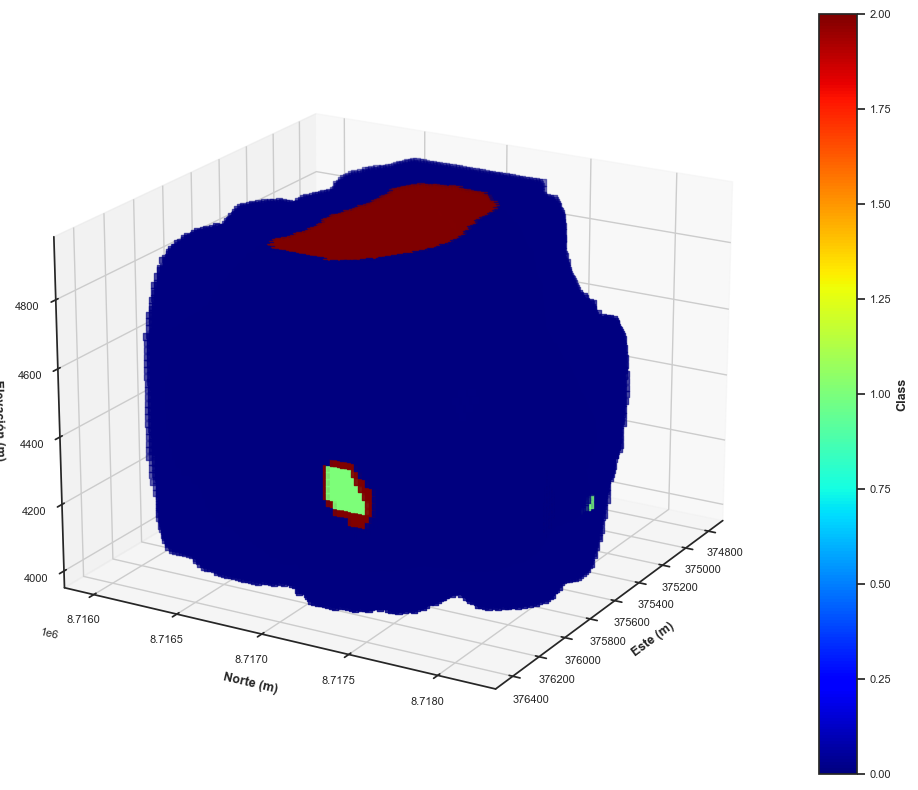

In [169]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que tu DataFrame se llama df

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
scatter = ax.scatter(df['X'], df['Y'], df['Z'], c=df['Categoria_suavizada'], cmap='jet', s=20, marker="s", vmin=0, vmax=2)

# Configuración del gráfico
ax.set_xlabel('Este (m)')
ax.set_ylabel('Norte (m)')
ax.set_zlabel('Elevación (m)')
#ax.set_title('Visualización 3D de Categoria_s_original')

# Agregar barra de color
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Class')
ax.view_init(elev=20, azim=30)
plt.tight_layout()
#plt.savefig("Image/bloques_3d_categoriaS_AMM.jpg", dpi=600)

plt.show()

In [170]:
bd=pd.read_csv('sondajesA.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un diccionario para mapear los números a las etiquetas de texto
categoria_labels = {0: "Inferred", 1: "Measured", 2: "Indicated"}

# Mapear las categorías originales y suavizadas
df['Categoria_label'] = df['Categoria'].map(categoria_labels)
df['Categoria_suavizada_label'] = df['Categoria_suavizada'].map(categoria_labels)

# Configuración de la figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid

# Tamaño de los puntos para clasificación y sondajes
marker_size_clasificacion = 50
marker_size_sondajes = 5  # Puntos de sondajes más pequeños

# Paleta de colores personalizada
palette1 = ["blue", "#66FF99", "red"]

# Cortes de Y que quieres mostrar
cortes_y = [8716680, 8717760]

# Títulos para cada gráfico
titulos = [
    f"View in Y = {cortes_y[0]} (Unsmoothed classification)",
    f"View in Y = {cortes_y[0]} (Smoothed classification)",
    f"View in Y = {cortes_y[1]} (Unsmoothed classification)",
    f"View in Y = {cortes_y[1]} (Smoothed classification)"
]

# Tamaños personalizados
label_fontsize = 14  # Tamaño de etiquetas de ejes
title_fontsize = 16  # Tamaño de títulos
legend_fontsize = 12  # Tamaño de la leyenda

# Generar gráficos
for i, (ax, titulo) in enumerate(zip(axs.flat, titulos)):
    corte_y = cortes_y[i // 2]  # Elegir el corte para la fila correspondiente
    suavizado = i % 2 == 1  # True si es el gráfico suavizado, False si no
    
    # Filtrar datos del corte actual
    df_corte_y = df[df['Y'] == corte_y]

   # Seleccionar la categoría para graficar
    categoria_col = 'Categoria_suavizada_label' if suavizado else 'Categoria_label'
    
    # Verificar si hay datos para el corte
    if df_corte_y.empty:
        ax.set_title(f'Sin datos para Y = {corte_y}', fontsize=title_fontsize)
        continue

    # Graficar la clasificación (suavizada o no)
    sns.scatterplot(
        x=df_corte_y["X"], 
        y=df_corte_y["Z"], 
        hue=df_corte_y[categoria_col], 
        palette=palette1, 
        s=marker_size_clasificacion, 
        marker="s", 
        edgecolor="black", 
        ax=ax
    )

    # Filtrar los sondajes para el mismo corte en Y
    bd_corte_y = bd[bd['Y'] == corte_y]  # `bd` es el DataFrame de sondajes
    
    # Añadir los sondajes como puntos negros
    if not bd_corte_y.empty:
        ax.scatter(
            bd_corte_y["X"], 
            bd_corte_y["Z"], 
            color="black", 
            s=marker_size_sondajes, 
            label="Sondajes", 
            alpha=1.0  # Sin transparencia para máxima visibilidad
        )
    
    # Ajustar la leyenda
    handles, labels = ax.get_legend_handles_labels()
    if "Sondajes" not in labels:
        handles.append(plt.Line2D([0], [0], color="black", markersize=5, marker="o", linestyle="None", label="Drillholes"))
        labels.append("Sondajes")
    ax.legend(handles=handles, loc='upper right', title="Classification", fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    # Configurar título y etiquetas
    ax.set_title(titulo, fontsize=title_fontsize)
    ax.set_xlabel("East (m)", fontsize=label_fontsize)
    ax.set_ylabel("Elevation (m)", fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=label_fontsize - 2)
    ax.tick_params(axis='y', labelsize=label_fontsize - 2)

# Ajustar el diseño para evitar solapamientos
    